# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 53419 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    1 of 53419) |          | Elapsed Time: 0:00:28 ETA:  17 days, 14:03:16

  0% (   75 of 53419) |                    | Elapsed Time: 0:00:29 ETA:  0:11:35

  0% (  137 of 53419) |                    | Elapsed Time: 0:00:30 ETA:  0:12:37

  0% (  203 of 53419) |                    | Elapsed Time: 0:00:31 ETA:  0:12:46

  0% (  270 of 53419) |                    | Elapsed Time: 0:00:32 ETA:  0:12:45

  0% (  339 of 53419) |                    | Elapsed Time: 0:00:33 ETA:  0:12:40

  0% (  406 of 53419) |                    | Elapsed Time: 0:00:34 ETA:  0:12:40

  0% (  473 of 53419) |                    | Elapsed Time: 0:00:35 ETA:  0:12:41

  1% (  547 of 53419) |                    | Elapsed Time: 0:00:36 ETA:  0:12:30

  1% (  620 of 53419) |                    | Elapsed Time: 0:00:37 ETA:  0:12:24

  1% (  668 of 53419) |                    | Elapsed Time: 0:00:38 ETA:  0:12:34

  1% (  736 of 53419) |                    | Elapsed Time: 0:00:39 ETA:  0:12:25

  1% (  798 of 53419) |                    | Elapsed Time: 0:00:40 ETA:  0:12:29

  1% (  872 of 53419) |                    | Elapsed Time: 0:00:41 ETA:  0:12:19

  1% (  944 of 53419) |                    | Elapsed Time: 0:00:42 ETA:  0:12:15

  1% ( 1016 of 53419) |                    | Elapsed Time: 0:00:43 ETA:  0:12:08

  2% ( 1091 of 53419) |                    | Elapsed Time: 0:00:44 ETA:  0:11:57

  2% ( 1162 of 53419) |                    | Elapsed Time: 0:00:45 ETA:  0:12:00

  2% ( 1233 of 53419) |                    | Elapsed Time: 0:00:46 ETA:  0:12:01

  2% ( 1306 of 53419) |                    | Elapsed Time: 0:00:47 ETA:  0:11:52

  2% ( 1336 of 53419) |                    | Elapsed Time: 0:00:47 ETA:  0:11:44

  2% ( 1409 of 53419) |                    | Elapsed Time: 0:00:48 ETA:  0:11:29

  2% ( 1482 of 53419) |                    | Elapsed Time: 0:00:49 ETA:  0:11:29

  2% ( 1558 of 53419) |                    | Elapsed Time: 0:00:50 ETA:  0:11:24

  3% ( 1634 of 53419) |                    | Elapsed Time: 0:00:51 ETA:  0:11:19

  3% ( 1703 of 53419) |                    | Elapsed Time: 0:00:52 ETA:  0:11:24

  3% ( 1763 of 53419) |                    | Elapsed Time: 0:00:53 ETA:  0:11:35

  3% ( 1822 of 53419) |                    | Elapsed Time: 0:00:54 ETA:  0:11:50

  3% ( 1883 of 53419) |                    | Elapsed Time: 0:00:55 ETA:  0:12:05

  3% ( 1944 of 53419) |                    | Elapsed Time: 0:00:56 ETA:  0:12:20

  3% ( 2004 of 53419) |                    | Elapsed Time: 0:00:57 ETA:  0:12:49

  3% ( 2063 of 53419) |                    | Elapsed Time: 0:00:58 ETA:  0:13:15

  3% ( 2124 of 53419) |                    | Elapsed Time: 0:00:59 ETA:  0:13:41

  4% ( 2177 of 53419) |                    | Elapsed Time: 0:01:00 ETA:  0:14:11

  4% ( 2236 of 53419) |                    | Elapsed Time: 0:01:01 ETA:  0:14:13

  4% ( 2295 of 53419) |                    | Elapsed Time: 0:01:02 ETA:  0:14:13

  4% ( 2349 of 53419) |                    | Elapsed Time: 0:01:03 ETA:  0:14:26

  4% ( 2408 of 53419) |                    | Elapsed Time: 0:01:04 ETA:  0:14:28

  4% ( 2471 of 53419) |                    | Elapsed Time: 0:01:05 ETA:  0:14:19

  4% ( 2538 of 53419) |                    | Elapsed Time: 0:01:06 ETA:  0:14:02

  4% ( 2563 of 53419) |                    | Elapsed Time: 0:01:08 ETA:  0:15:31

  4% ( 2630 of 53419) |                    | Elapsed Time: 0:01:09 ETA:  0:15:16

  5% ( 2671 of 53419) |#                   | Elapsed Time: 0:01:09 ETA:  0:14:54

  5% ( 2734 of 53419) |#                   | Elapsed Time: 0:01:10 ETA:  0:14:45

  5% ( 2800 of 53419) |#                   | Elapsed Time: 0:01:11 ETA:  0:14:30

  5% ( 2869 of 53419) |#                   | Elapsed Time: 0:01:12 ETA:  0:14:02

  5% ( 2935 of 53419) |#                   | Elapsed Time: 0:01:13 ETA:  0:13:47

  5% ( 3007 of 53419) |#                   | Elapsed Time: 0:01:14 ETA:  0:13:32

  5% ( 3079 of 53419) |#                   | Elapsed Time: 0:01:15 ETA:  0:13:23

  5% ( 3151 of 53419) |#                   | Elapsed Time: 0:01:16 ETA:  0:11:49

  6% ( 3222 of 53419) |#                   | Elapsed Time: 0:01:17 ETA:  0:11:43

  6% ( 3291 of 53419) |#                   | Elapsed Time: 0:01:18 ETA:  0:11:42

  6% ( 3339 of 53419) |#                   | Elapsed Time: 0:01:19 ETA:  0:11:32

  6% ( 3411 of 53419) |#                   | Elapsed Time: 0:01:20 ETA:  0:11:24

  6% ( 3481 of 53419) |#                   | Elapsed Time: 0:01:21 ETA:  0:11:22

  6% ( 3553 of 53419) |#                   | Elapsed Time: 0:01:22 ETA:  0:11:13

  6% ( 3625 of 53419) |#                   | Elapsed Time: 0:01:23 ETA:  0:11:12

  6% ( 3696 of 53419) |#                   | Elapsed Time: 0:01:24 ETA:  0:11:13

  7% ( 3768 of 53419) |#                   | Elapsed Time: 0:01:25 ETA:  0:11:12

  7% ( 3831 of 53419) |#                   | Elapsed Time: 0:01:26 ETA:  0:11:22

  7% ( 3894 of 53419) |#                   | Elapsed Time: 0:01:27 ETA:  0:11:29

  7% ( 3956 of 53419) |#                   | Elapsed Time: 0:01:28 ETA:  0:11:37

  7% ( 4007 of 53419) |#                   | Elapsed Time: 0:01:29 ETA:  0:11:41

  7% ( 4074 of 53419) |#                   | Elapsed Time: 0:01:30 ETA:  0:11:44

  7% ( 4143 of 53419) |#                   | Elapsed Time: 0:01:31 ETA:  0:11:47

  7% ( 4218 of 53419) |#                   | Elapsed Time: 0:01:32 ETA:  0:11:41

  8% ( 4288 of 53419) |#                   | Elapsed Time: 0:01:33 ETA:  0:11:42

  8% ( 4355 of 53419) |#                   | Elapsed Time: 0:01:34 ETA:  0:11:47

  8% ( 4421 of 53419) |#                   | Elapsed Time: 0:01:35 ETA:  0:11:41

  8% ( 4487 of 53419) |#                   | Elapsed Time: 0:01:36 ETA:  0:11:36

  8% ( 4554 of 53419) |#                   | Elapsed Time: 0:01:37 ETA:  0:11:28

  8% ( 4615 of 53419) |#                   | Elapsed Time: 0:01:38 ETA:  0:11:36

  8% ( 4675 of 53419) |#                   | Elapsed Time: 0:01:39 ETA:  0:11:54

  8% ( 4745 of 53419) |#                   | Elapsed Time: 0:01:40 ETA:  0:12:00

  9% ( 4820 of 53419) |#                   | Elapsed Time: 0:01:41 ETA:  0:11:51

  9% ( 4897 of 53419) |#                   | Elapsed Time: 0:01:42 ETA:  0:11:36

  9% ( 4966 of 53419) |#                   | Elapsed Time: 0:01:43 ETA:  0:11:31

  9% ( 5035 of 53419) |#                   | Elapsed Time: 0:01:44 ETA:  0:11:25

  9% ( 5101 of 53419) |#                   | Elapsed Time: 0:01:45 ETA:  0:11:26

  9% ( 5170 of 53419) |#                   | Elapsed Time: 0:01:46 ETA:  0:11:14

  9% ( 5231 of 53419) |#                   | Elapsed Time: 0:01:47 ETA:  0:11:06

  9% ( 5293 of 53419) |#                   | Elapsed Time: 0:01:48 ETA:  0:11:14

 10% ( 5342 of 53419) |##                  | Elapsed Time: 0:01:49 ETA:  0:11:22

 10% ( 5408 of 53419) |##                  | Elapsed Time: 0:01:50 ETA:  0:11:33

 10% ( 5476 of 53419) |##                  | Elapsed Time: 0:01:51 ETA:  0:11:44

 10% ( 5544 of 53419) |##                  | Elapsed Time: 0:01:52 ETA:  0:11:43

 10% ( 5612 of 53419) |##                  | Elapsed Time: 0:01:53 ETA:  0:11:43

 10% ( 5679 of 53419) |##                  | Elapsed Time: 0:01:54 ETA:  0:11:41

 10% ( 5748 of 53419) |##                  | Elapsed Time: 0:01:55 ETA:  0:11:41

 10% ( 5814 of 53419) |##                  | Elapsed Time: 0:01:56 ETA:  0:11:33

 11% ( 5883 of 53419) |##                  | Elapsed Time: 0:01:57 ETA:  0:11:23

 11% ( 5953 of 53419) |##                  | Elapsed Time: 0:01:58 ETA:  0:11:13

 11% ( 6010 of 53419) |##                  | Elapsed Time: 0:01:59 ETA:  0:11:09

 11% ( 6075 of 53419) |##                  | Elapsed Time: 0:02:01 ETA:  0:12:49

 11% ( 6140 of 53419) |##                  | Elapsed Time: 0:02:02 ETA:  0:12:53

 11% ( 6204 of 53419) |##                  | Elapsed Time: 0:02:03 ETA:  0:12:58

 11% ( 6272 of 53419) |##                  | Elapsed Time: 0:02:04 ETA:  0:12:55

 11% ( 6340 of 53419) |##                  | Elapsed Time: 0:02:05 ETA:  0:12:54

 11% ( 6408 of 53419) |##                  | Elapsed Time: 0:02:06 ETA:  0:12:51

 12% ( 6478 of 53419) |##                  | Elapsed Time: 0:02:07 ETA:  0:12:49

 12% ( 6545 of 53419) |##                  | Elapsed Time: 0:02:08 ETA:  0:12:52

 12% ( 6619 of 53419) |##                  | Elapsed Time: 0:02:09 ETA:  0:12:41

 12% ( 6678 of 53419) |##                  | Elapsed Time: 0:02:10 ETA:  0:10:56

 12% ( 6743 of 53419) |##                  | Elapsed Time: 0:02:11 ETA:  0:10:56

 12% ( 6814 of 53419) |##                  | Elapsed Time: 0:02:12 ETA:  0:10:46

 12% ( 6883 of 53419) |##                  | Elapsed Time: 0:02:13 ETA:  0:10:44

 13% ( 6953 of 53419) |##                  | Elapsed Time: 0:02:14 ETA:  0:10:40

 13% ( 7026 of 53419) |##                  | Elapsed Time: 0:02:15 ETA:  0:10:32

 13% ( 7095 of 53419) |##                  | Elapsed Time: 0:02:16 ETA:  0:10:33

 13% ( 7161 of 53419) |##                  | Elapsed Time: 0:02:17 ETA:  0:10:33

 13% ( 7228 of 53419) |##                  | Elapsed Time: 0:02:18 ETA:  0:10:41

 13% ( 7294 of 53419) |##                  | Elapsed Time: 0:02:19 ETA:  0:10:46

 13% ( 7346 of 53419) |##                  | Elapsed Time: 0:02:20 ETA:  0:10:39

 13% ( 7420 of 53419) |##                  | Elapsed Time: 0:02:21 ETA:  0:10:35

 14% ( 7496 of 53419) |##                  | Elapsed Time: 0:02:22 ETA:  0:10:25

 14% ( 7572 of 53419) |##                  | Elapsed Time: 0:02:23 ETA:  0:10:17

 14% ( 7648 of 53419) |##                  | Elapsed Time: 0:02:24 ETA:  0:10:13

 14% ( 7721 of 53419) |##                  | Elapsed Time: 0:02:25 ETA:  0:10:06

 14% ( 7791 of 53419) |##                  | Elapsed Time: 0:02:26 ETA:  0:09:59

 14% ( 7864 of 53419) |##                  | Elapsed Time: 0:02:27 ETA:  0:09:52

 14% ( 7937 of 53419) |##                  | Elapsed Time: 0:02:28 ETA:  0:09:43

 15% ( 8013 of 53419) |###                 | Elapsed Time: 0:02:29 ETA:  0:09:43

 15% ( 8083 of 53419) |###                 | Elapsed Time: 0:02:30 ETA:  0:09:49

 15% ( 8153 of 53419) |###                 | Elapsed Time: 0:02:31 ETA:  0:09:56

 15% ( 8227 of 53419) |###                 | Elapsed Time: 0:02:32 ETA:  0:09:58

 15% ( 8300 of 53419) |###                 | Elapsed Time: 0:02:33 ETA:  0:09:58

 15% ( 8367 of 53419) |###                 | Elapsed Time: 0:02:34 ETA:  0:10:01

 15% ( 8429 of 53419) |###                 | Elapsed Time: 0:02:35 ETA:  0:10:15

 15% ( 8501 of 53419) |###                 | Elapsed Time: 0:02:36 ETA:  0:10:15

 16% ( 8573 of 53419) |###                 | Elapsed Time: 0:02:37 ETA:  0:10:11

 16% ( 8644 of 53419) |###                 | Elapsed Time: 0:02:38 ETA:  0:10:09

 16% ( 8681 of 53419) |###                 | Elapsed Time: 0:02:38 ETA:  0:10:09

 16% ( 8750 of 53419) |###                 | Elapsed Time: 0:02:39 ETA:  0:10:09

 16% ( 8821 of 53419) |###                 | Elapsed Time: 0:02:40 ETA:  0:10:12

 16% ( 8892 of 53419) |###                 | Elapsed Time: 0:02:41 ETA:  0:10:13

 16% ( 8961 of 53419) |###                 | Elapsed Time: 0:02:42 ETA:  0:10:10

 16% ( 9030 of 53419) |###                 | Elapsed Time: 0:02:43 ETA:  0:10:01

 17% ( 9102 of 53419) |###                 | Elapsed Time: 0:02:44 ETA:  0:10:00

 17% ( 9176 of 53419) |###                 | Elapsed Time: 0:02:45 ETA:  0:09:56

 17% ( 9248 of 53419) |###                 | Elapsed Time: 0:02:46 ETA:  0:09:54

 17% ( 9320 of 53419) |###                 | Elapsed Time: 0:02:47 ETA:  0:09:51

 17% ( 9349 of 53419) |###                 | Elapsed Time: 0:02:48 ETA:  0:09:47

 17% ( 9419 of 53419) |###                 | Elapsed Time: 0:02:49 ETA:  0:09:47

 17% ( 9491 of 53419) |###                 | Elapsed Time: 0:02:50 ETA:  0:09:45

 17% ( 9564 of 53419) |###                 | Elapsed Time: 0:02:51 ETA:  0:09:39

 18% ( 9636 of 53419) |###                 | Elapsed Time: 0:02:52 ETA:  0:09:34

 18% ( 9711 of 53419) |###                 | Elapsed Time: 0:02:53 ETA:  0:09:29

 18% ( 9774 of 53419) |###                 | Elapsed Time: 0:02:54 ETA:  0:09:43

 18% ( 9838 of 53419) |###                 | Elapsed Time: 0:02:55 ETA:  0:09:52

 18% ( 9907 of 53419) |###                 | Elapsed Time: 0:02:56 ETA:  0:09:55

 18% ( 9981 of 53419) |###                 | Elapsed Time: 0:02:57 ETA:  0:09:50

 18% (10017 of 53419) |###                 | Elapsed Time: 0:02:57 ETA:  0:09:47

 18% (10090 of 53419) |###                 | Elapsed Time: 0:02:58 ETA:  0:09:45

 19% (10161 of 53419) |###                 | Elapsed Time: 0:02:59 ETA:  0:09:47

 19% (10235 of 53419) |###                 | Elapsed Time: 0:03:00 ETA:  0:09:43

 19% (10304 of 53419) |###                 | Elapsed Time: 0:03:01 ETA:  0:09:50

 19% (10374 of 53419) |###                 | Elapsed Time: 0:03:02 ETA:  0:09:40

 19% (10442 of 53419) |###                 | Elapsed Time: 0:03:03 ETA:  0:09:34

 19% (10457 of 53419) |###                 | Elapsed Time: 0:03:05 ETA:  0:11:54

 19% (10523 of 53419) |###                 | Elapsed Time: 0:03:06 ETA:  0:12:06

 19% (10592 of 53419) |###                 | Elapsed Time: 0:03:07 ETA:  0:12:00

 19% (10659 of 53419) |###                 | Elapsed Time: 0:03:08 ETA:  0:12:08

 20% (10684 of 53419) |####                | Elapsed Time: 0:03:08 ETA:  0:12:25

 20% (10750 of 53419) |####                | Elapsed Time: 0:03:09 ETA:  0:12:39

 20% (10819 of 53419) |####                | Elapsed Time: 0:03:10 ETA:  0:12:37

 20% (10890 of 53419) |####                | Elapsed Time: 0:03:12 ETA:  0:12:34

 20% (10960 of 53419) |####                | Elapsed Time: 0:03:13 ETA:  0:12:30

 20% (11027 of 53419) |####                | Elapsed Time: 0:03:14 ETA:  0:09:58

 20% (11088 of 53419) |####                | Elapsed Time: 0:03:15 ETA:  0:10:04

 20% (11155 of 53419) |####                | Elapsed Time: 0:03:16 ETA:  0:10:07

 21% (11220 of 53419) |####                | Elapsed Time: 0:03:17 ETA:  0:10:09

 21% (11294 of 53419) |####                | Elapsed Time: 0:03:18 ETA:  0:09:57

 21% (11352 of 53419) |####                | Elapsed Time: 0:03:18 ETA:  0:09:50

 21% (11419 of 53419) |####                | Elapsed Time: 0:03:19 ETA:  0:09:53

 21% (11480 of 53419) |####                | Elapsed Time: 0:03:20 ETA:  0:10:04

 21% (11548 of 53419) |####                | Elapsed Time: 0:03:21 ETA:  0:10:06

 21% (11613 of 53419) |####                | Elapsed Time: 0:03:22 ETA:  0:10:08

 21% (11678 of 53419) |####                | Elapsed Time: 0:03:23 ETA:  0:10:01

 21% (11748 of 53419) |####                | Elapsed Time: 0:03:24 ETA:  0:09:56

 22% (11818 of 53419) |####                | Elapsed Time: 0:03:25 ETA:  0:09:48

 22% (11885 of 53419) |####                | Elapsed Time: 0:03:26 ETA:  0:09:57

 22% (11949 of 53419) |####                | Elapsed Time: 0:03:27 ETA:  0:10:04

 22% (12020 of 53419) |####                | Elapsed Time: 0:03:29 ETA:  0:09:53

 22% (12086 of 53419) |####                | Elapsed Time: 0:03:30 ETA:  0:09:55

 22% (12153 of 53419) |####                | Elapsed Time: 0:03:31 ETA:  0:09:52

 22% (12218 of 53419) |####                | Elapsed Time: 0:03:32 ETA:  0:09:50

 22% (12276 of 53419) |####                | Elapsed Time: 0:03:33 ETA:  0:10:07

 23% (12337 of 53419) |####                | Elapsed Time: 0:03:34 ETA:  0:10:19

 23% (12394 of 53419) |####                | Elapsed Time: 0:03:35 ETA:  0:10:34

 23% (12456 of 53419) |####                | Elapsed Time: 0:03:36 ETA:  0:10:38

 23% (12524 of 53419) |####                | Elapsed Time: 0:03:37 ETA:  0:10:36

 23% (12593 of 53419) |####                | Elapsed Time: 0:03:38 ETA:  0:10:26

 23% (12657 of 53419) |####                | Elapsed Time: 0:03:39 ETA:  0:10:28

 23% (12688 of 53419) |####                | Elapsed Time: 0:03:39 ETA:  0:10:29

 23% (12762 of 53419) |####                | Elapsed Time: 0:03:40 ETA:  0:10:14

 24% (12829 of 53419) |####                | Elapsed Time: 0:03:41 ETA:  0:10:00

 24% (12892 of 53419) |####                | Elapsed Time: 0:03:42 ETA:  0:09:56

 24% (12956 of 53419) |####                | Elapsed Time: 0:03:43 ETA:  0:09:45

 24% (13023 of 53419) |####                | Elapsed Time: 0:03:44 ETA:  0:09:36

 24% (13085 of 53419) |####                | Elapsed Time: 0:03:45 ETA:  0:09:44

 24% (13145 of 53419) |####                | Elapsed Time: 0:03:46 ETA:  0:09:57

 24% (13217 of 53419) |####                | Elapsed Time: 0:03:47 ETA:  0:09:44

 24% (13287 of 53419) |####                | Elapsed Time: 0:03:48 ETA:  0:09:41

 25% (13355 of 53419) |#####               | Elapsed Time: 0:03:49 ETA:  0:09:46

 25% (13425 of 53419) |#####               | Elapsed Time: 0:03:50 ETA:  0:09:41

 25% (13497 of 53419) |#####               | Elapsed Time: 0:03:51 ETA:  0:09:28

 25% (13571 of 53419) |#####               | Elapsed Time: 0:03:52 ETA:  0:09:14

 25% (13645 of 53419) |#####               | Elapsed Time: 0:03:53 ETA:  0:09:04

 25% (13715 of 53419) |#####               | Elapsed Time: 0:03:54 ETA:  0:08:53

 25% (13780 of 53419) |#####               | Elapsed Time: 0:03:55 ETA:  0:08:45

 25% (13848 of 53419) |#####               | Elapsed Time: 0:03:56 ETA:  0:08:49

 26% (13914 of 53419) |#####               | Elapsed Time: 0:03:57 ETA:  0:08:52

 26% (13980 of 53419) |#####               | Elapsed Time: 0:03:58 ETA:  0:08:54

 26% (14023 of 53419) |#####               | Elapsed Time: 0:03:59 ETA:  0:08:52

 26% (14101 of 53419) |#####               | Elapsed Time: 0:04:00 ETA:  0:08:43

 26% (14176 of 53419) |#####               | Elapsed Time: 0:04:01 ETA:  0:08:42

 26% (14245 of 53419) |#####               | Elapsed Time: 0:04:02 ETA:  0:08:47

 26% (14313 of 53419) |#####               | Elapsed Time: 0:04:03 ETA:  0:08:49

 26% (14383 of 53419) |#####               | Elapsed Time: 0:04:04 ETA:  0:08:42

 27% (14456 of 53419) |#####               | Elapsed Time: 0:04:05 ETA:  0:08:34

 27% (14529 of 53419) |#####               | Elapsed Time: 0:04:06 ETA:  0:08:25

 27% (14596 of 53419) |#####               | Elapsed Time: 0:04:07 ETA:  0:08:22

 27% (14664 of 53419) |#####               | Elapsed Time: 0:04:08 ETA:  0:08:25

 27% (14691 of 53419) |#####               | Elapsed Time: 0:04:08 ETA:  0:08:37

 27% (14753 of 53419) |#####               | Elapsed Time: 0:04:09 ETA:  0:08:53

 27% (14825 of 53419) |#####               | Elapsed Time: 0:04:10 ETA:  0:08:48

 27% (14898 of 53419) |#####               | Elapsed Time: 0:04:11 ETA:  0:08:40

 28% (14967 of 53419) |#####               | Elapsed Time: 0:04:12 ETA:  0:08:40

 28% (15047 of 53419) |#####               | Elapsed Time: 0:04:13 ETA:  0:08:30

 28% (15126 of 53419) |#####               | Elapsed Time: 0:04:14 ETA:  0:08:22

 28% (15206 of 53419) |#####               | Elapsed Time: 0:04:15 ETA:  0:08:05

 28% (15286 of 53419) |#####               | Elapsed Time: 0:04:16 ETA:  0:07:51

 28% (15358 of 53419) |#####               | Elapsed Time: 0:04:17 ETA:  0:07:47

 28% (15432 of 53419) |#####               | Elapsed Time: 0:04:18 ETA:  0:07:33

 29% (15512 of 53419) |#####               | Elapsed Time: 0:04:19 ETA:  0:07:24

 29% (15592 of 53419) |#####               | Elapsed Time: 0:04:20 ETA:  0:07:15

 29% (15666 of 53419) |#####               | Elapsed Time: 0:04:21 ETA:  0:07:09

 29% (15734 of 53419) |#####               | Elapsed Time: 0:04:22 ETA:  0:07:21

 29% (15804 of 53419) |#####               | Elapsed Time: 0:04:23 ETA:  0:07:29

 29% (15846 of 53419) |#####               | Elapsed Time: 0:04:26 ETA:  0:10:15

 29% (15913 of 53419) |#####               | Elapsed Time: 0:04:27 ETA:  0:10:31

 29% (15985 of 53419) |#####               | Elapsed Time: 0:04:28 ETA:  0:10:31

 30% (16026 of 53419) |######              | Elapsed Time: 0:04:28 ETA:  0:10:43

 30% (16099 of 53419) |######              | Elapsed Time: 0:04:29 ETA:  0:10:53

 30% (16176 of 53419) |######              | Elapsed Time: 0:04:30 ETA:  0:10:58

 30% (16255 of 53419) |######              | Elapsed Time: 0:04:31 ETA:  0:10:48

 30% (16334 of 53419) |######              | Elapsed Time: 0:04:32 ETA:  0:10:30

 30% (16406 of 53419) |######              | Elapsed Time: 0:04:33 ETA:  0:10:26

 30% (16482 of 53419) |######              | Elapsed Time: 0:04:34 ETA:  0:07:30

 30% (16557 of 53419) |######              | Elapsed Time: 0:04:35 ETA:  0:07:21

 31% (16627 of 53419) |######              | Elapsed Time: 0:04:36 ETA:  0:07:22

 31% (16694 of 53419) |######              | Elapsed Time: 0:04:37 ETA:  0:07:21

 31% (16767 of 53419) |######              | Elapsed Time: 0:04:38 ETA:  0:07:20

 31% (16842 of 53419) |######              | Elapsed Time: 0:04:39 ETA:  0:07:21

 31% (16916 of 53419) |######              | Elapsed Time: 0:04:40 ETA:  0:07:26

 31% (16987 of 53419) |######              | Elapsed Time: 0:04:41 ETA:  0:07:34

 31% (17059 of 53419) |######              | Elapsed Time: 0:04:42 ETA:  0:07:32

 32% (17133 of 53419) |######              | Elapsed Time: 0:04:43 ETA:  0:07:33

 32% (17204 of 53419) |######              | Elapsed Time: 0:04:44 ETA:  0:07:37

 32% (17279 of 53419) |######              | Elapsed Time: 0:04:45 ETA:  0:07:30

 32% (17362 of 53419) |######              | Elapsed Time: 0:04:47 ETA:  0:07:32

 32% (17432 of 53419) |######              | Elapsed Time: 0:04:48 ETA:  0:07:37

 32% (17501 of 53419) |######              | Elapsed Time: 0:04:49 ETA:  0:07:43

 32% (17570 of 53419) |######              | Elapsed Time: 0:04:50 ETA:  0:07:45

 33% (17636 of 53419) |######              | Elapsed Time: 0:04:51 ETA:  0:07:52

 33% (17708 of 53419) |######              | Elapsed Time: 0:04:52 ETA:  0:07:54

 33% (17780 of 53419) |######              | Elapsed Time: 0:04:53 ETA:  0:07:51

 33% (17850 of 53419) |######              | Elapsed Time: 0:04:54 ETA:  0:07:57

 33% (17920 of 53419) |######              | Elapsed Time: 0:04:55 ETA:  0:07:55

 33% (17986 of 53419) |######              | Elapsed Time: 0:04:56 ETA:  0:07:59

 33% (18029 of 53419) |######              | Elapsed Time: 0:04:56 ETA:  0:08:04

 33% (18100 of 53419) |######              | Elapsed Time: 0:04:57 ETA:  0:08:00

 34% (18173 of 53419) |######              | Elapsed Time: 0:04:58 ETA:  0:07:54

 34% (18249 of 53419) |######              | Elapsed Time: 0:04:59 ETA:  0:07:40

 34% (18321 of 53419) |######              | Elapsed Time: 0:05:00 ETA:  0:07:39

 34% (18387 of 53419) |######              | Elapsed Time: 0:05:01 ETA:  0:07:46

 34% (18460 of 53419) |######              | Elapsed Time: 0:05:02 ETA:  0:07:42

 34% (18531 of 53419) |######              | Elapsed Time: 0:05:03 ETA:  0:07:39

 34% (18606 of 53419) |######              | Elapsed Time: 0:05:04 ETA:  0:07:27

 34% (18682 of 53419) |######              | Elapsed Time: 0:05:05 ETA:  0:07:15

 35% (18697 of 53419) |#######             | Elapsed Time: 0:05:06 ETA:  0:07:13

 35% (18767 of 53419) |#######             | Elapsed Time: 0:05:07 ETA:  0:07:15

 35% (18838 of 53419) |#######             | Elapsed Time: 0:05:08 ETA:  0:07:21

 35% (18909 of 53419) |#######             | Elapsed Time: 0:05:09 ETA:  0:07:21

 35% (18979 of 53419) |#######             | Elapsed Time: 0:05:10 ETA:  0:07:15

 35% (19042 of 53419) |#######             | Elapsed Time: 0:05:11 ETA:  0:07:27

 35% (19091 of 53419) |#######             | Elapsed Time: 0:05:12 ETA:  0:07:56

 35% (19155 of 53419) |#######             | Elapsed Time: 0:05:13 ETA:  0:08:10

 35% (19226 of 53419) |#######             | Elapsed Time: 0:05:14 ETA:  0:08:15

 36% (19294 of 53419) |#######             | Elapsed Time: 0:05:15 ETA:  0:08:14

 36% (19365 of 53419) |#######             | Elapsed Time: 0:05:16 ETA:  0:08:25

 36% (19434 of 53419) |#######             | Elapsed Time: 0:05:17 ETA:  0:08:28

 36% (19500 of 53419) |#######             | Elapsed Time: 0:05:18 ETA:  0:08:33

 36% (19567 of 53419) |#######             | Elapsed Time: 0:05:19 ETA:  0:08:25

 36% (19638 of 53419) |#######             | Elapsed Time: 0:05:20 ETA:  0:07:52

 36% (19710 of 53419) |#######             | Elapsed Time: 0:05:21 ETA:  0:07:40

 37% (19778 of 53419) |#######             | Elapsed Time: 0:05:22 ETA:  0:07:44

 37% (19849 of 53419) |#######             | Elapsed Time: 0:05:23 ETA:  0:07:38

 37% (19923 of 53419) |#######             | Elapsed Time: 0:05:24 ETA:  0:07:28

 37% (20000 of 53419) |#######             | Elapsed Time: 0:05:25 ETA:  0:07:18

 37% (20033 of 53419) |#######             | Elapsed Time: 0:05:25 ETA:  0:07:13

 37% (20106 of 53419) |#######             | Elapsed Time: 0:05:26 ETA:  0:07:04

 37% (20176 of 53419) |#######             | Elapsed Time: 0:05:27 ETA:  0:07:00

 37% (20248 of 53419) |#######             | Elapsed Time: 0:05:28 ETA:  0:06:57

 38% (20320 of 53419) |#######             | Elapsed Time: 0:05:29 ETA:  0:06:56

 38% (20390 of 53419) |#######             | Elapsed Time: 0:05:30 ETA:  0:06:52

 38% (20459 of 53419) |#######             | Elapsed Time: 0:05:31 ETA:  0:06:54

 38% (20527 of 53419) |#######             | Elapsed Time: 0:05:32 ETA:  0:07:00

 38% (20597 of 53419) |#######             | Elapsed Time: 0:05:33 ETA:  0:07:08

 38% (20670 of 53419) |#######             | Elapsed Time: 0:05:34 ETA:  0:07:06

 38% (20700 of 53419) |#######             | Elapsed Time: 0:05:35 ETA:  0:07:05

 38% (20775 of 53419) |#######             | Elapsed Time: 0:05:36 ETA:  0:06:58

 39% (20839 of 53419) |#######             | Elapsed Time: 0:05:37 ETA:  0:07:07

 39% (20903 of 53419) |#######             | Elapsed Time: 0:05:38 ETA:  0:07:18

 39% (20966 of 53419) |#######             | Elapsed Time: 0:05:39 ETA:  0:07:26

 39% (21040 of 53419) |#######             | Elapsed Time: 0:05:40 ETA:  0:07:18

 39% (21112 of 53419) |#######             | Elapsed Time: 0:05:41 ETA:  0:07:11

 39% (21183 of 53419) |#######             | Elapsed Time: 0:05:42 ETA:  0:07:08

 39% (21257 of 53419) |#######             | Elapsed Time: 0:05:43 ETA:  0:07:05

 39% (21332 of 53419) |#######             | Elapsed Time: 0:05:44 ETA:  0:07:02

 40% (21368 of 53419) |########            | Elapsed Time: 0:05:44 ETA:  0:07:07

 40% (21436 of 53419) |########            | Elapsed Time: 0:05:45 ETA:  0:07:00

 40% (21503 of 53419) |########            | Elapsed Time: 0:05:46 ETA:  0:06:54

 40% (21569 of 53419) |########            | Elapsed Time: 0:05:47 ETA:  0:06:50

 40% (21636 of 53419) |########            | Elapsed Time: 0:05:48 ETA:  0:06:58

 40% (21706 of 53419) |########            | Elapsed Time: 0:05:49 ETA:  0:07:00

 40% (21774 of 53419) |########            | Elapsed Time: 0:05:50 ETA:  0:07:03

 40% (21847 of 53419) |########            | Elapsed Time: 0:05:51 ETA:  0:07:03

 41% (21916 of 53419) |########            | Elapsed Time: 0:05:52 ETA:  0:07:10

 41% (21988 of 53419) |########            | Elapsed Time: 0:05:53 ETA:  0:07:07

 41% (22036 of 53419) |########            | Elapsed Time: 0:05:54 ETA:  0:07:05

 41% (22106 of 53419) |########            | Elapsed Time: 0:05:55 ETA:  0:07:00

 41% (22177 of 53419) |########            | Elapsed Time: 0:05:56 ETA:  0:06:52

 41% (22250 of 53419) |########            | Elapsed Time: 0:05:57 ETA:  0:06:44

 41% (22325 of 53419) |########            | Elapsed Time: 0:05:58 ETA:  0:06:37

 41% (22401 of 53419) |########            | Elapsed Time: 0:05:59 ETA:  0:06:27

 42% (22452 of 53419) |########            | Elapsed Time: 0:06:02 ETA:  0:09:52

 42% (22521 of 53419) |########            | Elapsed Time: 0:06:03 ETA:  0:09:51

 42% (22595 of 53419) |########            | Elapsed Time: 0:06:04 ETA:  0:09:47

 42% (22661 of 53419) |########            | Elapsed Time: 0:06:05 ETA:  0:09:45

 42% (22704 of 53419) |########            | Elapsed Time: 0:06:06 ETA:  0:09:58

 42% (22767 of 53419) |########            | Elapsed Time: 0:06:07 ETA:  0:10:10

 42% (22837 of 53419) |########            | Elapsed Time: 0:06:08 ETA:  0:10:15

 42% (22911 of 53419) |########            | Elapsed Time: 0:06:09 ETA:  0:10:15

 43% (22986 of 53419) |########            | Elapsed Time: 0:06:10 ETA:  0:10:16

 43% (23053 of 53419) |########            | Elapsed Time: 0:06:11 ETA:  0:06:47

 43% (23126 of 53419) |########            | Elapsed Time: 0:06:12 ETA:  0:06:40

 43% (23197 of 53419) |########            | Elapsed Time: 0:06:13 ETA:  0:06:42

 43% (23269 of 53419) |########            | Elapsed Time: 0:06:14 ETA:  0:06:34

 43% (23340 of 53419) |########            | Elapsed Time: 0:06:15 ETA:  0:06:26

 43% (23371 of 53419) |########            | Elapsed Time: 0:06:16 ETA:  0:06:17

 43% (23437 of 53419) |########            | Elapsed Time: 0:06:17 ETA:  0:06:20

 44% (23512 of 53419) |########            | Elapsed Time: 0:06:18 ETA:  0:06:18

 44% (23586 of 53419) |########            | Elapsed Time: 0:06:19 ETA:  0:06:18

 44% (23659 of 53419) |########            | Elapsed Time: 0:06:20 ETA:  0:06:09

 44% (23729 of 53419) |########            | Elapsed Time: 0:06:21 ETA:  0:06:12

 44% (23802 of 53419) |########            | Elapsed Time: 0:06:22 ETA:  0:06:09

 44% (23876 of 53419) |########            | Elapsed Time: 0:06:23 ETA:  0:06:05

 44% (23950 of 53419) |########            | Elapsed Time: 0:06:24 ETA:  0:06:01

 44% (24012 of 53419) |########            | Elapsed Time: 0:06:25 ETA:  0:06:10

 45% (24039 of 53419) |#########           | Elapsed Time: 0:06:25 ETA:  0:06:08

 45% (24103 of 53419) |#########           | Elapsed Time: 0:06:26 ETA:  0:06:20

 45% (24172 of 53419) |#########           | Elapsed Time: 0:06:27 ETA:  0:06:26

 45% (24243 of 53419) |#########           | Elapsed Time: 0:06:28 ETA:  0:06:27

 45% (24314 of 53419) |#########           | Elapsed Time: 0:06:29 ETA:  0:06:26

 45% (24386 of 53419) |#########           | Elapsed Time: 0:06:30 ETA:  0:06:26

 45% (24460 of 53419) |#########           | Elapsed Time: 0:06:31 ETA:  0:06:25

 45% (24532 of 53419) |#########           | Elapsed Time: 0:06:32 ETA:  0:06:26

 46% (24605 of 53419) |#########           | Elapsed Time: 0:06:33 ETA:  0:06:11

 46% (24678 of 53419) |#########           | Elapsed Time: 0:06:34 ETA:  0:06:03

 46% (24707 of 53419) |#########           | Elapsed Time: 0:06:35 ETA:  0:05:57

 46% (24774 of 53419) |#########           | Elapsed Time: 0:06:36 ETA:  0:05:57

 46% (24846 of 53419) |#########           | Elapsed Time: 0:06:37 ETA:  0:05:55

 46% (24920 of 53419) |#########           | Elapsed Time: 0:06:38 ETA:  0:05:51

 46% (24990 of 53419) |#########           | Elapsed Time: 0:06:39 ETA:  0:05:53

 46% (25061 of 53419) |#########           | Elapsed Time: 0:06:40 ETA:  0:05:56

 47% (25136 of 53419) |#########           | Elapsed Time: 0:06:41 ETA:  0:05:51

 47% (25212 of 53419) |#########           | Elapsed Time: 0:06:42 ETA:  0:05:45

 47% (25288 of 53419) |#########           | Elapsed Time: 0:06:43 ETA:  0:05:40

 47% (25375 of 53419) |#########           | Elapsed Time: 0:06:44 ETA:  0:05:27

 47% (25450 of 53419) |#########           | Elapsed Time: 0:06:45 ETA:  0:05:22

 47% (25522 of 53419) |#########           | Elapsed Time: 0:06:46 ETA:  0:05:23

 47% (25593 of 53419) |#########           | Elapsed Time: 0:06:47 ETA:  0:05:21

 48% (25664 of 53419) |#########           | Elapsed Time: 0:06:48 ETA:  0:05:19

 48% (25729 of 53419) |#########           | Elapsed Time: 0:06:49 ETA:  0:05:32

 48% (25800 of 53419) |#########           | Elapsed Time: 0:06:50 ETA:  0:05:37

 48% (25874 of 53419) |#########           | Elapsed Time: 0:06:51 ETA:  0:05:39

 48% (25950 of 53419) |#########           | Elapsed Time: 0:06:52 ETA:  0:05:35

 48% (26028 of 53419) |#########           | Elapsed Time: 0:06:53 ETA:  0:05:28

 48% (26042 of 53419) |#########           | Elapsed Time: 0:06:53 ETA:  0:05:36

 48% (26108 of 53419) |#########           | Elapsed Time: 0:06:54 ETA:  0:05:43

 48% (26172 of 53419) |#########           | Elapsed Time: 0:06:55 ETA:  0:05:51

 49% (26225 of 53419) |#########           | Elapsed Time: 0:06:56 ETA:  0:06:15

 49% (26286 of 53419) |#########           | Elapsed Time: 0:06:57 ETA:  0:06:20

 49% (26357 of 53419) |#########           | Elapsed Time: 0:06:58 ETA:  0:06:19

 49% (26432 of 53419) |#########           | Elapsed Time: 0:06:59 ETA:  0:06:17

 49% (26497 of 53419) |#########           | Elapsed Time: 0:07:00 ETA:  0:06:32

 49% (26562 of 53419) |#########           | Elapsed Time: 0:07:01 ETA:  0:06:50

 49% (26636 of 53419) |#########           | Elapsed Time: 0:07:02 ETA:  0:06:33

 50% (26710 of 53419) |##########          | Elapsed Time: 0:07:03 ETA:  0:06:19

 50% (26782 of 53419) |##########          | Elapsed Time: 0:07:04 ETA:  0:05:51

 50% (26857 of 53419) |##########          | Elapsed Time: 0:07:05 ETA:  0:05:31

 50% (26929 of 53419) |##########          | Elapsed Time: 0:07:06 ETA:  0:05:29

 50% (27001 of 53419) |##########          | Elapsed Time: 0:07:07 ETA:  0:05:32

 50% (27069 of 53419) |##########          | Elapsed Time: 0:07:08 ETA:  0:05:28

 50% (27134 of 53419) |##########          | Elapsed Time: 0:07:09 ETA:  0:05:27

 50% (27206 of 53419) |##########          | Elapsed Time: 0:07:10 ETA:  0:05:28

 51% (27279 of 53419) |##########          | Elapsed Time: 0:07:11 ETA:  0:05:26

 51% (27352 of 53419) |##########          | Elapsed Time: 0:07:12 ETA:  0:05:23

 51% (27378 of 53419) |##########          | Elapsed Time: 0:07:13 ETA:  0:05:22

 51% (27447 of 53419) |##########          | Elapsed Time: 0:07:14 ETA:  0:05:28

 51% (27521 of 53419) |##########          | Elapsed Time: 0:07:15 ETA:  0:05:25

 51% (27596 of 53419) |##########          | Elapsed Time: 0:07:16 ETA:  0:05:20

 51% (27670 of 53419) |##########          | Elapsed Time: 0:07:17 ETA:  0:05:10

 51% (27742 of 53419) |##########          | Elapsed Time: 0:07:18 ETA:  0:05:01

 52% (27817 of 53419) |##########          | Elapsed Time: 0:07:19 ETA:  0:04:56

 52% (27888 of 53419) |##########          | Elapsed Time: 0:07:20 ETA:  0:04:57

 52% (27963 of 53419) |##########          | Elapsed Time: 0:07:21 ETA:  0:04:54

 52% (28045 of 53419) |##########          | Elapsed Time: 0:07:22 ETA:  0:04:41

 52% (28120 of 53419) |##########          | Elapsed Time: 0:07:23 ETA:  0:04:39

 52% (28195 of 53419) |##########          | Elapsed Time: 0:07:24 ETA:  0:04:38

 52% (28270 of 53419) |##########          | Elapsed Time: 0:07:25 ETA:  0:04:36

 53% (28343 of 53419) |##########          | Elapsed Time: 0:07:26 ETA:  0:04:34

 53% (28407 of 53419) |##########          | Elapsed Time: 0:07:27 ETA:  0:04:47

 53% (28478 of 53419) |##########          | Elapsed Time: 0:07:28 ETA:  0:04:46

 53% (28544 of 53419) |##########          | Elapsed Time: 0:07:29 ETA:  0:04:56

 53% (28611 of 53419) |##########          | Elapsed Time: 0:07:30 ETA:  0:05:11

 53% (28679 of 53419) |##########          | Elapsed Time: 0:07:31 ETA:  0:05:13

 53% (28713 of 53419) |##########          | Elapsed Time: 0:07:31 ETA:  0:05:18

 53% (28784 of 53419) |##########          | Elapsed Time: 0:07:32 ETA:  0:05:22

 54% (28857 of 53419) |##########          | Elapsed Time: 0:07:33 ETA:  0:05:24

 54% (28929 of 53419) |##########          | Elapsed Time: 0:07:34 ETA:  0:05:25

 54% (29006 of 53419) |##########          | Elapsed Time: 0:07:35 ETA:  0:05:06

 54% (29071 of 53419) |##########          | Elapsed Time: 0:07:36 ETA:  0:05:12

 54% (29128 of 53419) |##########          | Elapsed Time: 0:07:37 ETA:  0:05:24

 54% (29202 of 53419) |##########          | Elapsed Time: 0:07:38 ETA:  0:05:13

 54% (29268 of 53419) |##########          | Elapsed Time: 0:07:39 ETA:  0:05:15

 54% (29341 of 53419) |##########          | Elapsed Time: 0:07:40 ETA:  0:05:11

 55% (29381 of 53419) |###########         | Elapsed Time: 0:07:41 ETA:  0:05:10

 55% (29457 of 53419) |###########         | Elapsed Time: 0:07:42 ETA:  0:05:04

 55% (29528 of 53419) |###########         | Elapsed Time: 0:07:43 ETA:  0:05:05

 55% (29600 of 53419) |###########         | Elapsed Time: 0:07:44 ETA:  0:05:10

 55% (29662 of 53419) |###########         | Elapsed Time: 0:07:45 ETA:  0:05:15

 55% (29723 of 53419) |###########         | Elapsed Time: 0:07:46 ETA:  0:05:08

 55% (29785 of 53419) |###########         | Elapsed Time: 0:07:47 ETA:  0:05:24

 55% (29849 of 53419) |###########         | Elapsed Time: 0:07:48 ETA:  0:05:25

 56% (29921 of 53419) |###########         | Elapsed Time: 0:07:49 ETA:  0:05:25

 56% (29991 of 53419) |###########         | Elapsed Time: 0:07:50 ETA:  0:05:25

 56% (30049 of 53419) |###########         | Elapsed Time: 0:07:51 ETA:  0:05:27

 56% (30125 of 53419) |###########         | Elapsed Time: 0:07:52 ETA:  0:05:18

 56% (30193 of 53419) |###########         | Elapsed Time: 0:07:53 ETA:  0:05:23

 56% (30264 of 53419) |###########         | Elapsed Time: 0:07:54 ETA:  0:05:09

 56% (30329 of 53419) |###########         | Elapsed Time: 0:07:55 ETA:  0:05:01

 56% (30400 of 53419) |###########         | Elapsed Time: 0:07:56 ETA:  0:04:48

 57% (30471 of 53419) |###########         | Elapsed Time: 0:07:57 ETA:  0:04:39

 57% (30544 of 53419) |###########         | Elapsed Time: 0:07:58 ETA:  0:04:37

 57% (30618 of 53419) |###########         | Elapsed Time: 0:07:59 ETA:  0:04:30

 57% (30649 of 53419) |###########         | Elapsed Time: 0:08:02 ETA:  0:09:09

 57% (30716 of 53419) |###########         | Elapsed Time: 0:08:03 ETA:  0:10:02

 57% (30780 of 53419) |###########         | Elapsed Time: 0:08:04 ETA:  0:10:17

 57% (30853 of 53419) |###########         | Elapsed Time: 0:08:05 ETA:  0:09:59

 57% (30921 of 53419) |###########         | Elapsed Time: 0:08:06 ETA:  0:10:05

 57% (30983 of 53419) |###########         | Elapsed Time: 0:08:07 ETA:  0:10:23

 58% (31055 of 53419) |###########         | Elapsed Time: 0:08:08 ETA:  0:10:24

 58% (31127 of 53419) |###########         | Elapsed Time: 0:08:09 ETA:  0:10:28

 58% (31201 of 53419) |###########         | Elapsed Time: 0:08:10 ETA:  0:04:52

 58% (31274 of 53419) |###########         | Elapsed Time: 0:08:11 ETA:  0:04:40

 58% (31345 of 53419) |###########         | Elapsed Time: 0:08:12 ETA:  0:04:37

 58% (31384 of 53419) |###########         | Elapsed Time: 0:08:13 ETA:  0:04:31

 58% (31458 of 53419) |###########         | Elapsed Time: 0:08:14 ETA:  0:04:29

 59% (31528 of 53419) |###########         | Elapsed Time: 0:08:15 ETA:  0:04:25

 59% (31602 of 53419) |###########         | Elapsed Time: 0:08:16 ETA:  0:04:09

 59% (31671 of 53419) |###########         | Elapsed Time: 0:08:17 ETA:  0:04:12

 59% (31745 of 53419) |###########         | Elapsed Time: 0:08:18 ETA:  0:04:09

 59% (31816 of 53419) |###########         | Elapsed Time: 0:08:19 ETA:  0:04:11

 59% (31885 of 53419) |###########         | Elapsed Time: 0:08:20 ETA:  0:04:16

 59% (31956 of 53419) |###########         | Elapsed Time: 0:08:21 ETA:  0:04:14

 59% (32028 of 53419) |###########         | Elapsed Time: 0:08:22 ETA:  0:04:09

 60% (32052 of 53419) |############        | Elapsed Time: 0:08:23 ETA:  0:04:14

 60% (32126 of 53419) |############        | Elapsed Time: 0:08:24 ETA:  0:04:08

 60% (32199 of 53419) |############        | Elapsed Time: 0:08:25 ETA:  0:04:09

 60% (32265 of 53419) |############        | Elapsed Time: 0:08:26 ETA:  0:04:12

 60% (32341 of 53419) |############        | Elapsed Time: 0:08:27 ETA:  0:04:08

 60% (32415 of 53419) |############        | Elapsed Time: 0:08:28 ETA:  0:04:04

 60% (32488 of 53419) |############        | Elapsed Time: 0:08:29 ETA:  0:03:57

 60% (32565 of 53419) |############        | Elapsed Time: 0:08:30 ETA:  0:03:49

 61% (32638 of 53419) |############        | Elapsed Time: 0:08:31 ETA:  0:03:47

 61% (32720 of 53419) |############        | Elapsed Time: 0:08:32 ETA:  0:03:42

 61% (32791 of 53419) |############        | Elapsed Time: 0:08:33 ETA:  0:03:44

 61% (32857 of 53419) |############        | Elapsed Time: 0:08:34 ETA:  0:03:43

 61% (32922 of 53419) |############        | Elapsed Time: 0:08:35 ETA:  0:03:55

 61% (32989 of 53419) |############        | Elapsed Time: 0:08:36 ETA:  0:04:03

 61% (33054 of 53419) |############        | Elapsed Time: 0:08:37 ETA:  0:04:14

 62% (33124 of 53419) |############        | Elapsed Time: 0:08:38 ETA:  0:04:23

 62% (33192 of 53419) |############        | Elapsed Time: 0:08:39 ETA:  0:04:29

 62% (33257 of 53419) |############        | Elapsed Time: 0:08:40 ETA:  0:04:42

 62% (33326 of 53419) |############        | Elapsed Time: 0:08:41 ETA:  0:04:40

 62% (33387 of 53419) |############        | Elapsed Time: 0:08:42 ETA:  0:04:39

 62% (33453 of 53419) |############        | Elapsed Time: 0:08:43 ETA:  0:04:38

 62% (33525 of 53419) |############        | Elapsed Time: 0:08:44 ETA:  0:04:28

 62% (33590 of 53419) |############        | Elapsed Time: 0:08:45 ETA:  0:04:30

 63% (33656 of 53419) |############        | Elapsed Time: 0:08:46 ETA:  0:04:27

 63% (33732 of 53419) |############        | Elapsed Time: 0:08:47 ETA:  0:04:18

 63% (33802 of 53419) |############        | Elapsed Time: 0:08:48 ETA:  0:04:13

 63% (33875 of 53419) |############        | Elapsed Time: 0:08:49 ETA:  0:04:02

 63% (33941 of 53419) |############        | Elapsed Time: 0:08:50 ETA:  0:04:05

 63% (34000 of 53419) |############        | Elapsed Time: 0:08:51 ETA:  0:04:19

 63% (34055 of 53419) |############        | Elapsed Time: 0:08:52 ETA:  0:04:13

 63% (34130 of 53419) |############        | Elapsed Time: 0:08:53 ETA:  0:04:08

 64% (34203 of 53419) |############        | Elapsed Time: 0:08:54 ETA:  0:03:56

 64% (34274 of 53419) |############        | Elapsed Time: 0:08:55 ETA:  0:03:49

 64% (34347 of 53419) |############        | Elapsed Time: 0:08:56 ETA:  0:03:52

 64% (34417 of 53419) |############        | Elapsed Time: 0:08:57 ETA:  0:03:51

 64% (34487 of 53419) |############        | Elapsed Time: 0:08:58 ETA:  0:03:54

 64% (34562 of 53419) |############        | Elapsed Time: 0:08:59 ETA:  0:03:40

 64% (34635 of 53419) |############        | Elapsed Time: 0:09:00 ETA:  0:03:23

 64% (34703 of 53419) |############        | Elapsed Time: 0:09:01 ETA:  0:03:25

 65% (34723 of 53419) |#############       | Elapsed Time: 0:09:01 ETA:  0:03:29

 65% (34793 of 53419) |#############       | Elapsed Time: 0:09:02 ETA:  0:03:32

 65% (34863 of 53419) |#############       | Elapsed Time: 0:09:03 ETA:  0:03:32

 65% (34937 of 53419) |#############       | Elapsed Time: 0:09:04 ETA:  0:03:29

 65% (35008 of 53419) |#############       | Elapsed Time: 0:09:05 ETA:  0:03:27

 65% (35081 of 53419) |#############       | Elapsed Time: 0:09:06 ETA:  0:03:23

 65% (35153 of 53419) |#############       | Elapsed Time: 0:09:07 ETA:  0:03:26

 65% (35230 of 53419) |#############       | Elapsed Time: 0:09:08 ETA:  0:03:20

 66% (35306 of 53419) |#############       | Elapsed Time: 0:09:09 ETA:  0:03:09

 66% (35375 of 53419) |#############       | Elapsed Time: 0:09:10 ETA:  0:03:12

 66% (35391 of 53419) |#############       | Elapsed Time: 0:09:10 ETA:  0:03:09

 66% (35451 of 53419) |#############       | Elapsed Time: 0:09:11 ETA:  0:03:20

 66% (35528 of 53419) |#############       | Elapsed Time: 0:09:12 ETA:  0:03:15

 66% (35605 of 53419) |#############       | Elapsed Time: 0:09:13 ETA:  0:03:07

 66% (35680 of 53419) |#############       | Elapsed Time: 0:09:14 ETA:  0:03:03

 66% (35750 of 53419) |#############       | Elapsed Time: 0:09:15 ETA:  0:03:04

 67% (35822 of 53419) |#############       | Elapsed Time: 0:09:16 ETA:  0:03:09

 67% (35888 of 53419) |#############       | Elapsed Time: 0:09:17 ETA:  0:03:20

 67% (35955 of 53419) |#############       | Elapsed Time: 0:09:18 ETA:  0:03:22

 67% (36024 of 53419) |#############       | Elapsed Time: 0:09:19 ETA:  0:03:24

 67% (36058 of 53419) |#############       | Elapsed Time: 0:09:20 ETA:  0:03:08

 67% (36126 of 53419) |#############       | Elapsed Time: 0:09:21 ETA:  0:03:19

 67% (36201 of 53419) |#############       | Elapsed Time: 0:09:22 ETA:  0:03:19

 67% (36277 of 53419) |#############       | Elapsed Time: 0:09:23 ETA:  0:03:17

 68% (36351 of 53419) |#############       | Elapsed Time: 0:09:24 ETA:  0:03:11

 68% (36422 of 53419) |#############       | Elapsed Time: 0:09:25 ETA:  0:03:12

 68% (36498 of 53419) |#############       | Elapsed Time: 0:09:26 ETA:  0:02:58

 68% (36572 of 53419) |#############       | Elapsed Time: 0:09:27 ETA:  0:02:49

 68% (36647 of 53419) |#############       | Elapsed Time: 0:09:28 ETA:  0:02:41

 68% (36726 of 53419) |#############       | Elapsed Time: 0:09:29 ETA:  0:02:30

 68% (36798 of 53419) |#############       | Elapsed Time: 0:09:30 ETA:  0:02:33

 69% (36874 of 53419) |#############       | Elapsed Time: 0:09:31 ETA:  0:02:32

 69% (36948 of 53419) |#############       | Elapsed Time: 0:09:32 ETA:  0:02:31

 69% (37012 of 53419) |#############       | Elapsed Time: 0:09:33 ETA:  0:02:38

 69% (37082 of 53419) |#############       | Elapsed Time: 0:09:34 ETA:  0:02:45

 69% (37155 of 53419) |#############       | Elapsed Time: 0:09:35 ETA:  0:02:46

 69% (37226 of 53419) |#############       | Elapsed Time: 0:09:36 ETA:  0:02:50

 69% (37299 of 53419) |#############       | Elapsed Time: 0:09:37 ETA:  0:02:53

 69% (37374 of 53419) |#############       | Elapsed Time: 0:09:38 ETA:  0:02:48

 70% (37394 of 53419) |##############      | Elapsed Time: 0:09:38 ETA:  0:02:50

 70% (37466 of 53419) |##############      | Elapsed Time: 0:09:39 ETA:  0:02:55

 70% (37536 of 53419) |##############      | Elapsed Time: 0:09:40 ETA:  0:03:00

 70% (37605 of 53419) |##############      | Elapsed Time: 0:09:41 ETA:  0:02:52

 70% (37680 of 53419) |##############      | Elapsed Time: 0:09:42 ETA:  0:02:46

 70% (37755 of 53419) |##############      | Elapsed Time: 0:09:43 ETA:  0:02:41

 70% (37830 of 53419) |##############      | Elapsed Time: 0:09:44 ETA:  0:02:35

 70% (37903 of 53419) |##############      | Elapsed Time: 0:09:45 ETA:  0:02:35

 71% (37977 of 53419) |##############      | Elapsed Time: 0:09:46 ETA:  0:02:35

 71% (38062 of 53419) |##############      | Elapsed Time: 0:09:47 ETA:  0:02:32

 71% (38133 of 53419) |##############      | Elapsed Time: 0:09:48 ETA:  0:02:29

 71% (38199 of 53419) |##############      | Elapsed Time: 0:09:49 ETA:  0:02:32

 71% (38276 of 53419) |##############      | Elapsed Time: 0:09:50 ETA:  0:02:28

 71% (38352 of 53419) |##############      | Elapsed Time: 0:09:51 ETA:  0:02:25

 71% (38425 of 53419) |##############      | Elapsed Time: 0:09:52 ETA:  0:02:27

 72% (38496 of 53419) |##############      | Elapsed Time: 0:09:53 ETA:  0:02:28

 72% (38566 of 53419) |##############      | Elapsed Time: 0:09:54 ETA:  0:02:33

 72% (38633 of 53419) |##############      | Elapsed Time: 0:09:55 ETA:  0:02:39

 72% (38704 of 53419) |##############      | Elapsed Time: 0:09:56 ETA:  0:02:37

 72% (38729 of 53419) |##############      | Elapsed Time: 0:09:57 ETA:  0:02:37

 72% (38801 of 53419) |##############      | Elapsed Time: 0:09:58 ETA:  0:02:28

 72% (38880 of 53419) |##############      | Elapsed Time: 0:09:59 ETA:  0:02:25

 72% (38944 of 53419) |##############      | Elapsed Time: 0:10:00 ETA:  0:02:39

 73% (39011 of 53419) |##############      | Elapsed Time: 0:10:01 ETA:  0:02:47

 73% (39082 of 53419) |##############      | Elapsed Time: 0:10:02 ETA:  0:02:45

 73% (39152 of 53419) |##############      | Elapsed Time: 0:10:03 ETA:  0:02:43

 73% (39224 of 53419) |##############      | Elapsed Time: 0:10:04 ETA:  0:02:35

 73% (39292 of 53419) |##############      | Elapsed Time: 0:10:05 ETA:  0:02:38

 73% (39367 of 53419) |##############      | Elapsed Time: 0:10:06 ETA:  0:02:32

 73% (39397 of 53419) |##############      | Elapsed Time: 0:10:06 ETA:  0:02:33

 73% (39471 of 53419) |##############      | Elapsed Time: 0:10:07 ETA:  0:02:39

 74% (39542 of 53419) |##############      | Elapsed Time: 0:10:08 ETA:  0:02:30

 74% (39603 of 53419) |##############      | Elapsed Time: 0:10:09 ETA:  0:02:36

 74% (39682 of 53419) |##############      | Elapsed Time: 0:10:10 ETA:  0:02:25

 74% (39761 of 53419) |##############      | Elapsed Time: 0:10:11 ETA:  0:02:13

 74% (39825 of 53419) |##############      | Elapsed Time: 0:10:12 ETA:  0:02:22

 74% (39887 of 53419) |##############      | Elapsed Time: 0:10:13 ETA:  0:02:28

 74% (39952 of 53419) |##############      | Elapsed Time: 0:10:14 ETA:  0:02:40

 74% (40020 of 53419) |##############      | Elapsed Time: 0:10:15 ETA:  0:02:41

 75% (40065 of 53419) |###############     | Elapsed Time: 0:10:16 ETA:  0:02:43

 75% (40132 of 53419) |###############     | Elapsed Time: 0:10:17 ETA:  0:02:47

 75% (40201 of 53419) |###############     | Elapsed Time: 0:10:18 ETA:  0:02:36

 75% (40274 of 53419) |###############     | Elapsed Time: 0:10:19 ETA:  0:02:42

 75% (40350 of 53419) |###############     | Elapsed Time: 0:10:20 ETA:  0:02:45

 75% (40419 of 53419) |###############     | Elapsed Time: 0:10:21 ETA:  0:02:38

 75% (40486 of 53419) |###############     | Elapsed Time: 0:10:22 ETA:  0:02:31

 75% (40554 of 53419) |###############     | Elapsed Time: 0:10:23 ETA:  0:02:26

 76% (40626 of 53419) |###############     | Elapsed Time: 0:10:24 ETA:  0:02:20

 76% (40693 of 53419) |###############     | Elapsed Time: 0:10:25 ETA:  0:02:26

 76% (40732 of 53419) |###############     | Elapsed Time: 0:10:29 ETA:  0:08:46

 76% (40803 of 53419) |###############     | Elapsed Time: 0:10:30 ETA:  0:08:50

 76% (40874 of 53419) |###############     | Elapsed Time: 0:10:32 ETA:  0:09:00

 76% (40946 of 53419) |###############     | Elapsed Time: 0:10:33 ETA:  0:08:53

 76% (41015 of 53419) |###############     | Elapsed Time: 0:10:34 ETA:  0:08:46

 76% (41086 of 53419) |###############     | Elapsed Time: 0:10:35 ETA:  0:08:40

 77% (41158 of 53419) |###############     | Elapsed Time: 0:10:36 ETA:  0:08:38

 77% (41232 of 53419) |###############     | Elapsed Time: 0:10:37 ETA:  0:08:21

 77% (41295 of 53419) |###############     | Elapsed Time: 0:10:38 ETA:  0:02:05

 77% (41361 of 53419) |###############     | Elapsed Time: 0:10:39 ETA:  0:02:09

 77% (41400 of 53419) |###############     | Elapsed Time: 0:10:39 ETA:  0:02:06

 77% (41459 of 53419) |###############     | Elapsed Time: 0:10:40 ETA:  0:02:20

 77% (41534 of 53419) |###############     | Elapsed Time: 0:10:41 ETA:  0:02:15

 77% (41608 of 53419) |###############     | Elapsed Time: 0:10:42 ETA:  0:02:08

 78% (41676 of 53419) |###############     | Elapsed Time: 0:10:43 ETA:  0:02:10

 78% (41751 of 53419) |###############     | Elapsed Time: 0:10:44 ETA:  0:02:06

 78% (41817 of 53419) |###############     | Elapsed Time: 0:10:45 ETA:  0:02:16

 78% (41890 of 53419) |###############     | Elapsed Time: 0:10:46 ETA:  0:02:03

 78% (41961 of 53419) |###############     | Elapsed Time: 0:10:47 ETA:  0:01:57

 78% (42024 of 53419) |###############     | Elapsed Time: 0:10:48 ETA:  0:02:08

 78% (42068 of 53419) |###############     | Elapsed Time: 0:10:49 ETA:  0:02:00

 78% (42136 of 53419) |###############     | Elapsed Time: 0:10:50 ETA:  0:02:08

 79% (42209 of 53419) |###############     | Elapsed Time: 0:10:51 ETA:  0:02:08

 79% (42283 of 53419) |###############     | Elapsed Time: 0:10:52 ETA:  0:02:00

 79% (42357 of 53419) |###############     | Elapsed Time: 0:10:53 ETA:  0:01:59

 79% (42430 of 53419) |###############     | Elapsed Time: 0:10:54 ETA:  0:01:48

 79% (42504 of 53419) |###############     | Elapsed Time: 0:10:55 ETA:  0:01:45

 79% (42579 of 53419) |###############     | Elapsed Time: 0:10:56 ETA:  0:01:39

 79% (42643 of 53419) |###############     | Elapsed Time: 0:10:57 ETA:  0:01:38

 79% (42716 of 53419) |###############     | Elapsed Time: 0:10:58 ETA:  0:01:29

 80% (42736 of 53419) |################    | Elapsed Time: 0:10:58 ETA:  0:01:24

 80% (42805 of 53419) |################    | Elapsed Time: 0:10:59 ETA:  0:01:29

 80% (42875 of 53419) |################    | Elapsed Time: 0:11:00 ETA:  0:01:34

 80% (42945 of 53419) |################    | Elapsed Time: 0:11:01 ETA:  0:01:38

 80% (43012 of 53419) |################    | Elapsed Time: 0:11:02 ETA:  0:01:46

 80% (43075 of 53419) |################    | Elapsed Time: 0:11:03 ETA:  0:02:00

 80% (43144 of 53419) |################    | Elapsed Time: 0:11:04 ETA:  0:02:07

 80% (43213 of 53419) |################    | Elapsed Time: 0:11:05 ETA:  0:01:58

 81% (43285 of 53419) |################    | Elapsed Time: 0:11:06 ETA:  0:01:58

 81% (43362 of 53419) |################    | Elapsed Time: 0:11:07 ETA:  0:01:46

 81% (43403 of 53419) |################    | Elapsed Time: 0:11:08 ETA:  0:01:44

 81% (43475 of 53419) |################    | Elapsed Time: 0:11:09 ETA:  0:01:39

 81% (43546 of 53419) |################    | Elapsed Time: 0:11:10 ETA:  0:01:37

 81% (43616 of 53419) |################    | Elapsed Time: 0:11:11 ETA:  0:01:32

 81% (43684 of 53419) |################    | Elapsed Time: 0:11:12 ETA:  0:01:24

 81% (43754 of 53419) |################    | Elapsed Time: 0:11:13 ETA:  0:01:22

 82% (43813 of 53419) |################    | Elapsed Time: 0:11:14 ETA:  0:01:34

 82% (43883 of 53419) |################    | Elapsed Time: 0:11:15 ETA:  0:01:36

 82% (43946 of 53419) |################    | Elapsed Time: 0:11:16 ETA:  0:01:53

 82% (44012 of 53419) |################    | Elapsed Time: 0:11:17 ETA:  0:01:56

 82% (44071 of 53419) |################    | Elapsed Time: 0:11:18 ETA:  0:01:55

 82% (44145 of 53419) |################    | Elapsed Time: 0:11:19 ETA:  0:01:51

 82% (44210 of 53419) |################    | Elapsed Time: 0:11:20 ETA:  0:01:56

 82% (44282 of 53419) |################    | Elapsed Time: 0:11:21 ETA:  0:01:51

 83% (44354 of 53419) |################    | Elapsed Time: 0:11:22 ETA:  0:01:47

 83% (44427 of 53419) |################    | Elapsed Time: 0:11:23 ETA:  0:01:27

 83% (44495 of 53419) |################    | Elapsed Time: 0:11:24 ETA:  0:01:29

 83% (44563 of 53419) |################    | Elapsed Time: 0:11:25 ETA:  0:01:21

 83% (44633 of 53419) |################    | Elapsed Time: 0:11:26 ETA:  0:01:15

 83% (44706 of 53419) |################    | Elapsed Time: 0:11:27 ETA:  0:01:15

 83% (44739 of 53419) |################    | Elapsed Time: 0:11:27 ETA:  0:01:15

 83% (44808 of 53419) |################    | Elapsed Time: 0:11:28 ETA:  0:01:09

 84% (44878 of 53419) |################    | Elapsed Time: 0:11:29 ETA:  0:01:10

 84% (44948 of 53419) |################    | Elapsed Time: 0:11:30 ETA:  0:01:11

 84% (45022 of 53419) |################    | Elapsed Time: 0:11:31 ETA:  0:01:08

 84% (45094 of 53419) |################    | Elapsed Time: 0:11:32 ETA:  0:01:02

 84% (45161 of 53419) |################    | Elapsed Time: 0:11:33 ETA:  0:01:04

 84% (45234 of 53419) |################    | Elapsed Time: 0:11:34 ETA:  0:00:59

 84% (45306 of 53419) |################    | Elapsed Time: 0:11:35 ETA:  0:00:59

 84% (45380 of 53419) |################    | Elapsed Time: 0:11:36 ETA:  0:00:57

 85% (45407 of 53419) |#################   | Elapsed Time: 0:11:37 ETA:  0:00:54

 85% (45480 of 53419) |#################   | Elapsed Time: 0:11:38 ETA:  0:00:49

 85% (45552 of 53419) |#################   | Elapsed Time: 0:11:39 ETA:  0:00:45

 85% (45629 of 53419) |#################   | Elapsed Time: 0:11:40 ETA:  0:00:40

 85% (45704 of 53419) |#################   | Elapsed Time: 0:11:41 ETA:  0:00:36

 85% (45775 of 53419) |#################   | Elapsed Time: 0:11:42 ETA:  0:00:29

 85% (45836 of 53419) |#################   | Elapsed Time: 0:11:43 ETA:  0:00:43

 85% (45906 of 53419) |#################   | Elapsed Time: 0:11:44 ETA:  0:00:44

 86% (45983 of 53419) |#################   | Elapsed Time: 0:11:45 ETA:  0:00:40

 86% (46057 of 53419) |#################   | Elapsed Time: 0:11:46 ETA:  0:00:37

 86% (46074 of 53419) |#################   | Elapsed Time: 0:11:46 ETA:  0:00:43

 86% (46142 of 53419) |#################   | Elapsed Time: 0:11:47 ETA:  0:00:47

 86% (46210 of 53419) |#################   | Elapsed Time: 0:11:48 ETA:  0:00:58

 86% (46277 of 53419) |#################   | Elapsed Time: 0:11:49 ETA:  0:01:09

 86% (46348 of 53419) |#################   | Elapsed Time: 0:11:50 ETA:  0:01:08

 86% (46417 of 53419) |#################   | Elapsed Time: 0:11:51 ETA:  0:00:56

 87% (46489 of 53419) |#################   | Elapsed Time: 0:11:52 ETA:  0:00:52

 87% (46557 of 53419) |#################   | Elapsed Time: 0:11:53 ETA:  0:01:03

 87% (46631 of 53419) |#################   | Elapsed Time: 0:11:54 ETA:  0:01:01

 87% (46701 of 53419) |#################   | Elapsed Time: 0:11:55 ETA:  0:00:56

 87% (46742 of 53419) |#################   | Elapsed Time: 0:11:56 ETA:  0:00:54

 87% (46816 of 53419) |#################   | Elapsed Time: 0:11:57 ETA:  0:00:46

 87% (46883 of 53419) |#################   | Elapsed Time: 0:11:58 ETA:  0:00:44

 87% (46959 of 53419) |#################   | Elapsed Time: 0:11:59 ETA:  0:00:37

 88% (47030 of 53419) |#################   | Elapsed Time: 0:12:00 ETA:  0:00:35

 88% (47100 of 53419) |#################   | Elapsed Time: 0:12:01 ETA:  0:00:36

 88% (47172 of 53419) |#################   | Elapsed Time: 0:12:02 ETA:  0:00:31

 88% (47246 of 53419) |#################   | Elapsed Time: 0:12:03 ETA:  0:00:29

 88% (47321 of 53419) |#################   | Elapsed Time: 0:12:04 ETA:  0:00:22

 88% (47384 of 53419) |#################   | Elapsed Time: 0:12:05 ETA:  0:00:30

 88% (47410 of 53419) |#################   | Elapsed Time: 0:12:05 ETA:  0:00:35

 88% (47480 of 53419) |#################   | Elapsed Time: 0:12:06 ETA:  0:00:30

 89% (47553 of 53419) |#################   | Elapsed Time: 0:12:07 ETA:  0:00:33

 89% (47626 of 53419) |#################   | Elapsed Time: 0:12:08 ETA:  0:00:29

 89% (47695 of 53419) |#################   | Elapsed Time: 0:12:09 ETA:  0:00:28

 89% (47762 of 53419) |#################   | Elapsed Time: 0:12:10 ETA:  0:00:34

 89% (47835 of 53419) |#################   | Elapsed Time: 0:12:11 ETA:  0:00:35

 89% (47908 of 53419) |#################   | Elapsed Time: 0:12:12 ETA:  0:00:36

 89% (47983 of 53419) |#################   | Elapsed Time: 0:12:13 ETA:  0:00:19

 89% (48057 of 53419) |#################   | Elapsed Time: 0:12:14 ETA:  0:00:13

 90% (48078 of 53419) |##################  | Elapsed Time: 0:12:15 ETA:  0:00:15

 90% (48154 of 53419) |##################  | Elapsed Time: 0:12:16 ETA:  0:00:09

 90% (48227 of 53419) |##################  | Elapsed Time: 0:12:17 ETA:  0:00:08

 90% (48297 of 53419) |##################  | Elapsed Time: 0:12:18 ETA:  0:00:06

 90% (48368 of 53419) |##################  | Elapsed Time: 0:12:19 ETA:  0:00:00

 90% (48438 of 53419) |##################  | Elapsed Time: 0:12:20 ETA:  0:00:03

 90% (48512 of 53419) |##################  | Elapsed Time: 0:12:21 ETA:  0:00:00

 90% (48588 of 53419) |##################  | Elapsed Time: 0:12:22 ETA:  0:00:00

 91% (48660 of 53419) |##################  | Elapsed Time: 0:12:23 ETA:  0:00:00

 91% (48745 of 53419) |##################  | Elapsed Time: 0:12:24 ETA:  0:00:00

 91% (48813 of 53419) |##################  | Elapsed Time: 0:12:25 ETA:  0:00:05

 91% (48883 of 53419) |##################  | Elapsed Time: 0:12:26 ETA:  0:00:05

 91% (48954 of 53419) |##################  | Elapsed Time: 0:12:27 ETA:  0:00:03

 91% (49027 of 53419) |##################  | Elapsed Time: 0:12:28 ETA:  0:00:00

 91% (49093 of 53419) |##################  | Elapsed Time: 0:12:29 ETA:  0:00:07

 92% (49158 of 53419) |##################  | Elapsed Time: 0:12:30 ETA:  0:00:22

 92% (49228 of 53419) |##################  | Elapsed Time: 0:12:31 ETA:  0:00:23

 92% (49297 of 53419) |##################  | Elapsed Time: 0:12:32 ETA:  0:00:27

 92% (49373 of 53419) |##################  | Elapsed Time: 0:12:33 ETA:  0:00:18

 92% (49413 of 53419) |##################  | Elapsed Time: 0:12:33 ETA:  0:00:12

 92% (49485 of 53419) |##################  | Elapsed Time: 0:12:34 ETA:  0:00:10

 92% (49553 of 53419) |##################  | Elapsed Time: 0:12:35 ETA:  0:00:12

 92% (49625 of 53419) |##################  | Elapsed Time: 0:12:36 ETA:  0:00:12

 93% (49694 of 53419) |##################  | Elapsed Time: 0:12:37 ETA:  0:00:08

 93% (49767 of 53419) |##################  | Elapsed Time: 0:12:38 ETA:  0:00:00

 93% (49836 of 53419) |##################  | Elapsed Time: 0:12:39 ETA:  0:00:00

 93% (49906 of 53419) |##################  | Elapsed Time: 0:12:40 ETA:  0:00:00

 93% (49977 of 53419) |##################  | Elapsed Time: 0:12:41 ETA:  0:00:00

 93% (50050 of 53419) |##################  | Elapsed Time: 0:12:42 ETA:  0:00:00

 93% (50081 of 53419) |##################  | Elapsed Time: 0:12:43 ETA:  0:00:00

 93% (50147 of 53419) |##################  | Elapsed Time: 0:12:44 ETA:  0:00:00

 94% (50220 of 53419) |##################  | Elapsed Time: 0:12:45 ETA:  0:00:00

 94% (50289 of 53419) |##################  | Elapsed Time: 0:12:46 ETA:  0:00:00

 94% (50359 of 53419) |##################  | Elapsed Time: 0:12:47 ETA:  0:00:00

 94% (50433 of 53419) |##################  | Elapsed Time: 0:12:48 ETA:  0:00:00

 94% (50504 of 53419) |##################  | Elapsed Time: 0:12:49 ETA:  0:00:00

 94% (50576 of 53419) |##################  | Elapsed Time: 0:12:50 ETA:  0:00:00

 94% (50650 of 53419) |##################  | Elapsed Time: 0:12:51 ETA:  0:00:00

 94% (50723 of 53419) |##################  | Elapsed Time: 0:12:52 ETA:  0:00:00

 95% (50749 of 53419) |################### | Elapsed Time: 0:12:52 ETA:  0:00:00

 95% (50823 of 53419) |################### | Elapsed Time: 0:12:53 ETA:  0:00:00

 95% (50895 of 53419) |################### | Elapsed Time: 0:12:54 ETA:  0:00:00

 95% (50969 of 53419) |################### | Elapsed Time: 0:12:55 ETA:  0:00:00

 95% (51042 of 53419) |################### | Elapsed Time: 0:12:56 ETA:  0:00:00

 95% (51109 of 53419) |################### | Elapsed Time: 0:12:57 ETA:  0:00:00

 95% (51181 of 53419) |################### | Elapsed Time: 0:12:58 ETA:  0:00:00

 95% (51252 of 53419) |################### | Elapsed Time: 0:12:59 ETA:  0:00:00

 96% (51319 of 53419) |################### | Elapsed Time: 0:13:00 ETA:  0:00:00

 96% (51393 of 53419) |################### | Elapsed Time: 0:13:01 ETA:  0:00:00

 96% (51416 of 53419) |################### | Elapsed Time: 0:13:02 ETA:  0:00:00

 96% (51487 of 53419) |################### | Elapsed Time: 0:13:03 ETA:  0:00:00

 96% (51552 of 53419) |################### | Elapsed Time: 0:13:04 ETA:  0:00:00

 96% (51622 of 53419) |################### | Elapsed Time: 0:13:05 ETA:  0:00:00

 96% (51697 of 53419) |################### | Elapsed Time: 0:13:06 ETA:  0:00:00

 96% (51769 of 53419) |################### | Elapsed Time: 0:13:07 ETA:  0:00:00

 97% (51835 of 53419) |################### | Elapsed Time: 0:13:08 ETA:  0:00:00

 97% (51910 of 53419) |################### | Elapsed Time: 0:13:09 ETA:  0:00:00

 97% (51980 of 53419) |################### | Elapsed Time: 0:13:10 ETA:  0:00:00

 97% (52050 of 53419) |################### | Elapsed Time: 0:13:11 ETA:  0:00:00

 97% (52084 of 53419) |################### | Elapsed Time: 0:13:11 ETA:  0:00:00

 97% (52158 of 53419) |################### | Elapsed Time: 0:13:12 ETA:  0:00:00

 97% (52231 of 53419) |################### | Elapsed Time: 0:13:13 ETA:  0:00:00

 97% (52302 of 53419) |################### | Elapsed Time: 0:13:14 ETA:  0:00:00

 98% (52374 of 53419) |################### | Elapsed Time: 0:13:15 ETA:  0:00:00

 98% (52446 of 53419) |################### | Elapsed Time: 0:13:16 ETA:  0:00:00

 98% (52518 of 53419) |################### | Elapsed Time: 0:13:17 ETA:  0:00:00

 98% (52588 of 53419) |################### | Elapsed Time: 0:13:18 ETA:  0:00:00

 98% (52653 of 53419) |################### | Elapsed Time: 0:13:19 ETA:  0:00:00

 98% (52723 of 53419) |################### | Elapsed Time: 0:13:20 ETA:  0:00:00

 98% (52752 of 53419) |################### | Elapsed Time: 0:13:21 ETA:  0:00:00

 98% (52823 of 53419) |################### | Elapsed Time: 0:13:22 ETA:  0:00:00

 99% (52894 of 53419) |################### | Elapsed Time: 0:13:23 ETA:  0:00:00

 99% (52964 of 53419) |################### | Elapsed Time: 0:13:24 ETA:  0:00:00

 99% (53037 of 53419) |################### | Elapsed Time: 0:13:25 ETA:  0:00:00

 99% (53063 of 53419) |################### | Elapsed Time: 0:13:30 ETA:  0:07:08

 99% (53129 of 53419) |################### | Elapsed Time: 0:13:31 ETA:  0:07:17

 99% (53197 of 53419) |################### | Elapsed Time: 0:13:32 ETA:  0:07:10

 99% (53266 of 53419) |################### | Elapsed Time: 0:13:33 ETA:  0:07:11

 99% (53331 of 53419) |################### | Elapsed Time: 0:13:34 ETA:  0:06:46

 99% (53395 of 53419) |################### | Elapsed Time: 0:13:35 ETA:  0:07:00

100% (53419 of 53419) |####################| Elapsed Time: 0:13:35 Time: 0:13:35


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

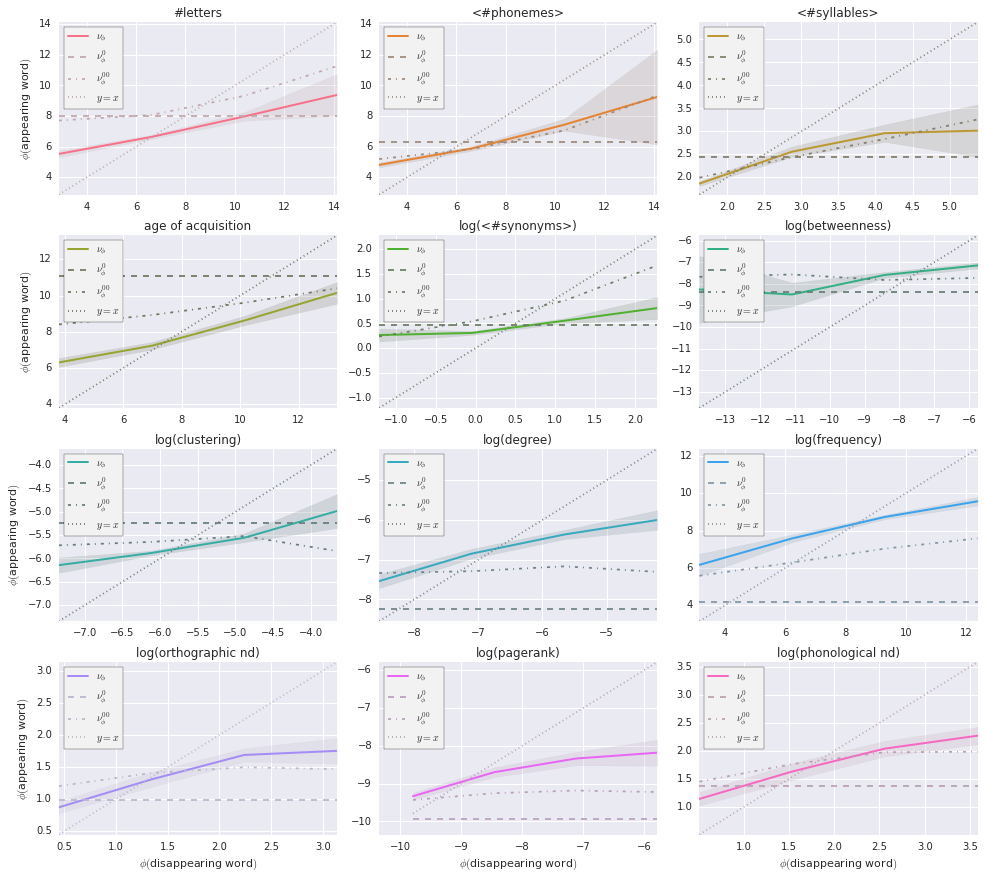

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

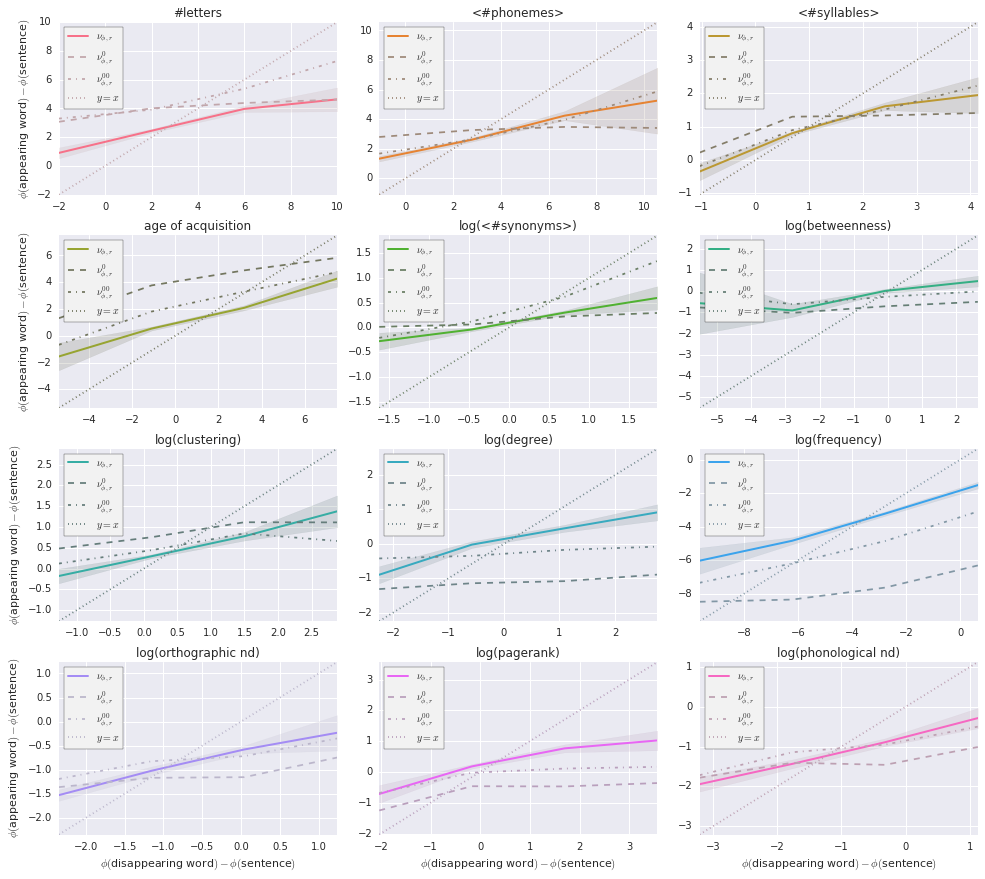

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

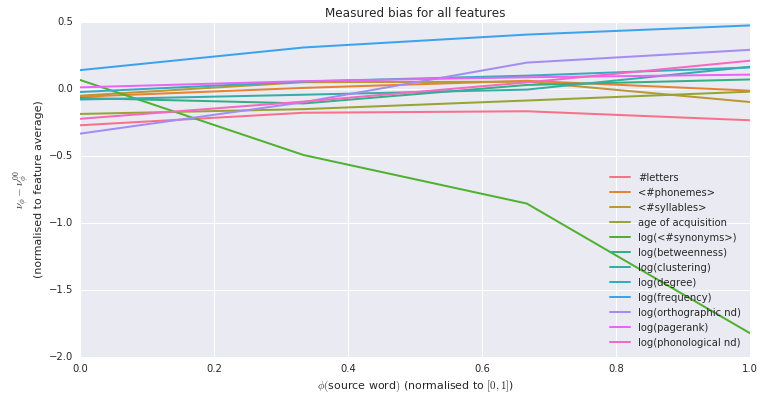

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

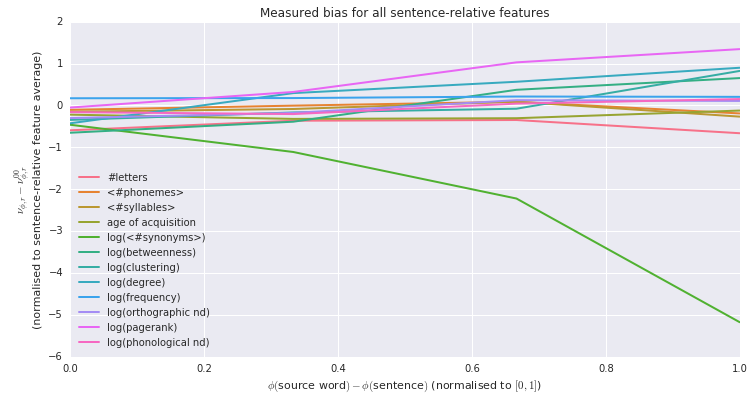

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

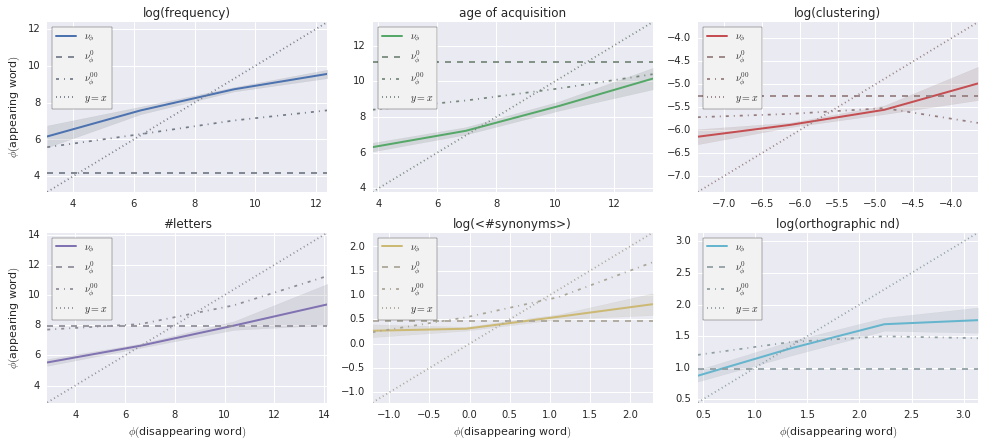

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

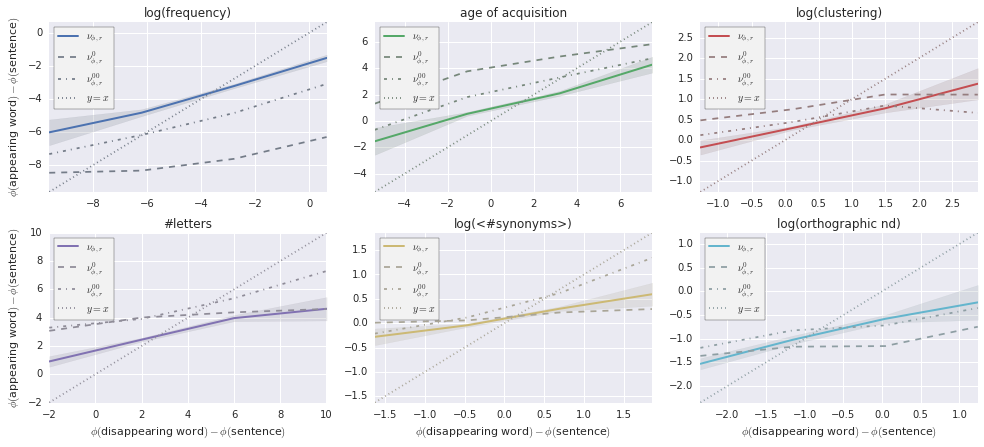

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

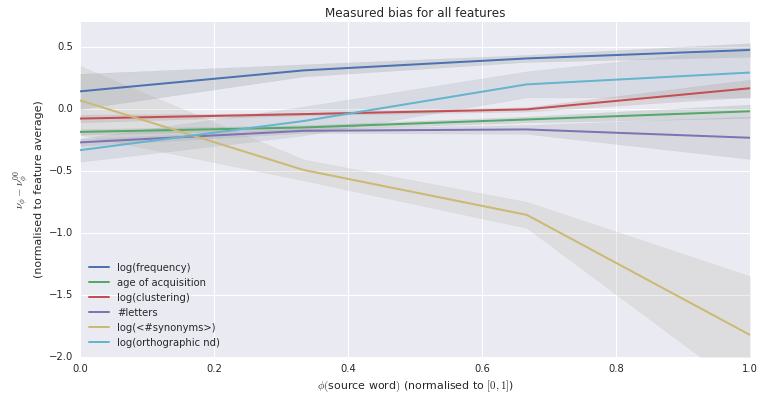

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

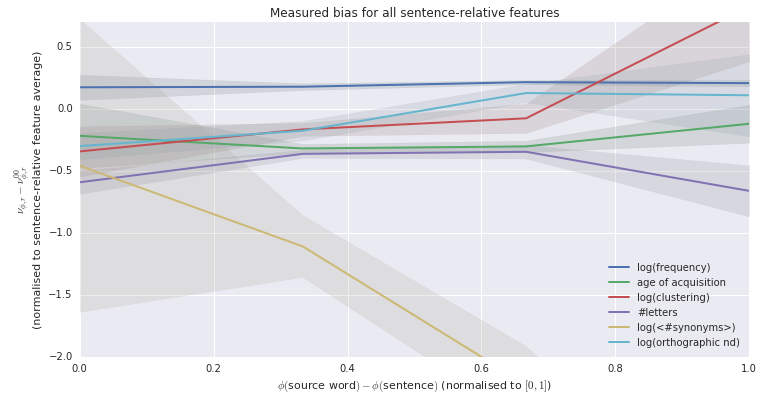

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


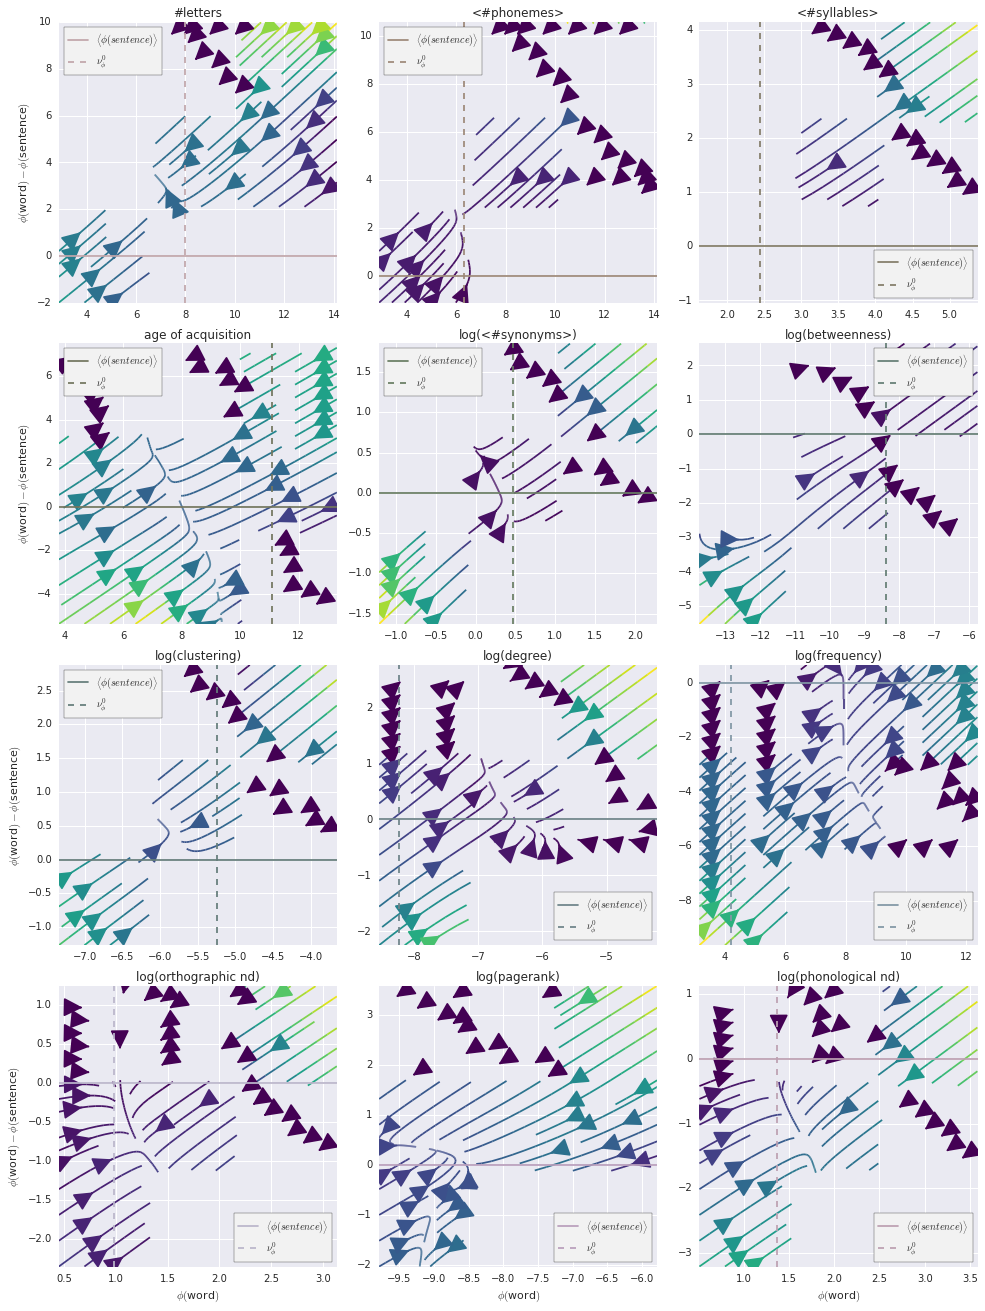

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


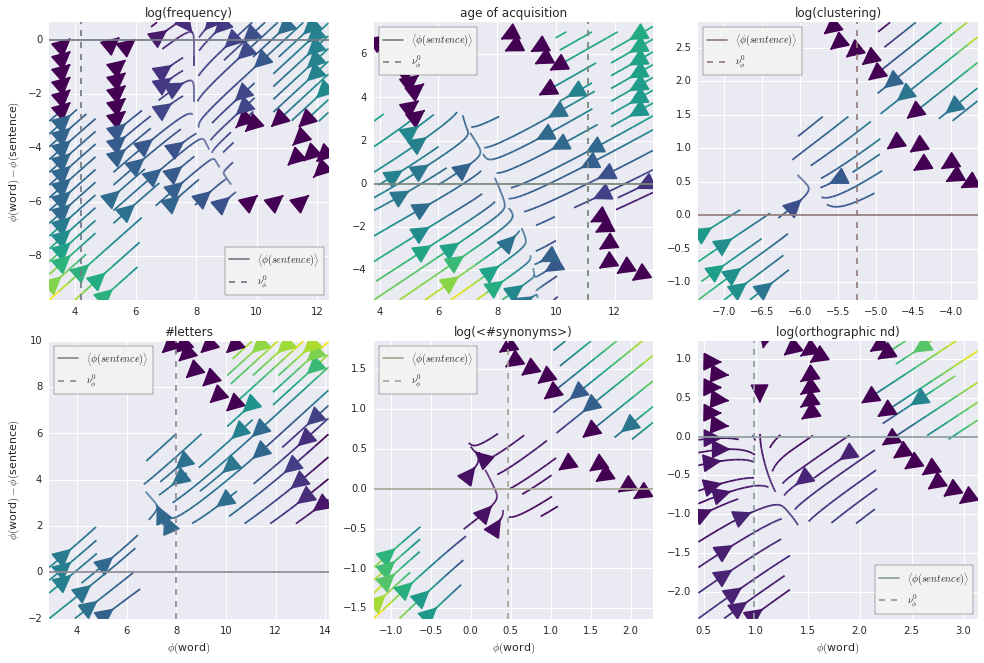

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.53118572  0.16976574  0.0848921   0.07132931  0.0343139   0.03116899
  0.0202735   0.01956441  0.01499873  0.00925026  0.00741278]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.473391,0.292751,-0.079578,0.243179,0.233970,-0.425775,0.211035,0.284207,-0.400030,0.278442,-0.160696,-0.003995
Component-1,-0.255709,0.427913,-0.135272,0.293592,0.288858,0.422551,-0.170181,0.294045,0.440113,-0.220527,0.164356,-0.015850
Component-2,0.815994,0.379718,-0.133319,0.126389,0.323499,-0.141447,-0.005648,0.091328,-0.101008,0.102026,-0.025573,-0.043849


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 53419) |          | Elapsed Time: 0:00:46 ETA:  28 days, 23:33:58

  0% (   92 of 53419) |                    | Elapsed Time: 0:00:47 ETA:  0:09:01

  0% (  189 of 53419) |                    | Elapsed Time: 0:00:48 ETA:  0:08:41

  0% (  288 of 53419) |                    | Elapsed Time: 0:00:49 ETA:  0:08:30

  0% (  387 of 53419) |                    | Elapsed Time: 0:00:50 ETA:  0:08:25

  0% (  489 of 53419) |                    | Elapsed Time: 0:00:51 ETA:  0:08:18

  1% (  600 of 53419) |                    | Elapsed Time: 0:00:52 ETA:  0:08:04

  1% (  668 of 53419) |                    | Elapsed Time: 0:00:53 ETA:  0:07:59

  1% (  774 of 53419) |                    | Elapsed Time: 0:00:54 ETA:  0:07:54

  1% (  883 of 53419) |                    | Elapsed Time: 0:00:55 ETA:  0:07:49

  1% (  992 of 53419) |                    | Elapsed Time: 0:00:56 ETA:  0:07:37

  2% ( 1109 of 53419) |                    | Elapsed Time: 0:00:57 ETA:  0:07:25

  2% ( 1220 of 53419) |                    | Elapsed Time: 0:00:58 ETA:  0:07:17

  2% ( 1336 of 53419) |                    | Elapsed Time: 0:00:59 ETA:  0:07:04

  2% ( 1459 of 53419) |                    | Elapsed Time: 0:01:00 ETA:  0:06:56

  2% ( 1594 of 53419) |                    | Elapsed Time: 0:01:01 ETA:  0:06:42

  3% ( 1704 of 53419) |                    | Elapsed Time: 0:01:02 ETA:  0:06:39

  3% ( 1761 of 53419) |                    | Elapsed Time: 0:01:03 ETA:  0:07:06

  3% ( 1817 of 53419) |                    | Elapsed Time: 0:01:04 ETA:  0:07:36

  3% ( 1874 of 53419) |                    | Elapsed Time: 0:01:05 ETA:  0:08:16

  3% ( 1929 of 53419) |                    | Elapsed Time: 0:01:06 ETA:  0:09:00

  3% ( 1991 of 53419) |                    | Elapsed Time: 0:01:07 ETA:  0:09:46

  3% ( 2004 of 53419) |                    | Elapsed Time: 0:01:07 ETA:  0:09:53

  3% ( 2060 of 53419) |                    | Elapsed Time: 0:01:08 ETA:  0:11:07

  3% ( 2117 of 53419) |                    | Elapsed Time: 0:01:09 ETA:  0:12:57

  4% ( 2173 of 53419) |                    | Elapsed Time: 0:01:10 ETA:  0:14:33

  4% ( 2232 of 53419) |                    | Elapsed Time: 0:01:11 ETA:  0:14:29

  4% ( 2287 of 53419) |                    | Elapsed Time: 0:01:12 ETA:  0:14:31

  4% ( 2351 of 53419) |                    | Elapsed Time: 0:01:13 ETA:  0:14:17

  4% ( 2409 of 53419) |                    | Elapsed Time: 0:01:14 ETA:  0:14:10

  4% ( 2522 of 53419) |                    | Elapsed Time: 0:01:15 ETA:  0:12:40

  4% ( 2626 of 53419) |                    | Elapsed Time: 0:01:16 ETA:  0:11:42

  5% ( 2671 of 53419) |#                   | Elapsed Time: 0:01:17 ETA:  0:11:01

  5% ( 2785 of 53419) |#                   | Elapsed Time: 0:01:18 ETA:  0:09:56

  5% ( 2893 of 53419) |#                   | Elapsed Time: 0:01:19 ETA:  0:09:07

  5% ( 3012 of 53419) |#                   | Elapsed Time: 0:01:20 ETA:  0:08:17

  5% ( 3130 of 53419) |#                   | Elapsed Time: 0:01:21 ETA:  0:07:33

  6% ( 3248 of 53419) |#                   | Elapsed Time: 0:01:22 ETA:  0:06:59

  6% ( 3339 of 53419) |#                   | Elapsed Time: 0:01:23 ETA:  0:06:27

  6% ( 3454 of 53419) |#                   | Elapsed Time: 0:01:24 ETA:  0:06:25

  6% ( 3575 of 53419) |#                   | Elapsed Time: 0:01:25 ETA:  0:06:15

  6% ( 3681 of 53419) |#                   | Elapsed Time: 0:01:26 ETA:  0:06:19

  7% ( 3789 of 53419) |#                   | Elapsed Time: 0:01:27 ETA:  0:06:21

  7% ( 3894 of 53419) |#                   | Elapsed Time: 0:01:28 ETA:  0:06:22

  7% ( 3944 of 53419) |#                   | Elapsed Time: 0:01:29 ETA:  0:06:56

  7% ( 4007 of 53419) |#                   | Elapsed Time: 0:01:29 ETA:  0:07:07

  7% ( 4098 of 53419) |#                   | Elapsed Time: 0:01:30 ETA:  0:07:23

  7% ( 4210 of 53419) |#                   | Elapsed Time: 0:01:31 ETA:  0:07:23

  8% ( 4304 of 53419) |#                   | Elapsed Time: 0:01:32 ETA:  0:07:35

  8% ( 4390 of 53419) |#                   | Elapsed Time: 0:01:33 ETA:  0:07:58

  8% ( 4476 of 53419) |#                   | Elapsed Time: 0:01:34 ETA:  0:08:12

  8% ( 4563 of 53419) |#                   | Elapsed Time: 0:01:35 ETA:  0:08:27

  8% ( 4648 of 53419) |#                   | Elapsed Time: 0:01:36 ETA:  0:08:42

  8% ( 4675 of 53419) |#                   | Elapsed Time: 0:01:37 ETA:  0:08:09

  8% ( 4795 of 53419) |#                   | Elapsed Time: 0:01:38 ETA:  0:07:47

  9% ( 4892 of 53419) |#                   | Elapsed Time: 0:01:39 ETA:  0:07:42

  9% ( 4984 of 53419) |#                   | Elapsed Time: 0:01:40 ETA:  0:07:55

  9% ( 5064 of 53419) |#                   | Elapsed Time: 0:01:41 ETA:  0:08:04

  9% ( 5149 of 53419) |#                   | Elapsed Time: 0:01:42 ETA:  0:08:04

  9% ( 5234 of 53419) |#                   | Elapsed Time: 0:01:43 ETA:  0:08:04

  9% ( 5314 of 53419) |#                   | Elapsed Time: 0:01:44 ETA:  0:08:08

 10% ( 5342 of 53419) |##                  | Elapsed Time: 0:01:44 ETA:  0:08:03

 10% ( 5427 of 53419) |##                  | Elapsed Time: 0:01:45 ETA:  0:08:08

 10% ( 5518 of 53419) |##                  | Elapsed Time: 0:01:46 ETA:  0:08:30

 10% ( 5601 of 53419) |##                  | Elapsed Time: 0:01:47 ETA:  0:08:42

 10% ( 5684 of 53419) |##                  | Elapsed Time: 0:01:48 ETA:  0:08:49

 10% ( 5772 of 53419) |##                  | Elapsed Time: 0:01:49 ETA:  0:08:41

 10% ( 5861 of 53419) |##                  | Elapsed Time: 0:01:50 ETA:  0:08:36

 11% ( 5945 of 53419) |##                  | Elapsed Time: 0:01:51 ETA:  0:08:37

 11% ( 6010 of 53419) |##                  | Elapsed Time: 0:01:52 ETA:  0:08:33

 11% ( 6090 of 53419) |##                  | Elapsed Time: 0:01:53 ETA:  0:08:38

 11% ( 6173 of 53419) |##                  | Elapsed Time: 0:01:54 ETA:  0:08:38

 11% ( 6259 of 53419) |##                  | Elapsed Time: 0:01:55 ETA:  0:08:42

 11% ( 6344 of 53419) |##                  | Elapsed Time: 0:01:56 ETA:  0:08:39

 12% ( 6430 of 53419) |##                  | Elapsed Time: 0:01:57 ETA:  0:08:35

 12% ( 6515 of 53419) |##                  | Elapsed Time: 0:01:58 ETA:  0:08:36

 12% ( 6612 of 53419) |##                  | Elapsed Time: 0:01:59 ETA:  0:08:29

 12% ( 6678 of 53419) |##                  | Elapsed Time: 0:02:00 ETA:  0:08:17

 12% ( 6779 of 53419) |##                  | Elapsed Time: 0:02:01 ETA:  0:08:02

 12% ( 6886 of 53419) |##                  | Elapsed Time: 0:02:02 ETA:  0:07:40

 13% ( 6993 of 53419) |##                  | Elapsed Time: 0:02:03 ETA:  0:07:22

 13% ( 7100 of 53419) |##                  | Elapsed Time: 0:02:04 ETA:  0:07:07

 13% ( 7202 of 53419) |##                  | Elapsed Time: 0:02:05 ETA:  0:06:55

 13% ( 7300 of 53419) |##                  | Elapsed Time: 0:02:06 ETA:  0:06:47

 13% ( 7346 of 53419) |##                  | Elapsed Time: 0:02:06 ETA:  0:06:43

 13% ( 7457 of 53419) |##                  | Elapsed Time: 0:02:07 ETA:  0:06:32

 14% ( 7579 of 53419) |##                  | Elapsed Time: 0:02:08 ETA:  0:06:21

 14% ( 7698 of 53419) |##                  | Elapsed Time: 0:02:09 ETA:  0:06:10

 14% ( 7825 of 53419) |##                  | Elapsed Time: 0:02:10 ETA:  0:05:59

 14% ( 7955 of 53419) |##                  | Elapsed Time: 0:02:11 ETA:  0:05:46

 15% ( 8013 of 53419) |###                 | Elapsed Time: 0:02:12 ETA:  0:05:38

 15% ( 8144 of 53419) |###                 | Elapsed Time: 0:02:13 ETA:  0:05:23

 15% ( 8276 of 53419) |###                 | Elapsed Time: 0:02:14 ETA:  0:05:06

 15% ( 8405 of 53419) |###                 | Elapsed Time: 0:02:15 ETA:  0:04:53

 15% ( 8533 of 53419) |###                 | Elapsed Time: 0:02:16 ETA:  0:04:45

 16% ( 8643 of 53419) |###                 | Elapsed Time: 0:02:17 ETA:  0:04:48

 16% ( 8681 of 53419) |###                 | Elapsed Time: 0:02:17 ETA:  0:04:50

 16% ( 8772 of 53419) |###                 | Elapsed Time: 0:02:18 ETA:  0:05:06

 16% ( 8875 of 53419) |###                 | Elapsed Time: 0:02:19 ETA:  0:05:18

 16% ( 8968 of 53419) |###                 | Elapsed Time: 0:02:20 ETA:  0:05:32

 16% ( 9059 of 53419) |###                 | Elapsed Time: 0:02:21 ETA:  0:05:51

 17% ( 9161 of 53419) |###                 | Elapsed Time: 0:02:22 ETA:  0:06:07

 17% ( 9263 of 53419) |###                 | Elapsed Time: 0:02:23 ETA:  0:06:22

 17% ( 9349 of 53419) |###                 | Elapsed Time: 0:02:24 ETA:  0:06:41

 17% ( 9439 of 53419) |###                 | Elapsed Time: 0:02:25 ETA:  0:06:55

 17% ( 9541 of 53419) |###                 | Elapsed Time: 0:02:26 ETA:  0:06:49

 18% ( 9647 of 53419) |###                 | Elapsed Time: 0:02:27 ETA:  0:06:39

 18% ( 9752 of 53419) |###                 | Elapsed Time: 0:02:28 ETA:  0:06:36

 18% ( 9850 of 53419) |###                 | Elapsed Time: 0:02:29 ETA:  0:06:32

 18% ( 9955 of 53419) |###                 | Elapsed Time: 0:02:30 ETA:  0:06:22

 18% (10017 of 53419) |###                 | Elapsed Time: 0:02:31 ETA:  0:06:21

 18% (10124 of 53419) |###                 | Elapsed Time: 0:02:32 ETA:  0:06:17

 19% (10228 of 53419) |###                 | Elapsed Time: 0:02:33 ETA:  0:06:11

 19% (10342 of 53419) |###                 | Elapsed Time: 0:02:34 ETA:  0:05:55

 19% (10444 of 53419) |###                 | Elapsed Time: 0:02:35 ETA:  0:05:54

 19% (10547 of 53419) |###                 | Elapsed Time: 0:02:36 ETA:  0:05:55

 19% (10645 of 53419) |###                 | Elapsed Time: 0:02:37 ETA:  0:05:57

 20% (10684 of 53419) |####                | Elapsed Time: 0:02:37 ETA:  0:06:06

 20% (10757 of 53419) |####                | Elapsed Time: 0:02:38 ETA:  0:06:27

 20% (10841 of 53419) |####                | Elapsed Time: 0:02:39 ETA:  0:06:39

 20% (10931 of 53419) |####                | Elapsed Time: 0:02:40 ETA:  0:06:49

 20% (11019 of 53419) |####                | Elapsed Time: 0:02:41 ETA:  0:07:00

 20% (11074 of 53419) |####                | Elapsed Time: 0:02:42 ETA:  0:07:47

 20% (11142 of 53419) |####                | Elapsed Time: 0:02:43 ETA:  0:08:17

 20% (11200 of 53419) |####                | Elapsed Time: 0:02:44 ETA:  0:09:02

 21% (11302 of 53419) |####                | Elapsed Time: 0:02:45 ETA:  0:08:58

 21% (11352 of 53419) |####                | Elapsed Time: 0:02:46 ETA:  0:08:41

 21% (11455 of 53419) |####                | Elapsed Time: 0:02:47 ETA:  0:08:09

 21% (11546 of 53419) |####                | Elapsed Time: 0:02:48 ETA:  0:08:02

 21% (11646 of 53419) |####                | Elapsed Time: 0:02:49 ETA:  0:07:52

 22% (11755 of 53419) |####                | Elapsed Time: 0:02:50 ETA:  0:07:33

 22% (11857 of 53419) |####                | Elapsed Time: 0:02:51 ETA:  0:06:53

 22% (11935 of 53419) |####                | Elapsed Time: 0:02:52 ETA:  0:06:45

 22% (12020 of 53419) |####                | Elapsed Time: 0:02:53 ETA:  0:06:13

 22% (12151 of 53419) |####                | Elapsed Time: 0:02:54 ETA:  0:05:53

 22% (12273 of 53419) |####                | Elapsed Time: 0:02:55 ETA:  0:05:39

 23% (12395 of 53419) |####                | Elapsed Time: 0:02:56 ETA:  0:05:28

 23% (12507 of 53419) |####                | Elapsed Time: 0:02:57 ETA:  0:05:15

 23% (12637 of 53419) |####                | Elapsed Time: 0:02:58 ETA:  0:04:59

 23% (12688 of 53419) |####                | Elapsed Time: 0:02:58 ETA:  0:04:53

 23% (12811 of 53419) |####                | Elapsed Time: 0:02:59 ETA:  0:04:42

 24% (12896 of 53419) |####                | Elapsed Time: 0:03:00 ETA:  0:04:37

 24% (12979 of 53419) |####                | Elapsed Time: 0:03:01 ETA:  0:04:47

 24% (13062 of 53419) |####                | Elapsed Time: 0:03:02 ETA:  0:05:11

 24% (13150 of 53419) |####                | Elapsed Time: 0:03:03 ETA:  0:05:29

 24% (13260 of 53419) |####                | Elapsed Time: 0:03:04 ETA:  0:05:35

 25% (13355 of 53419) |#####               | Elapsed Time: 0:03:05 ETA:  0:05:38

 25% (13462 of 53419) |#####               | Elapsed Time: 0:03:06 ETA:  0:05:52

 25% (13562 of 53419) |#####               | Elapsed Time: 0:03:07 ETA:  0:05:59

 25% (13675 of 53419) |#####               | Elapsed Time: 0:03:08 ETA:  0:06:04

 25% (13782 of 53419) |#####               | Elapsed Time: 0:03:09 ETA:  0:05:50

 25% (13883 of 53419) |#####               | Elapsed Time: 0:03:10 ETA:  0:05:38

 26% (13980 of 53419) |#####               | Elapsed Time: 0:03:11 ETA:  0:05:30

 26% (14023 of 53419) |#####               | Elapsed Time: 0:03:11 ETA:  0:05:15

 26% (14154 of 53419) |#####               | Elapsed Time: 0:03:12 ETA:  0:05:02

 26% (14281 of 53419) |#####               | Elapsed Time: 0:03:13 ETA:  0:04:50

 26% (14371 of 53419) |#####               | Elapsed Time: 0:03:14 ETA:  0:04:58

 27% (14473 of 53419) |#####               | Elapsed Time: 0:03:15 ETA:  0:04:56

 27% (14572 of 53419) |#####               | Elapsed Time: 0:03:16 ETA:  0:05:03

 27% (14667 of 53419) |#####               | Elapsed Time: 0:03:17 ETA:  0:05:09

 27% (14691 of 53419) |#####               | Elapsed Time: 0:03:18 ETA:  0:05:05

 27% (14803 of 53419) |#####               | Elapsed Time: 0:03:19 ETA:  0:04:55

 27% (14913 of 53419) |#####               | Elapsed Time: 0:03:20 ETA:  0:04:57

 28% (15040 of 53419) |#####               | Elapsed Time: 0:03:21 ETA:  0:04:58

 28% (15173 of 53419) |#####               | Elapsed Time: 0:03:22 ETA:  0:04:53

 28% (15297 of 53419) |#####               | Elapsed Time: 0:03:23 ETA:  0:04:34

 28% (15358 of 53419) |#####               | Elapsed Time: 0:03:23 ETA:  0:04:29

 28% (15490 of 53419) |#####               | Elapsed Time: 0:03:24 ETA:  0:04:11

 29% (15621 of 53419) |#####               | Elapsed Time: 0:03:25 ETA:  0:03:52

 29% (15727 of 53419) |#####               | Elapsed Time: 0:03:26 ETA:  0:03:56

 29% (15811 of 53419) |#####               | Elapsed Time: 0:03:27 ETA:  0:04:07

 29% (15919 of 53419) |#####               | Elapsed Time: 0:03:28 ETA:  0:04:07

 30% (16026 of 53419) |######              | Elapsed Time: 0:03:29 ETA:  0:04:05

 30% (16152 of 53419) |######              | Elapsed Time: 0:03:30 ETA:  0:04:07

 30% (16285 of 53419) |######              | Elapsed Time: 0:03:31 ETA:  0:04:02

 30% (16404 of 53419) |######              | Elapsed Time: 0:03:32 ETA:  0:03:58

 30% (16525 of 53419) |######              | Elapsed Time: 0:03:33 ETA:  0:04:02

 31% (16622 of 53419) |######              | Elapsed Time: 0:03:34 ETA:  0:04:17

 31% (16694 of 53419) |######              | Elapsed Time: 0:03:35 ETA:  0:04:16

 31% (16829 of 53419) |######              | Elapsed Time: 0:03:36 ETA:  0:03:51

 31% (16972 of 53419) |######              | Elapsed Time: 0:03:37 ETA:  0:03:36

 32% (17104 of 53419) |######              | Elapsed Time: 0:03:38 ETA:  0:03:34

 32% (17216 of 53419) |######              | Elapsed Time: 0:03:39 ETA:  0:03:39

 32% (17321 of 53419) |######              | Elapsed Time: 0:03:40 ETA:  0:03:50

 32% (17362 of 53419) |######              | Elapsed Time: 0:03:40 ETA:  0:03:57

 32% (17432 of 53419) |######              | Elapsed Time: 0:03:41 ETA:  0:04:22

 32% (17512 of 53419) |######              | Elapsed Time: 0:03:42 ETA:  0:04:30

 32% (17626 of 53419) |######              | Elapsed Time: 0:03:43 ETA:  0:04:24

 33% (17735 of 53419) |######              | Elapsed Time: 0:03:44 ETA:  0:04:37

 33% (17822 of 53419) |######              | Elapsed Time: 0:03:45 ETA:  0:05:09

 33% (17909 of 53419) |######              | Elapsed Time: 0:03:46 ETA:  0:05:38

 33% (17998 of 53419) |######              | Elapsed Time: 0:03:47 ETA:  0:05:54

 33% (18029 of 53419) |######              | Elapsed Time: 0:03:48 ETA:  0:05:58

 33% (18133 of 53419) |######              | Elapsed Time: 0:03:49 ETA:  0:05:44

 34% (18255 of 53419) |######              | Elapsed Time: 0:03:50 ETA:  0:05:07

 34% (18358 of 53419) |######              | Elapsed Time: 0:03:51 ETA:  0:04:51

 34% (18451 of 53419) |######              | Elapsed Time: 0:03:52 ETA:  0:05:04

 34% (18550 of 53419) |######              | Elapsed Time: 0:03:53 ETA:  0:05:09

 35% (18697 of 53419) |#######             | Elapsed Time: 0:03:54 ETA:  0:04:25

 35% (18814 of 53419) |#######             | Elapsed Time: 0:03:55 ETA:  0:04:07

 35% (18897 of 53419) |#######             | Elapsed Time: 0:03:56 ETA:  0:04:24

 35% (19010 of 53419) |#######             | Elapsed Time: 0:03:57 ETA:  0:04:18

 35% (19078 of 53419) |#######             | Elapsed Time: 0:03:58 ETA:  0:04:50

 35% (19137 of 53419) |#######             | Elapsed Time: 0:03:59 ETA:  0:05:19

 36% (19269 of 53419) |#######             | Elapsed Time: 0:04:00 ETA:  0:04:50

 36% (19365 of 53419) |#######             | Elapsed Time: 0:04:01 ETA:  0:04:49

 36% (19450 of 53419) |#######             | Elapsed Time: 0:04:02 ETA:  0:05:22

 36% (19544 of 53419) |#######             | Elapsed Time: 0:04:03 ETA:  0:05:25

 36% (19654 of 53419) |#######             | Elapsed Time: 0:04:04 ETA:  0:05:28

 37% (19766 of 53419) |#######             | Elapsed Time: 0:04:05 ETA:  0:05:08

 37% (19905 of 53419) |#######             | Elapsed Time: 0:04:06 ETA:  0:04:51

 37% (20033 of 53419) |#######             | Elapsed Time: 0:04:07 ETA:  0:03:50

 37% (20150 of 53419) |#######             | Elapsed Time: 0:04:08 ETA:  0:03:57

 37% (20243 of 53419) |#######             | Elapsed Time: 0:04:09 ETA:  0:03:59

 38% (20329 of 53419) |#######             | Elapsed Time: 0:04:10 ETA:  0:03:58

 38% (20439 of 53419) |#######             | Elapsed Time: 0:04:11 ETA:  0:03:48

 38% (20553 of 53419) |#######             | Elapsed Time: 0:04:12 ETA:  0:03:45

 38% (20656 of 53419) |#######             | Elapsed Time: 0:04:13 ETA:  0:03:49

 38% (20700 of 53419) |#######             | Elapsed Time: 0:04:13 ETA:  0:03:59

 38% (20821 of 53419) |#######             | Elapsed Time: 0:04:14 ETA:  0:04:02

 39% (20895 of 53419) |#######             | Elapsed Time: 0:04:15 ETA:  0:04:21

 39% (20987 of 53419) |#######             | Elapsed Time: 0:04:16 ETA:  0:04:35

 39% (21084 of 53419) |#######             | Elapsed Time: 0:04:17 ETA:  0:04:32

 39% (21172 of 53419) |#######             | Elapsed Time: 0:04:18 ETA:  0:04:30

 39% (21275 of 53419) |#######             | Elapsed Time: 0:04:19 ETA:  0:04:33

 40% (21368 of 53419) |########            | Elapsed Time: 0:04:20 ETA:  0:04:33

 40% (21471 of 53419) |########            | Elapsed Time: 0:04:21 ETA:  0:04:32

 40% (21581 of 53419) |########            | Elapsed Time: 0:04:22 ETA:  0:04:34

 40% (21690 of 53419) |########            | Elapsed Time: 0:04:23 ETA:  0:04:40

 40% (21770 of 53419) |########            | Elapsed Time: 0:04:24 ETA:  0:04:35

 40% (21901 of 53419) |########            | Elapsed Time: 0:04:25 ETA:  0:04:11

 41% (22036 of 53419) |########            | Elapsed Time: 0:04:26 ETA:  0:03:45

 41% (22153 of 53419) |########            | Elapsed Time: 0:04:27 ETA:  0:03:36

 41% (22248 of 53419) |########            | Elapsed Time: 0:04:28 ETA:  0:03:46

 41% (22354 of 53419) |########            | Elapsed Time: 0:04:29 ETA:  0:03:43

 42% (22474 of 53419) |########            | Elapsed Time: 0:04:30 ETA:  0:03:36

 42% (22597 of 53419) |########            | Elapsed Time: 0:04:31 ETA:  0:03:28

 42% (22704 of 53419) |########            | Elapsed Time: 0:04:32 ETA:  0:03:27

 42% (22794 of 53419) |########            | Elapsed Time: 0:04:33 ETA:  0:03:46

 42% (22924 of 53419) |########            | Elapsed Time: 0:04:34 ETA:  0:03:33

 43% (23026 of 53419) |########            | Elapsed Time: 0:04:35 ETA:  0:03:40

 43% (23139 of 53419) |########            | Elapsed Time: 0:04:36 ETA:  0:03:29

 43% (23244 of 53419) |########            | Elapsed Time: 0:04:37 ETA:  0:03:29

 43% (23344 of 53419) |########            | Elapsed Time: 0:04:38 ETA:  0:03:40

 43% (23371 of 53419) |########            | Elapsed Time: 0:04:38 ETA:  0:03:49

 43% (23484 of 53419) |########            | Elapsed Time: 0:04:39 ETA:  0:03:39

 44% (23601 of 53419) |########            | Elapsed Time: 0:04:40 ETA:  0:03:32

 44% (23719 of 53419) |########            | Elapsed Time: 0:04:41 ETA:  0:03:16

 44% (23816 of 53419) |########            | Elapsed Time: 0:04:42 ETA:  0:03:33

 44% (23931 of 53419) |########            | Elapsed Time: 0:04:43 ETA:  0:03:25

 45% (24039 of 53419) |#########           | Elapsed Time: 0:04:44 ETA:  0:03:26

 45% (24109 of 53419) |#########           | Elapsed Time: 0:04:45 ETA:  0:03:44

 45% (24211 of 53419) |#########           | Elapsed Time: 0:04:46 ETA:  0:03:41

 45% (24313 of 53419) |#########           | Elapsed Time: 0:04:47 ETA:  0:03:43

 45% (24424 of 53419) |#########           | Elapsed Time: 0:04:48 ETA:  0:03:43

 45% (24538 of 53419) |#########           | Elapsed Time: 0:04:49 ETA:  0:03:44

 46% (24670 of 53419) |#########           | Elapsed Time: 0:04:50 ETA:  0:03:35

 46% (24707 of 53419) |#########           | Elapsed Time: 0:04:51 ETA:  0:03:28

 46% (24818 of 53419) |#########           | Elapsed Time: 0:04:52 ETA:  0:03:29

 46% (24900 of 53419) |#########           | Elapsed Time: 0:04:53 ETA:  0:03:45

 46% (25023 of 53419) |#########           | Elapsed Time: 0:04:54 ETA:  0:03:14

 47% (25126 of 53419) |#########           | Elapsed Time: 0:04:55 ETA:  0:03:12

 47% (25228 of 53419) |#########           | Elapsed Time: 0:04:56 ETA:  0:03:11

 47% (25337 of 53419) |#########           | Elapsed Time: 0:04:57 ETA:  0:03:11

 47% (25375 of 53419) |#########           | Elapsed Time: 0:04:57 ETA:  0:03:14

 47% (25484 of 53419) |#########           | Elapsed Time: 0:04:58 ETA:  0:03:27

 47% (25615 of 53419) |#########           | Elapsed Time: 0:04:59 ETA:  0:03:14

 48% (25728 of 53419) |#########           | Elapsed Time: 0:05:00 ETA:  0:03:12

 48% (25865 of 53419) |#########           | Elapsed Time: 0:05:01 ETA:  0:02:42

 48% (25992 of 53419) |#########           | Elapsed Time: 0:05:02 ETA:  0:02:39

 48% (26042 of 53419) |#########           | Elapsed Time: 0:05:03 ETA:  0:02:30

 48% (26149 of 53419) |#########           | Elapsed Time: 0:05:04 ETA:  0:02:27

 49% (26236 of 53419) |#########           | Elapsed Time: 0:05:05 ETA:  0:02:37

 49% (26303 of 53419) |#########           | Elapsed Time: 0:05:06 ETA:  0:02:59

 49% (26411 of 53419) |#########           | Elapsed Time: 0:05:07 ETA:  0:02:59

 49% (26528 of 53419) |#########           | Elapsed Time: 0:05:08 ETA:  0:03:05

 49% (26656 of 53419) |#########           | Elapsed Time: 0:05:09 ETA:  0:02:56

 50% (26710 of 53419) |##########          | Elapsed Time: 0:05:09 ETA:  0:03:04

 50% (26847 of 53419) |##########          | Elapsed Time: 0:05:10 ETA:  0:02:58

 50% (26985 of 53419) |##########          | Elapsed Time: 0:05:11 ETA:  0:02:45

 50% (27109 of 53419) |##########          | Elapsed Time: 0:05:12 ETA:  0:02:36

 50% (27223 of 53419) |##########          | Elapsed Time: 0:05:13 ETA:  0:02:21

 51% (27321 of 53419) |##########          | Elapsed Time: 0:05:14 ETA:  0:02:06

 51% (27378 of 53419) |##########          | Elapsed Time: 0:05:15 ETA:  0:02:06

 51% (27478 of 53419) |##########          | Elapsed Time: 0:05:16 ETA:  0:02:13

 51% (27580 of 53419) |##########          | Elapsed Time: 0:05:17 ETA:  0:02:25

 51% (27686 of 53419) |##########          | Elapsed Time: 0:05:18 ETA:  0:02:33

 52% (27796 of 53419) |##########          | Elapsed Time: 0:05:19 ETA:  0:02:46

 52% (27899 of 53419) |##########          | Elapsed Time: 0:05:20 ETA:  0:03:03

 52% (28017 of 53419) |##########          | Elapsed Time: 0:05:21 ETA:  0:03:06

 52% (28045 of 53419) |##########          | Elapsed Time: 0:05:21 ETA:  0:03:10

 52% (28175 of 53419) |##########          | Elapsed Time: 0:05:22 ETA:  0:02:50

 52% (28310 of 53419) |##########          | Elapsed Time: 0:05:23 ETA:  0:02:32

 53% (28418 of 53419) |##########          | Elapsed Time: 0:05:24 ETA:  0:02:27

 53% (28513 of 53419) |##########          | Elapsed Time: 0:05:25 ETA:  0:02:29

 53% (28608 of 53419) |##########          | Elapsed Time: 0:05:26 ETA:  0:02:34

 53% (28713 of 53419) |##########          | Elapsed Time: 0:05:27 ETA:  0:02:41

 53% (28815 of 53419) |##########          | Elapsed Time: 0:05:28 ETA:  0:02:50

 54% (28920 of 53419) |##########          | Elapsed Time: 0:05:29 ETA:  0:02:50

 54% (29042 of 53419) |##########          | Elapsed Time: 0:05:30 ETA:  0:02:53

 54% (29150 of 53419) |##########          | Elapsed Time: 0:05:31 ETA:  0:03:09

 54% (29267 of 53419) |##########          | Elapsed Time: 0:05:32 ETA:  0:03:02

 55% (29381 of 53419) |###########         | Elapsed Time: 0:05:33 ETA:  0:02:48

 55% (29501 of 53419) |###########         | Elapsed Time: 0:05:34 ETA:  0:02:29

 55% (29610 of 53419) |###########         | Elapsed Time: 0:05:35 ETA:  0:02:27

 55% (29712 of 53419) |###########         | Elapsed Time: 0:05:36 ETA:  0:02:26

 55% (29811 of 53419) |###########         | Elapsed Time: 0:05:37 ETA:  0:02:29

 56% (29948 of 53419) |###########         | Elapsed Time: 0:05:38 ETA:  0:02:20

 56% (30049 of 53419) |###########         | Elapsed Time: 0:05:39 ETA:  0:02:07

 56% (30169 of 53419) |###########         | Elapsed Time: 0:05:40 ETA:  0:02:05

 56% (30285 of 53419) |###########         | Elapsed Time: 0:05:41 ETA:  0:01:59

 56% (30393 of 53419) |###########         | Elapsed Time: 0:05:42 ETA:  0:02:01

 57% (30498 of 53419) |###########         | Elapsed Time: 0:05:43 ETA:  0:02:07

 57% (30603 of 53419) |###########         | Elapsed Time: 0:05:44 ETA:  0:02:08

 57% (30716 of 53419) |###########         | Elapsed Time: 0:05:45 ETA:  0:02:03

 57% (30827 of 53419) |###########         | Elapsed Time: 0:05:46 ETA:  0:02:16

 57% (30957 of 53419) |###########         | Elapsed Time: 0:05:47 ETA:  0:02:15

 58% (31063 of 53419) |###########         | Elapsed Time: 0:05:48 ETA:  0:02:22

 58% (31180 of 53419) |###########         | Elapsed Time: 0:05:49 ETA:  0:02:21

 58% (31281 of 53419) |###########         | Elapsed Time: 0:05:50 ETA:  0:02:23

 58% (31384 of 53419) |###########         | Elapsed Time: 0:05:51 ETA:  0:02:23

 58% (31508 of 53419) |###########         | Elapsed Time: 0:05:52 ETA:  0:02:12

 59% (31631 of 53419) |###########         | Elapsed Time: 0:05:53 ETA:  0:02:00

 59% (31748 of 53419) |###########         | Elapsed Time: 0:05:54 ETA:  0:01:53

 59% (31852 of 53419) |###########         | Elapsed Time: 0:05:55 ETA:  0:01:55

 59% (31965 of 53419) |###########         | Elapsed Time: 0:05:56 ETA:  0:02:03

 60% (32052 of 53419) |############        | Elapsed Time: 0:05:57 ETA:  0:02:03

 60% (32164 of 53419) |############        | Elapsed Time: 0:05:58 ETA:  0:02:04

 60% (32286 of 53419) |############        | Elapsed Time: 0:05:59 ETA:  0:01:53

 60% (32409 of 53419) |############        | Elapsed Time: 0:06:00 ETA:  0:01:43

 60% (32528 of 53419) |############        | Elapsed Time: 0:06:01 ETA:  0:01:44

 61% (32645 of 53419) |############        | Elapsed Time: 0:06:02 ETA:  0:01:46

 61% (32720 of 53419) |############        | Elapsed Time: 0:06:03 ETA:  0:01:49

 61% (32803 of 53419) |############        | Elapsed Time: 0:06:04 ETA:  0:01:59

 61% (32872 of 53419) |############        | Elapsed Time: 0:06:05 ETA:  0:02:21

 61% (32940 of 53419) |############        | Elapsed Time: 0:06:06 ETA:  0:02:40

 61% (33008 of 53419) |############        | Elapsed Time: 0:06:07 ETA:  0:03:07

 61% (33076 of 53419) |############        | Elapsed Time: 0:06:08 ETA:  0:03:44

 62% (33175 of 53419) |############        | Elapsed Time: 0:06:09 ETA:  0:04:02

 62% (33272 of 53419) |############        | Elapsed Time: 0:06:10 ETA:  0:04:19

 62% (33387 of 53419) |############        | Elapsed Time: 0:06:11 ETA:  0:04:47

 62% (33493 of 53419) |############        | Elapsed Time: 0:06:12 ETA:  0:04:23

 62% (33580 of 53419) |############        | Elapsed Time: 0:06:13 ETA:  0:04:05

 63% (33675 of 53419) |############        | Elapsed Time: 0:06:14 ETA:  0:03:40

 63% (33788 of 53419) |############        | Elapsed Time: 0:06:15 ETA:  0:03:05

 63% (33914 of 53419) |############        | Elapsed Time: 0:06:16 ETA:  0:02:25

 63% (33971 of 53419) |############        | Elapsed Time: 0:06:17 ETA:  0:02:52

 63% (34055 of 53419) |############        | Elapsed Time: 0:06:18 ETA:  0:03:04

 63% (34181 of 53419) |############        | Elapsed Time: 0:06:19 ETA:  0:02:44

 64% (34310 of 53419) |############        | Elapsed Time: 0:06:20 ETA:  0:02:28

 64% (34428 of 53419) |############        | Elapsed Time: 0:06:21 ETA:  0:02:08

 64% (34517 of 53419) |############        | Elapsed Time: 0:06:22 ETA:  0:02:10

 64% (34623 of 53419) |############        | Elapsed Time: 0:06:23 ETA:  0:02:13

 65% (34723 of 53419) |#############       | Elapsed Time: 0:06:24 ETA:  0:02:13

 65% (34824 of 53419) |#############       | Elapsed Time: 0:06:25 ETA:  0:01:45

 65% (34933 of 53419) |#############       | Elapsed Time: 0:06:26 ETA:  0:01:26

 65% (35043 of 53419) |#############       | Elapsed Time: 0:06:27 ETA:  0:01:28

 65% (35162 of 53419) |#############       | Elapsed Time: 0:06:28 ETA:  0:01:30

 66% (35286 of 53419) |#############       | Elapsed Time: 0:06:29 ETA:  0:01:32

 66% (35391 of 53419) |#############       | Elapsed Time: 0:06:30 ETA:  0:01:36

 66% (35494 of 53419) |#############       | Elapsed Time: 0:06:31 ETA:  0:01:28

 66% (35606 of 53419) |#############       | Elapsed Time: 0:06:32 ETA:  0:01:24

 66% (35716 of 53419) |#############       | Elapsed Time: 0:06:33 ETA:  0:01:31

 67% (35812 of 53419) |#############       | Elapsed Time: 0:06:34 ETA:  0:01:33

 67% (35920 of 53419) |#############       | Elapsed Time: 0:06:35 ETA:  0:01:32

 67% (36027 of 53419) |#############       | Elapsed Time: 0:06:36 ETA:  0:01:33

 67% (36058 of 53419) |#############       | Elapsed Time: 0:06:36 ETA:  0:01:34

 67% (36123 of 53419) |#############       | Elapsed Time: 0:06:37 ETA:  0:02:08

 67% (36229 of 53419) |#############       | Elapsed Time: 0:06:38 ETA:  0:02:07

 68% (36372 of 53419) |#############       | Elapsed Time: 0:06:39 ETA:  0:01:42

 68% (36475 of 53419) |#############       | Elapsed Time: 0:06:40 ETA:  0:01:46

 68% (36591 of 53419) |#############       | Elapsed Time: 0:06:41 ETA:  0:01:42

 68% (36726 of 53419) |#############       | Elapsed Time: 0:06:42 ETA:  0:01:28

 68% (36828 of 53419) |#############       | Elapsed Time: 0:06:43 ETA:  0:01:30

 69% (36935 of 53419) |#############       | Elapsed Time: 0:06:44 ETA:  0:01:34

 69% (37030 of 53419) |#############       | Elapsed Time: 0:06:45 ETA:  0:01:16

 69% (37136 of 53419) |#############       | Elapsed Time: 0:06:46 ETA:  0:01:15

 69% (37247 of 53419) |#############       | Elapsed Time: 0:06:47 ETA:  0:01:33

 69% (37370 of 53419) |#############       | Elapsed Time: 0:06:48 ETA:  0:01:21

 70% (37394 of 53419) |##############      | Elapsed Time: 0:06:49 ETA:  0:01:26

 70% (37510 of 53419) |##############      | Elapsed Time: 0:06:50 ETA:  0:01:23

 70% (37588 of 53419) |##############      | Elapsed Time: 0:06:51 ETA:  0:01:43

 70% (37706 of 53419) |##############      | Elapsed Time: 0:06:52 ETA:  0:01:32

 70% (37816 of 53419) |##############      | Elapsed Time: 0:06:53 ETA:  0:01:29

 70% (37913 of 53419) |##############      | Elapsed Time: 0:06:54 ETA:  0:01:27

 71% (38038 of 53419) |##############      | Elapsed Time: 0:06:55 ETA:  0:01:16

 71% (38062 of 53419) |##############      | Elapsed Time: 0:06:55 ETA:  0:01:17

 71% (38166 of 53419) |##############      | Elapsed Time: 0:06:56 ETA:  0:01:28

 71% (38248 of 53419) |##############      | Elapsed Time: 0:06:57 ETA:  0:01:40

 71% (38369 of 53419) |##############      | Elapsed Time: 0:06:58 ETA:  0:01:36

 72% (38464 of 53419) |##############      | Elapsed Time: 0:06:59 ETA:  0:01:26

 72% (38573 of 53419) |##############      | Elapsed Time: 0:07:00 ETA:  0:01:30

 72% (38683 of 53419) |##############      | Elapsed Time: 0:07:01 ETA:  0:01:29

 72% (38729 of 53419) |##############      | Elapsed Time: 0:07:01 ETA:  0:01:21

 72% (38877 of 53419) |##############      | Elapsed Time: 0:07:02 ETA:  0:01:06

 72% (38987 of 53419) |##############      | Elapsed Time: 0:07:03 ETA:  0:01:04

 73% (39095 of 53419) |##############      | Elapsed Time: 0:07:04 ETA:  0:01:01

 73% (39208 of 53419) |##############      | Elapsed Time: 0:07:05 ETA:  0:00:44

 73% (39310 of 53419) |##############      | Elapsed Time: 0:07:06 ETA:  0:00:53

 73% (39397 of 53419) |##############      | Elapsed Time: 0:07:07 ETA:  0:00:44

 73% (39508 of 53419) |##############      | Elapsed Time: 0:07:08 ETA:  0:00:41

 74% (39638 of 53419) |##############      | Elapsed Time: 0:07:09 ETA:  0:00:30

 74% (39769 of 53419) |##############      | Elapsed Time: 0:07:10 ETA:  0:00:22

 74% (39862 of 53419) |##############      | Elapsed Time: 0:07:11 ETA:  0:00:47

 74% (39943 of 53419) |##############      | Elapsed Time: 0:07:12 ETA:  0:01:00

 75% (40065 of 53419) |###############     | Elapsed Time: 0:07:13 ETA:  0:00:57

 75% (40186 of 53419) |###############     | Elapsed Time: 0:07:14 ETA:  0:00:45

 75% (40305 of 53419) |###############     | Elapsed Time: 0:07:15 ETA:  0:00:39

 75% (40406 of 53419) |###############     | Elapsed Time: 0:07:16 ETA:  0:00:43

 75% (40486 of 53419) |###############     | Elapsed Time: 0:07:17 ETA:  0:01:12

 75% (40568 of 53419) |###############     | Elapsed Time: 0:07:18 ETA:  0:01:42

 76% (40688 of 53419) |###############     | Elapsed Time: 0:07:19 ETA:  0:01:24

 76% (40732 of 53419) |###############     | Elapsed Time: 0:07:20 ETA:  0:01:02

 76% (40845 of 53419) |###############     | Elapsed Time: 0:07:21 ETA:  0:01:02

 76% (40960 of 53419) |###############     | Elapsed Time: 0:07:22 ETA:  0:00:57

 76% (41065 of 53419) |###############     | Elapsed Time: 0:07:23 ETA:  0:01:05

 77% (41183 of 53419) |###############     | Elapsed Time: 0:07:24 ETA:  0:01:05

 77% (41312 of 53419) |###############     | Elapsed Time: 0:07:25 ETA:  0:00:48

 77% (41400 of 53419) |###############     | Elapsed Time: 0:07:25 ETA:  0:00:29

 77% (41515 of 53419) |###############     | Elapsed Time: 0:07:26 ETA:  0:00:12

 77% (41620 of 53419) |###############     | Elapsed Time: 0:07:27 ETA:  0:00:19

 78% (41709 of 53419) |###############     | Elapsed Time: 0:07:28 ETA:  0:00:33

 78% (41798 of 53419) |###############     | Elapsed Time: 0:07:29 ETA:  0:00:44

 78% (41891 of 53419) |###############     | Elapsed Time: 0:07:30 ETA:  0:00:55

 78% (41985 of 53419) |###############     | Elapsed Time: 0:07:31 ETA:  0:01:00

 78% (42068 of 53419) |###############     | Elapsed Time: 0:07:32 ETA:  0:00:57

 78% (42174 of 53419) |###############     | Elapsed Time: 0:07:33 ETA:  0:01:09

 79% (42299 of 53419) |###############     | Elapsed Time: 0:07:34 ETA:  0:01:00

 79% (42412 of 53419) |###############     | Elapsed Time: 0:07:35 ETA:  0:01:00

 79% (42542 of 53419) |###############     | Elapsed Time: 0:07:36 ETA:  0:00:45

 79% (42615 of 53419) |###############     | Elapsed Time: 0:07:37 ETA:  0:00:53

 79% (42671 of 53419) |###############     | Elapsed Time: 0:07:38 ETA:  0:01:12

 80% (42736 of 53419) |################    | Elapsed Time: 0:07:39 ETA:  0:00:55

 80% (42830 of 53419) |################    | Elapsed Time: 0:07:40 ETA:  0:00:55

 80% (42923 of 53419) |################    | Elapsed Time: 0:07:41 ETA:  0:01:11

 80% (43018 of 53419) |################    | Elapsed Time: 0:07:42 ETA:  0:01:18

 80% (43107 of 53419) |################    | Elapsed Time: 0:07:43 ETA:  0:01:42

 80% (43197 of 53419) |################    | Elapsed Time: 0:07:44 ETA:  0:01:58

 81% (43306 of 53419) |################    | Elapsed Time: 0:07:45 ETA:  0:02:13

 81% (43403 of 53419) |################    | Elapsed Time: 0:07:45 ETA:  0:01:34

 81% (43519 of 53419) |################    | Elapsed Time: 0:07:46 ETA:  0:00:53

 81% (43637 of 53419) |################    | Elapsed Time: 0:07:47 ETA:  0:00:53

 81% (43760 of 53419) |################    | Elapsed Time: 0:07:48 ETA:  0:00:35

 82% (43874 of 53419) |################    | Elapsed Time: 0:07:49 ETA:  0:00:23

 82% (43974 of 53419) |################    | Elapsed Time: 0:07:50 ETA:  0:00:19

 82% (44071 of 53419) |################    | Elapsed Time: 0:07:51 ETA:  0:00:02

 82% (44188 of 53419) |################    | Elapsed Time: 0:07:52 ETA:  0:00:00

 82% (44288 of 53419) |################    | Elapsed Time: 0:07:53 ETA:  0:00:00

 83% (44395 of 53419) |################    | Elapsed Time: 0:07:54 ETA:  0:00:01

 83% (44503 of 53419) |################    | Elapsed Time: 0:07:55 ETA:  0:00:04

 83% (44618 of 53419) |################    | Elapsed Time: 0:07:56 ETA:  0:00:04

 83% (44739 of 53419) |################    | Elapsed Time: 0:07:57 ETA:  0:00:14

 83% (44837 of 53419) |################    | Elapsed Time: 0:07:58 ETA:  0:00:14

 84% (44962 of 53419) |################    | Elapsed Time: 0:07:59 ETA:  0:00:10

 84% (45087 of 53419) |################    | Elapsed Time: 0:08:00 ETA:  0:00:05

 84% (45179 of 53419) |################    | Elapsed Time: 0:08:01 ETA:  0:00:08

 84% (45293 of 53419) |################    | Elapsed Time: 0:08:02 ETA:  0:00:03

 85% (45407 of 53419) |#################   | Elapsed Time: 0:08:03 ETA:  0:00:00

 85% (45511 of 53419) |#################   | Elapsed Time: 0:08:04 ETA:  0:00:00

 85% (45629 of 53419) |#################   | Elapsed Time: 0:08:05 ETA:  0:00:00

 85% (45737 of 53419) |#################   | Elapsed Time: 0:08:06 ETA:  0:00:00

 85% (45802 of 53419) |#################   | Elapsed Time: 0:08:07 ETA:  0:00:10

 85% (45922 of 53419) |#################   | Elapsed Time: 0:08:08 ETA:  0:00:12

 86% (46031 of 53419) |#################   | Elapsed Time: 0:08:09 ETA:  0:00:19

 86% (46074 of 53419) |#################   | Elapsed Time: 0:08:10 ETA:  0:00:07

 86% (46188 of 53419) |#################   | Elapsed Time: 0:08:11 ETA:  0:00:06

 86% (46277 of 53419) |#################   | Elapsed Time: 0:08:12 ETA:  0:00:22

 86% (46371 of 53419) |#################   | Elapsed Time: 0:08:13 ETA:  0:00:28

 87% (46489 of 53419) |#################   | Elapsed Time: 0:08:14 ETA:  0:00:27

 87% (46585 of 53419) |#################   | Elapsed Time: 0:08:15 ETA:  0:00:33

 87% (46699 of 53419) |#################   | Elapsed Time: 0:08:16 ETA:  0:00:02

 87% (46742 of 53419) |#################   | Elapsed Time: 0:08:16 ETA:  0:00:05

 87% (46852 of 53419) |#################   | Elapsed Time: 0:08:17 ETA:  0:00:03

 87% (46976 of 53419) |#################   | Elapsed Time: 0:08:18 ETA:  0:00:00

 88% (47082 of 53419) |#################   | Elapsed Time: 0:08:19 ETA:  0:00:00

 88% (47173 of 53419) |#################   | Elapsed Time: 0:08:20 ETA:  0:00:00

 88% (47283 of 53419) |#################   | Elapsed Time: 0:08:21 ETA:  0:00:00

 88% (47391 of 53419) |#################   | Elapsed Time: 0:08:22 ETA:  0:00:00

 88% (47410 of 53419) |#################   | Elapsed Time: 0:08:22 ETA:  0:00:00

 88% (47506 of 53419) |#################   | Elapsed Time: 0:08:23 ETA:  0:00:03

 89% (47619 of 53419) |#################   | Elapsed Time: 0:08:24 ETA:  0:00:02

 89% (47735 of 53419) |#################   | Elapsed Time: 0:08:25 ETA:  0:00:00

 89% (47842 of 53419) |#################   | Elapsed Time: 0:08:26 ETA:  0:00:07

 89% (47949 of 53419) |#################   | Elapsed Time: 0:08:27 ETA:  0:00:05

 90% (48078 of 53419) |##################  | Elapsed Time: 0:08:28 ETA:  0:00:00

 90% (48188 of 53419) |##################  | Elapsed Time: 0:08:29 ETA:  0:00:00

 90% (48296 of 53419) |##################  | Elapsed Time: 0:08:30 ETA:  0:00:00

 90% (48387 of 53419) |##################  | Elapsed Time: 0:08:31 ETA:  0:00:00

 90% (48498 of 53419) |##################  | Elapsed Time: 0:08:32 ETA:  0:00:00

 90% (48611 of 53419) |##################  | Elapsed Time: 0:08:33 ETA:  0:00:00

 91% (48709 of 53419) |##################  | Elapsed Time: 0:08:35 ETA:  0:00:00

 91% (48745 of 53419) |##################  | Elapsed Time: 0:08:35 ETA:  0:00:00

 91% (48827 of 53419) |##################  | Elapsed Time: 0:08:36 ETA:  0:00:04

 91% (48937 of 53419) |##################  | Elapsed Time: 0:08:37 ETA:  0:00:00

 91% (49052 of 53419) |##################  | Elapsed Time: 0:08:38 ETA:  0:00:00

 92% (49168 of 53419) |##################  | Elapsed Time: 0:08:39 ETA:  0:00:00

 92% (49272 of 53419) |##################  | Elapsed Time: 0:08:40 ETA:  0:00:00

 92% (49378 of 53419) |##################  | Elapsed Time: 0:08:41 ETA:  0:00:00

 92% (49413 of 53419) |##################  | Elapsed Time: 0:08:41 ETA:  0:00:00

 92% (49501 of 53419) |##################  | Elapsed Time: 0:08:42 ETA:  0:00:00

 92% (49604 of 53419) |##################  | Elapsed Time: 0:08:43 ETA:  0:00:00

 93% (49719 of 53419) |##################  | Elapsed Time: 0:08:44 ETA:  0:00:00

 93% (49835 of 53419) |##################  | Elapsed Time: 0:08:45 ETA:  0:00:00

 93% (49914 of 53419) |##################  | Elapsed Time: 0:08:46 ETA:  0:00:00

 93% (50034 of 53419) |##################  | Elapsed Time: 0:08:47 ETA:  0:00:00

 93% (50081 of 53419) |##################  | Elapsed Time: 0:08:48 ETA:  0:00:00

 93% (50182 of 53419) |##################  | Elapsed Time: 0:08:49 ETA:  0:00:00

 94% (50280 of 53419) |##################  | Elapsed Time: 0:08:50 ETA:  0:00:00

 94% (50406 of 53419) |##################  | Elapsed Time: 0:08:51 ETA:  0:00:00

 94% (50525 of 53419) |##################  | Elapsed Time: 0:08:52 ETA:  0:00:00

 94% (50643 of 53419) |##################  | Elapsed Time: 0:08:53 ETA:  0:00:00

 95% (50749 of 53419) |################### | Elapsed Time: 0:08:54 ETA:  0:00:00

 95% (50864 of 53419) |################### | Elapsed Time: 0:08:55 ETA:  0:00:00

 95% (50981 of 53419) |################### | Elapsed Time: 0:08:56 ETA:  0:00:00

 95% (51091 of 53419) |################### | Elapsed Time: 0:08:57 ETA:  0:00:00

 95% (51203 of 53419) |################### | Elapsed Time: 0:08:58 ETA:  0:00:00

 96% (51316 of 53419) |################### | Elapsed Time: 0:08:59 ETA:  0:00:00

 96% (51416 of 53419) |################### | Elapsed Time: 0:09:00 ETA:  0:00:00

 96% (51519 of 53419) |################### | Elapsed Time: 0:09:01 ETA:  0:00:00

 96% (51626 of 53419) |################### | Elapsed Time: 0:09:02 ETA:  0:00:00

 96% (51744 of 53419) |################### | Elapsed Time: 0:09:03 ETA:  0:00:00

 97% (51818 of 53419) |################### | Elapsed Time: 0:09:04 ETA:  0:00:00

 97% (51908 of 53419) |################### | Elapsed Time: 0:09:05 ETA:  0:00:00

 97% (52028 of 53419) |################### | Elapsed Time: 0:09:06 ETA:  0:00:00

 97% (52084 of 53419) |################### | Elapsed Time: 0:09:06 ETA:  0:00:00

 97% (52198 of 53419) |################### | Elapsed Time: 0:09:07 ETA:  0:00:00

 97% (52322 of 53419) |################### | Elapsed Time: 0:09:08 ETA:  0:00:00

 98% (52423 of 53419) |################### | Elapsed Time: 0:09:09 ETA:  0:00:00

 98% (52541 of 53419) |################### | Elapsed Time: 0:09:10 ETA:  0:00:00

 98% (52647 of 53419) |################### | Elapsed Time: 0:09:11 ETA:  0:00:00

 98% (52752 of 53419) |################### | Elapsed Time: 0:09:12 ETA:  0:00:00

 98% (52848 of 53419) |################### | Elapsed Time: 0:09:13 ETA:  0:00:00

 99% (52949 of 53419) |################### | Elapsed Time: 0:09:14 ETA:  0:00:00

 99% (53063 of 53419) |################### | Elapsed Time: 0:09:15 ETA:  0:00:00

 99% (53162 of 53419) |################### | Elapsed Time: 0:09:16 ETA:  0:00:00

 99% (53278 of 53419) |################### | Elapsed Time: 0:09:17 ETA:  0:00:00

100% (53419 of 53419) |####################| Elapsed Time: 0:09:18 Time: 0:09:18


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

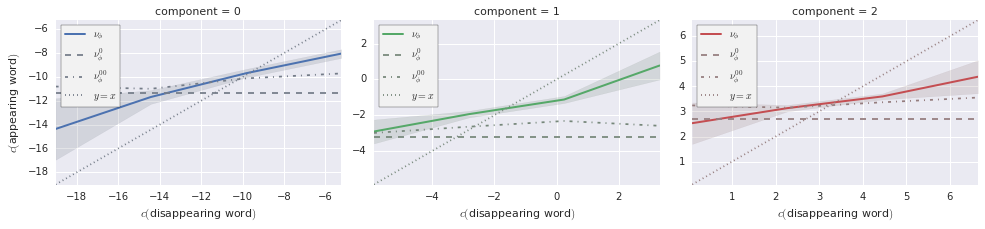

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.56134132  0.17918532  0.14972399  0.04200732  0.03804239]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.709726,-0.087807,0.334917,-0.549299,0.273236,-0.004663
Component-1,0.404592,0.107270,-0.499103,-0.706244,0.277304,-0.003998
Component-2,-0.570614,0.107400,-0.780160,0.227227,-0.033920,0.037862


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 53419) |            | Elapsed Time: 0:00:13 ETA:  8 days, 4:04:13

  0% (  110 of 53419) |                    | Elapsed Time: 0:00:14 ETA:  0:07:58

  0% (  223 of 53419) |                    | Elapsed Time: 0:00:15 ETA:  0:07:48

  0% (  331 of 53419) |                    | Elapsed Time: 0:00:16 ETA:  0:07:51

  0% (  439 of 53419) |                    | Elapsed Time: 0:00:17 ETA:  0:07:53

  1% (  563 of 53419) |                    | Elapsed Time: 0:00:18 ETA:  0:07:39

  1% (  668 of 53419) |                    | Elapsed Time: 0:00:19 ETA:  0:07:32

  1% (  794 of 53419) |                    | Elapsed Time: 0:00:20 ETA:  0:07:24

  1% (  916 of 53419) |                    | Elapsed Time: 0:00:21 ETA:  0:07:20

  1% ( 1046 of 53419) |                    | Elapsed Time: 0:00:22 ETA:  0:07:13

  2% ( 1169 of 53419) |                    | Elapsed Time: 0:00:23 ETA:  0:07:05

  2% ( 1296 of 53419) |                    | Elapsed Time: 0:00:24 ETA:  0:06:58

  2% ( 1336 of 53419) |                    | Elapsed Time: 0:00:24 ETA:  0:06:50

  2% ( 1462 of 53419) |                    | Elapsed Time: 0:00:25 ETA:  0:06:41

  2% ( 1595 of 53419) |                    | Elapsed Time: 0:00:26 ETA:  0:06:37

  3% ( 1706 of 53419) |                    | Elapsed Time: 0:00:27 ETA:  0:06:40

  3% ( 1765 of 53419) |                    | Elapsed Time: 0:00:28 ETA:  0:07:09

  3% ( 1833 of 53419) |                    | Elapsed Time: 0:00:29 ETA:  0:07:35

  3% ( 1905 of 53419) |                    | Elapsed Time: 0:00:30 ETA:  0:08:07

  3% ( 1981 of 53419) |                    | Elapsed Time: 0:00:31 ETA:  0:08:36

  3% ( 2004 of 53419) |                    | Elapsed Time: 0:00:31 ETA:  0:09:12

  3% ( 2073 of 53419) |                    | Elapsed Time: 0:00:32 ETA:  0:09:39

  4% ( 2142 of 53419) |                    | Elapsed Time: 0:00:33 ETA:  0:10:30

  4% ( 2207 of 53419) |                    | Elapsed Time: 0:00:34 ETA:  0:11:43

  4% ( 2277 of 53419) |                    | Elapsed Time: 0:00:35 ETA:  0:12:35

  4% ( 2354 of 53419) |                    | Elapsed Time: 0:00:36 ETA:  0:12:10

  4% ( 2438 of 53419) |                    | Elapsed Time: 0:00:37 ETA:  0:11:49

  4% ( 2564 of 53419) |                    | Elapsed Time: 0:00:38 ETA:  0:10:46

  5% ( 2671 of 53419) |#                   | Elapsed Time: 0:00:39 ETA:  0:10:08

  5% ( 2789 of 53419) |#                   | Elapsed Time: 0:00:40 ETA:  0:09:29

  5% ( 2896 of 53419) |#                   | Elapsed Time: 0:00:41 ETA:  0:09:00

  5% ( 3006 of 53419) |#                   | Elapsed Time: 0:00:42 ETA:  0:08:32

  5% ( 3124 of 53419) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:58

  6% ( 3240 of 53419) |#                   | Elapsed Time: 0:00:44 ETA:  0:07:32

  6% ( 3339 of 53419) |#                   | Elapsed Time: 0:00:45 ETA:  0:07:09

  6% ( 3464 of 53419) |#                   | Elapsed Time: 0:00:46 ETA:  0:06:49

  6% ( 3588 of 53419) |#                   | Elapsed Time: 0:00:47 ETA:  0:06:49

  6% ( 3700 of 53419) |#                   | Elapsed Time: 0:00:48 ETA:  0:06:50

  7% ( 3825 of 53419) |#                   | Elapsed Time: 0:00:49 ETA:  0:06:45

  7% ( 3921 of 53419) |#                   | Elapsed Time: 0:00:50 ETA:  0:06:50

  7% ( 4007 of 53419) |#                   | Elapsed Time: 0:00:51 ETA:  0:06:59

  7% ( 4108 of 53419) |#                   | Elapsed Time: 0:00:52 ETA:  0:07:06

  7% ( 4235 of 53419) |#                   | Elapsed Time: 0:00:53 ETA:  0:07:00

  8% ( 4329 of 53419) |#                   | Elapsed Time: 0:00:54 ETA:  0:07:12

  8% ( 4424 of 53419) |#                   | Elapsed Time: 0:00:55 ETA:  0:07:26

  8% ( 4518 of 53419) |#                   | Elapsed Time: 0:00:56 ETA:  0:07:41

  8% ( 4611 of 53419) |#                   | Elapsed Time: 0:00:57 ETA:  0:07:52

  8% ( 4675 of 53419) |#                   | Elapsed Time: 0:00:58 ETA:  0:08:09

  8% ( 4790 of 53419) |#                   | Elapsed Time: 0:00:59 ETA:  0:07:55

  9% ( 4900 of 53419) |#                   | Elapsed Time: 0:01:00 ETA:  0:07:41

  9% ( 4996 of 53419) |#                   | Elapsed Time: 0:01:01 ETA:  0:07:43

  9% ( 5092 of 53419) |#                   | Elapsed Time: 0:01:02 ETA:  0:08:01

  9% ( 5187 of 53419) |#                   | Elapsed Time: 0:01:03 ETA:  0:07:59

  9% ( 5279 of 53419) |#                   | Elapsed Time: 0:01:04 ETA:  0:08:00

 10% ( 5342 of 53419) |##                  | Elapsed Time: 0:01:05 ETA:  0:07:57

 10% ( 5435 of 53419) |##                  | Elapsed Time: 0:01:06 ETA:  0:07:56

 10% ( 5534 of 53419) |##                  | Elapsed Time: 0:01:07 ETA:  0:07:53

 10% ( 5632 of 53419) |##                  | Elapsed Time: 0:01:08 ETA:  0:08:03

 10% ( 5732 of 53419) |##                  | Elapsed Time: 0:01:09 ETA:  0:08:08

 10% ( 5831 of 53419) |##                  | Elapsed Time: 0:01:10 ETA:  0:08:06

 11% ( 5932 of 53419) |##                  | Elapsed Time: 0:01:11 ETA:  0:08:01

 11% ( 6010 of 53419) |##                  | Elapsed Time: 0:01:11 ETA:  0:07:59

 11% ( 6106 of 53419) |##                  | Elapsed Time: 0:01:12 ETA:  0:07:55

 11% ( 6198 of 53419) |##                  | Elapsed Time: 0:01:13 ETA:  0:07:57

 11% ( 6295 of 53419) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:54

 11% ( 6388 of 53419) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:57

 12% ( 6491 of 53419) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:53

 12% ( 6601 of 53419) |##                  | Elapsed Time: 0:01:17 ETA:  0:07:46

 12% ( 6678 of 53419) |##                  | Elapsed Time: 0:01:18 ETA:  0:07:38

 12% ( 6798 of 53419) |##                  | Elapsed Time: 0:01:19 ETA:  0:07:25

 12% ( 6915 of 53419) |##                  | Elapsed Time: 0:01:20 ETA:  0:07:14

 13% ( 7038 of 53419) |##                  | Elapsed Time: 0:01:21 ETA:  0:06:58

 13% ( 7152 of 53419) |##                  | Elapsed Time: 0:01:22 ETA:  0:06:45

 13% ( 7268 of 53419) |##                  | Elapsed Time: 0:01:23 ETA:  0:06:35

 13% ( 7346 of 53419) |##                  | Elapsed Time: 0:01:24 ETA:  0:06:26

 13% ( 7475 of 53419) |##                  | Elapsed Time: 0:01:25 ETA:  0:06:13

 14% ( 7601 of 53419) |##                  | Elapsed Time: 0:01:26 ETA:  0:06:05

 14% ( 7729 of 53419) |##                  | Elapsed Time: 0:01:27 ETA:  0:05:58

 14% ( 7857 of 53419) |##                  | Elapsed Time: 0:01:28 ETA:  0:05:54

 14% ( 7986 of 53419) |##                  | Elapsed Time: 0:01:29 ETA:  0:05:48

 15% ( 8013 of 53419) |###                 | Elapsed Time: 0:01:29 ETA:  0:05:47

 15% ( 8148 of 53419) |###                 | Elapsed Time: 0:01:30 ETA:  0:05:37

 15% ( 8272 of 53419) |###                 | Elapsed Time: 0:01:31 ETA:  0:05:32

 15% ( 8397 of 53419) |###                 | Elapsed Time: 0:01:32 ETA:  0:05:26

 15% ( 8516 of 53419) |###                 | Elapsed Time: 0:01:33 ETA:  0:05:29

 16% ( 8624 of 53419) |###                 | Elapsed Time: 0:01:34 ETA:  0:05:35

 16% ( 8681 of 53419) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:44

 16% ( 8783 of 53419) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:55

 16% ( 8889 of 53419) |###                 | Elapsed Time: 0:01:37 ETA:  0:06:06

 16% ( 8991 of 53419) |###                 | Elapsed Time: 0:01:38 ETA:  0:06:13

 17% ( 9097 of 53419) |###                 | Elapsed Time: 0:01:39 ETA:  0:06:26

 17% ( 9211 of 53419) |###                 | Elapsed Time: 0:01:40 ETA:  0:06:30

 17% ( 9324 of 53419) |###                 | Elapsed Time: 0:01:41 ETA:  0:06:35

 17% ( 9349 of 53419) |###                 | Elapsed Time: 0:01:41 ETA:  0:06:42

 17% ( 9445 of 53419) |###                 | Elapsed Time: 0:01:42 ETA:  0:06:49

 17% ( 9559 of 53419) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:40

 18% ( 9677 of 53419) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:30

 18% ( 9791 of 53419) |###                 | Elapsed Time: 0:01:45 ETA:  0:06:25

 18% ( 9909 of 53419) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:15

 18% (10017 of 53419) |###                 | Elapsed Time: 0:01:47 ETA:  0:06:09

 18% (10131 of 53419) |###                 | Elapsed Time: 0:01:48 ETA:  0:06:08

 19% (10245 of 53419) |###                 | Elapsed Time: 0:01:49 ETA:  0:06:07

 19% (10367 of 53419) |###                 | Elapsed Time: 0:01:50 ETA:  0:06:00

 19% (10484 of 53419) |###                 | Elapsed Time: 0:01:51 ETA:  0:05:50

 19% (10596 of 53419) |###                 | Elapsed Time: 0:01:52 ETA:  0:05:49

 20% (10684 of 53419) |####                | Elapsed Time: 0:01:53 ETA:  0:05:55

 20% (10782 of 53419) |####                | Elapsed Time: 0:01:54 ETA:  0:06:02

 20% (10892 of 53419) |####                | Elapsed Time: 0:01:55 ETA:  0:06:05

 20% (10997 of 53419) |####                | Elapsed Time: 0:01:56 ETA:  0:06:09

 20% (11070 of 53419) |####                | Elapsed Time: 0:01:57 ETA:  0:06:29

 20% (11148 of 53419) |####                | Elapsed Time: 0:01:58 ETA:  0:06:49

 21% (11226 of 53419) |####                | Elapsed Time: 0:01:59 ETA:  0:07:15

 21% (11352 of 53419) |####                | Elapsed Time: 0:02:00 ETA:  0:07:21

 21% (11472 of 53419) |####                | Elapsed Time: 0:02:01 ETA:  0:07:06

 21% (11595 of 53419) |####                | Elapsed Time: 0:02:02 ETA:  0:06:48

 21% (11707 of 53419) |####                | Elapsed Time: 0:02:03 ETA:  0:06:45

 22% (11828 of 53419) |####                | Elapsed Time: 0:02:04 ETA:  0:06:34

 22% (11928 of 53419) |####                | Elapsed Time: 0:02:05 ETA:  0:06:16

 22% (12020 of 53419) |####                | Elapsed Time: 0:02:06 ETA:  0:05:55

 22% (12155 of 53419) |####                | Elapsed Time: 0:02:07 ETA:  0:05:24

 22% (12285 of 53419) |####                | Elapsed Time: 0:02:08 ETA:  0:05:19

 23% (12409 of 53419) |####                | Elapsed Time: 0:02:09 ETA:  0:05:16

 23% (12552 of 53419) |####                | Elapsed Time: 0:02:10 ETA:  0:05:06

 23% (12688 of 53419) |####                | Elapsed Time: 0:02:11 ETA:  0:04:58

 23% (12818 of 53419) |####                | Elapsed Time: 0:02:12 ETA:  0:04:50

 24% (12909 of 53419) |####                | Elapsed Time: 0:02:13 ETA:  0:05:00

 24% (12998 of 53419) |####                | Elapsed Time: 0:02:14 ETA:  0:05:04

 24% (13090 of 53419) |####                | Elapsed Time: 0:02:15 ETA:  0:05:14

 24% (13193 of 53419) |####                | Elapsed Time: 0:02:16 ETA:  0:05:27

 24% (13309 of 53419) |####                | Elapsed Time: 0:02:17 ETA:  0:05:32

 25% (13355 of 53419) |#####               | Elapsed Time: 0:02:17 ETA:  0:05:36

 25% (13472 of 53419) |#####               | Elapsed Time: 0:02:18 ETA:  0:05:49

 25% (13588 of 53419) |#####               | Elapsed Time: 0:02:19 ETA:  0:06:01

 25% (13715 of 53419) |#####               | Elapsed Time: 0:02:20 ETA:  0:06:02

 25% (13830 of 53419) |#####               | Elapsed Time: 0:02:21 ETA:  0:05:48

 26% (13926 of 53419) |#####               | Elapsed Time: 0:02:22 ETA:  0:05:43

 26% (14023 of 53419) |#####               | Elapsed Time: 0:02:23 ETA:  0:05:27

 26% (14161 of 53419) |#####               | Elapsed Time: 0:02:24 ETA:  0:05:09

 26% (14291 of 53419) |#####               | Elapsed Time: 0:02:25 ETA:  0:05:02

 26% (14399 of 53419) |#####               | Elapsed Time: 0:02:26 ETA:  0:05:05

 27% (14501 of 53419) |#####               | Elapsed Time: 0:02:27 ETA:  0:05:10

 27% (14617 of 53419) |#####               | Elapsed Time: 0:02:28 ETA:  0:05:10

 27% (14691 of 53419) |#####               | Elapsed Time: 0:02:29 ETA:  0:05:17

 27% (14812 of 53419) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:13

 27% (14930 of 53419) |#####               | Elapsed Time: 0:02:31 ETA:  0:05:01

 28% (15064 of 53419) |#####               | Elapsed Time: 0:02:32 ETA:  0:04:55

 28% (15201 of 53419) |#####               | Elapsed Time: 0:02:33 ETA:  0:04:54

 28% (15326 of 53419) |#####               | Elapsed Time: 0:02:34 ETA:  0:04:55

 28% (15358 of 53419) |#####               | Elapsed Time: 0:02:34 ETA:  0:04:49

 28% (15491 of 53419) |#####               | Elapsed Time: 0:02:35 ETA:  0:04:35

 29% (15634 of 53419) |#####               | Elapsed Time: 0:02:36 ETA:  0:04:22

 29% (15750 of 53419) |#####               | Elapsed Time: 0:02:37 ETA:  0:04:20

 29% (15860 of 53419) |#####               | Elapsed Time: 0:02:38 ETA:  0:04:24

 30% (16026 of 53419) |######              | Elapsed Time: 0:02:39 ETA:  0:04:15

 30% (16165 of 53419) |######              | Elapsed Time: 0:02:40 ETA:  0:04:13

 30% (16309 of 53419) |######              | Elapsed Time: 0:02:41 ETA:  0:04:04

 30% (16432 of 53419) |######              | Elapsed Time: 0:02:42 ETA:  0:04:06

 31% (16560 of 53419) |######              | Elapsed Time: 0:02:43 ETA:  0:04:06

 31% (16663 of 53419) |######              | Elapsed Time: 0:02:44 ETA:  0:04:21

 31% (16694 of 53419) |######              | Elapsed Time: 0:02:44 ETA:  0:04:17

 31% (16849 of 53419) |######              | Elapsed Time: 0:02:45 ETA:  0:03:57

 31% (16995 of 53419) |######              | Elapsed Time: 0:02:46 ETA:  0:03:54

 32% (17137 of 53419) |######              | Elapsed Time: 0:02:47 ETA:  0:03:50

 32% (17264 of 53419) |######              | Elapsed Time: 0:02:48 ETA:  0:03:53

 32% (17362 of 53419) |######              | Elapsed Time: 0:02:49 ETA:  0:04:09

 32% (17444 of 53419) |######              | Elapsed Time: 0:02:50 ETA:  0:04:25

 32% (17547 of 53419) |######              | Elapsed Time: 0:02:51 ETA:  0:04:35

 33% (17661 of 53419) |######              | Elapsed Time: 0:02:52 ETA:  0:04:29

 33% (17780 of 53419) |######              | Elapsed Time: 0:02:53 ETA:  0:04:29

 33% (17879 of 53419) |######              | Elapsed Time: 0:02:54 ETA:  0:04:52

 33% (17969 of 53419) |######              | Elapsed Time: 0:02:55 ETA:  0:05:18

 33% (18029 of 53419) |######              | Elapsed Time: 0:02:56 ETA:  0:05:34

 33% (18139 of 53419) |######              | Elapsed Time: 0:02:57 ETA:  0:05:42

 34% (18275 of 53419) |######              | Elapsed Time: 0:02:58 ETA:  0:05:21

 34% (18393 of 53419) |######              | Elapsed Time: 0:02:59 ETA:  0:05:01

 34% (18488 of 53419) |######              | Elapsed Time: 0:03:00 ETA:  0:05:04

 34% (18622 of 53419) |######              | Elapsed Time: 0:03:01 ETA:  0:04:53

 35% (18697 of 53419) |#######             | Elapsed Time: 0:03:02 ETA:  0:04:48

 35% (18822 of 53419) |#######             | Elapsed Time: 0:03:03 ETA:  0:04:35

 35% (18921 of 53419) |#######             | Elapsed Time: 0:03:04 ETA:  0:04:29

 35% (19042 of 53419) |#######             | Elapsed Time: 0:03:05 ETA:  0:04:27

 35% (19110 of 53419) |#######             | Elapsed Time: 0:03:06 ETA:  0:04:46

 35% (19228 of 53419) |#######             | Elapsed Time: 0:03:07 ETA:  0:04:54

 36% (19365 of 53419) |#######             | Elapsed Time: 0:03:08 ETA:  0:04:45

 36% (19471 of 53419) |#######             | Elapsed Time: 0:03:09 ETA:  0:04:59

 36% (19581 of 53419) |#######             | Elapsed Time: 0:03:10 ETA:  0:05:06

 36% (19705 of 53419) |#######             | Elapsed Time: 0:03:11 ETA:  0:05:05

 37% (19823 of 53419) |#######             | Elapsed Time: 0:03:12 ETA:  0:04:54

 37% (19971 of 53419) |#######             | Elapsed Time: 0:03:13 ETA:  0:04:39

 37% (20033 of 53419) |#######             | Elapsed Time: 0:03:13 ETA:  0:04:12

 37% (20162 of 53419) |#######             | Elapsed Time: 0:03:14 ETA:  0:04:06

 37% (20267 of 53419) |#######             | Elapsed Time: 0:03:15 ETA:  0:04:09

 38% (20375 of 53419) |#######             | Elapsed Time: 0:03:16 ETA:  0:04:13

 38% (20499 of 53419) |#######             | Elapsed Time: 0:03:17 ETA:  0:04:04

 38% (20620 of 53419) |#######             | Elapsed Time: 0:03:18 ETA:  0:03:59

 38% (20700 of 53419) |#######             | Elapsed Time: 0:03:19 ETA:  0:03:53

 38% (20829 of 53419) |#######             | Elapsed Time: 0:03:20 ETA:  0:03:48

 39% (20914 of 53419) |#######             | Elapsed Time: 0:03:21 ETA:  0:04:16

 39% (21033 of 53419) |#######             | Elapsed Time: 0:03:22 ETA:  0:04:16

 39% (21130 of 53419) |#######             | Elapsed Time: 0:03:23 ETA:  0:04:30

 39% (21241 of 53419) |#######             | Elapsed Time: 0:03:24 ETA:  0:04:26

 40% (21368 of 53419) |########            | Elapsed Time: 0:03:25 ETA:  0:04:15

 40% (21496 of 53419) |########            | Elapsed Time: 0:03:26 ETA:  0:04:13

 40% (21624 of 53419) |########            | Elapsed Time: 0:03:27 ETA:  0:04:08

 40% (21719 of 53419) |########            | Elapsed Time: 0:03:28 ETA:  0:04:25

 40% (21831 of 53419) |########            | Elapsed Time: 0:03:29 ETA:  0:04:32

 41% (21961 of 53419) |########            | Elapsed Time: 0:03:30 ETA:  0:04:10

 41% (22036 of 53419) |########            | Elapsed Time: 0:03:31 ETA:  0:04:10

 41% (22152 of 53419) |########            | Elapsed Time: 0:03:32 ETA:  0:04:00

 41% (22265 of 53419) |########            | Elapsed Time: 0:03:33 ETA:  0:03:58

 41% (22372 of 53419) |########            | Elapsed Time: 0:03:42 ETA:  0:11:17

 42% (22498 of 53419) |########            | Elapsed Time: 0:03:43 ETA:  0:11:18

 42% (22623 of 53419) |########            | Elapsed Time: 0:03:44 ETA:  0:11:19

 42% (22704 of 53419) |########            | Elapsed Time: 0:03:45 ETA:  0:11:22

 42% (22802 of 53419) |########            | Elapsed Time: 0:03:46 ETA:  0:11:34

 42% (22940 of 53419) |########            | Elapsed Time: 0:03:47 ETA:  0:11:26

 43% (23044 of 53419) |########            | Elapsed Time: 0:03:48 ETA:  0:11:18

 43% (23155 of 53419) |########            | Elapsed Time: 0:03:49 ETA:  0:11:21

 43% (23262 of 53419) |########            | Elapsed Time: 0:03:50 ETA:  0:11:25

 43% (23371 of 53419) |########            | Elapsed Time: 0:03:51 ETA:  0:04:11

 43% (23489 of 53419) |########            | Elapsed Time: 0:03:52 ETA:  0:04:14

 44% (23612 of 53419) |########            | Elapsed Time: 0:03:53 ETA:  0:04:00

 44% (23723 of 53419) |########            | Elapsed Time: 0:03:54 ETA:  0:03:52

 44% (23829 of 53419) |########            | Elapsed Time: 0:03:55 ETA:  0:04:08

 44% (23945 of 53419) |########            | Elapsed Time: 0:03:56 ETA:  0:04:01

 45% (24039 of 53419) |#########           | Elapsed Time: 0:03:57 ETA:  0:03:59

 45% (24118 of 53419) |#########           | Elapsed Time: 0:03:58 ETA:  0:04:14

 45% (24232 of 53419) |#########           | Elapsed Time: 0:03:59 ETA:  0:04:09

 45% (24341 of 53419) |#########           | Elapsed Time: 0:04:00 ETA:  0:04:09

 45% (24459 of 53419) |#########           | Elapsed Time: 0:04:01 ETA:  0:04:08

 46% (24583 of 53419) |#########           | Elapsed Time: 0:04:02 ETA:  0:04:06

 46% (24707 of 53419) |#########           | Elapsed Time: 0:04:03 ETA:  0:03:57

 46% (24819 of 53419) |#########           | Elapsed Time: 0:04:04 ETA:  0:03:58

 46% (24912 of 53419) |#########           | Elapsed Time: 0:04:05 ETA:  0:04:08

 46% (25046 of 53419) |#########           | Elapsed Time: 0:04:06 ETA:  0:03:37

 47% (25163 of 53419) |#########           | Elapsed Time: 0:04:07 ETA:  0:03:35

 47% (25275 of 53419) |#########           | Elapsed Time: 0:04:08 ETA:  0:03:32

 47% (25375 of 53419) |#########           | Elapsed Time: 0:04:08 ETA:  0:03:32

 47% (25499 of 53419) |#########           | Elapsed Time: 0:04:09 ETA:  0:03:31

 47% (25636 of 53419) |#########           | Elapsed Time: 0:04:10 ETA:  0:03:22

 48% (25756 of 53419) |#########           | Elapsed Time: 0:04:11 ETA:  0:03:20

 48% (25886 of 53419) |#########           | Elapsed Time: 0:04:12 ETA:  0:03:12

 48% (26042 of 53419) |#########           | Elapsed Time: 0:04:14 ETA:  0:02:54

 48% (26164 of 53419) |#########           | Elapsed Time: 0:04:15 ETA:  0:02:51

 49% (26257 of 53419) |#########           | Elapsed Time: 0:04:16 ETA:  0:02:58

 49% (26352 of 53419) |#########           | Elapsed Time: 0:04:17 ETA:  0:03:07

 49% (26471 of 53419) |#########           | Elapsed Time: 0:04:18 ETA:  0:03:08

 49% (26590 of 53419) |#########           | Elapsed Time: 0:04:19 ETA:  0:03:16

 50% (26710 of 53419) |##########          | Elapsed Time: 0:04:19 ETA:  0:03:05

 50% (26852 of 53419) |##########          | Elapsed Time: 0:04:20 ETA:  0:02:58

 50% (26995 of 53419) |##########          | Elapsed Time: 0:04:21 ETA:  0:02:56

 50% (27126 of 53419) |##########          | Elapsed Time: 0:04:22 ETA:  0:02:53

 51% (27248 of 53419) |##########          | Elapsed Time: 0:04:23 ETA:  0:02:52

 51% (27354 of 53419) |##########          | Elapsed Time: 0:04:24 ETA:  0:02:46

 51% (27378 of 53419) |##########          | Elapsed Time: 0:04:25 ETA:  0:02:35

 51% (27479 of 53419) |##########          | Elapsed Time: 0:04:26 ETA:  0:02:41

 51% (27586 of 53419) |##########          | Elapsed Time: 0:04:27 ETA:  0:02:45

 51% (27687 of 53419) |##########          | Elapsed Time: 0:04:28 ETA:  0:03:03

 52% (27804 of 53419) |##########          | Elapsed Time: 0:04:29 ETA:  0:03:14

 52% (27914 of 53419) |##########          | Elapsed Time: 0:04:30 ETA:  0:03:30

 52% (28045 of 53419) |##########          | Elapsed Time: 0:04:31 ETA:  0:03:36

 52% (28184 of 53419) |##########          | Elapsed Time: 0:04:32 ETA:  0:03:16

 53% (28327 of 53419) |##########          | Elapsed Time: 0:04:33 ETA:  0:03:00

 53% (28444 of 53419) |##########          | Elapsed Time: 0:04:34 ETA:  0:02:51

 53% (28555 of 53419) |##########          | Elapsed Time: 0:04:35 ETA:  0:02:49

 53% (28661 of 53419) |##########          | Elapsed Time: 0:04:36 ETA:  0:02:45

 53% (28713 of 53419) |##########          | Elapsed Time: 0:04:36 ETA:  0:02:45

 53% (28841 of 53419) |##########          | Elapsed Time: 0:04:37 ETA:  0:02:35

 54% (28958 of 53419) |##########          | Elapsed Time: 0:04:38 ETA:  0:02:41

 54% (29083 of 53419) |##########          | Elapsed Time: 0:04:39 ETA:  0:02:38

 54% (29216 of 53419) |##########          | Elapsed Time: 0:04:40 ETA:  0:02:40

 54% (29337 of 53419) |##########          | Elapsed Time: 0:04:41 ETA:  0:02:49

 55% (29381 of 53419) |###########         | Elapsed Time: 0:04:42 ETA:  0:02:51

 55% (29508 of 53419) |###########         | Elapsed Time: 0:04:43 ETA:  0:02:42

 55% (29623 of 53419) |###########         | Elapsed Time: 0:04:44 ETA:  0:02:37

 55% (29729 of 53419) |###########         | Elapsed Time: 0:04:45 ETA:  0:02:40

 55% (29843 of 53419) |###########         | Elapsed Time: 0:04:46 ETA:  0:02:45

 56% (29973 of 53419) |###########         | Elapsed Time: 0:04:47 ETA:  0:02:38

 56% (30049 of 53419) |###########         | Elapsed Time: 0:04:47 ETA:  0:02:36

 56% (30174 of 53419) |###########         | Elapsed Time: 0:04:48 ETA:  0:02:39

 56% (30285 of 53419) |###########         | Elapsed Time: 0:04:49 ETA:  0:02:43

 56% (30396 of 53419) |###########         | Elapsed Time: 0:04:50 ETA:  0:02:41

 57% (30512 of 53419) |###########         | Elapsed Time: 0:04:51 ETA:  0:02:45

 57% (30629 of 53419) |###########         | Elapsed Time: 0:04:52 ETA:  0:02:43

 57% (30716 of 53419) |###########         | Elapsed Time: 0:04:53 ETA:  0:02:42

 57% (30837 of 53419) |###########         | Elapsed Time: 0:04:54 ETA:  0:02:38

 57% (30966 of 53419) |###########         | Elapsed Time: 0:04:55 ETA:  0:02:38

 58% (31068 of 53419) |###########         | Elapsed Time: 0:04:56 ETA:  0:02:48

 58% (31191 of 53419) |###########         | Elapsed Time: 0:04:57 ETA:  0:02:48

 58% (31308 of 53419) |###########         | Elapsed Time: 0:04:58 ETA:  0:02:44

 58% (31384 of 53419) |###########         | Elapsed Time: 0:04:59 ETA:  0:02:43

 58% (31511 of 53419) |###########         | Elapsed Time: 0:05:00 ETA:  0:02:37

 59% (31639 of 53419) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:31

 59% (31760 of 53419) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:24

 59% (31885 of 53419) |###########         | Elapsed Time: 0:05:03 ETA:  0:02:21

 59% (32012 of 53419) |###########         | Elapsed Time: 0:05:04 ETA:  0:02:21

 60% (32052 of 53419) |############        | Elapsed Time: 0:05:04 ETA:  0:02:16

 60% (32175 of 53419) |############        | Elapsed Time: 0:05:05 ETA:  0:02:15

 60% (32306 of 53419) |############        | Elapsed Time: 0:05:06 ETA:  0:02:08

 60% (32438 of 53419) |############        | Elapsed Time: 0:05:07 ETA:  0:02:00

 60% (32568 of 53419) |############        | Elapsed Time: 0:05:08 ETA:  0:01:58

 61% (32686 of 53419) |############        | Elapsed Time: 0:05:09 ETA:  0:02:01

 61% (32720 of 53419) |############        | Elapsed Time: 0:05:10 ETA:  0:02:00

 61% (32813 of 53419) |############        | Elapsed Time: 0:05:11 ETA:  0:02:14

 61% (32887 of 53419) |############        | Elapsed Time: 0:05:12 ETA:  0:02:41

 61% (32969 of 53419) |############        | Elapsed Time: 0:05:13 ETA:  0:02:53

 61% (33047 of 53419) |############        | Elapsed Time: 0:05:14 ETA:  0:03:16

 62% (33149 of 53419) |############        | Elapsed Time: 0:05:15 ETA:  0:03:33

 62% (33256 of 53419) |############        | Elapsed Time: 0:05:16 ETA:  0:03:47

 62% (33387 of 53419) |############        | Elapsed Time: 0:05:17 ETA:  0:04:16

 62% (33497 of 53419) |############        | Elapsed Time: 0:05:18 ETA:  0:04:07

 62% (33596 of 53419) |############        | Elapsed Time: 0:05:19 ETA:  0:04:02

 63% (33721 of 53419) |############        | Elapsed Time: 0:05:20 ETA:  0:03:26

 63% (33846 of 53419) |############        | Elapsed Time: 0:05:21 ETA:  0:02:59

 63% (33945 of 53419) |############        | Elapsed Time: 0:05:22 ETA:  0:02:47

 63% (34017 of 53419) |############        | Elapsed Time: 0:05:23 ETA:  0:03:03

 63% (34055 of 53419) |############        | Elapsed Time: 0:05:23 ETA:  0:02:58

 64% (34193 of 53419) |############        | Elapsed Time: 0:05:24 ETA:  0:02:37

 64% (34330 of 53419) |############        | Elapsed Time: 0:05:25 ETA:  0:02:25

 64% (34454 of 53419) |############        | Elapsed Time: 0:05:26 ETA:  0:02:17

 64% (34549 of 53419) |############        | Elapsed Time: 0:05:27 ETA:  0:02:18

 64% (34678 of 53419) |############        | Elapsed Time: 0:05:28 ETA:  0:02:15

 65% (34723 of 53419) |#############       | Elapsed Time: 0:05:28 ETA:  0:02:15

 65% (34840 of 53419) |#############       | Elapsed Time: 0:05:29 ETA:  0:02:05

 65% (34962 of 53419) |#############       | Elapsed Time: 0:05:30 ETA:  0:01:40

 65% (35087 of 53419) |#############       | Elapsed Time: 0:05:32 ETA:  0:01:40

 65% (35219 of 53419) |#############       | Elapsed Time: 0:05:33 ETA:  0:01:41

 66% (35345 of 53419) |#############       | Elapsed Time: 0:05:34 ETA:  0:01:45

 66% (35391 of 53419) |#############       | Elapsed Time: 0:05:34 ETA:  0:01:47

 66% (35506 of 53419) |#############       | Elapsed Time: 0:05:35 ETA:  0:01:37

 66% (35628 of 53419) |#############       | Elapsed Time: 0:05:36 ETA:  0:01:40

 66% (35741 of 53419) |#############       | Elapsed Time: 0:05:37 ETA:  0:01:45

 67% (35850 of 53419) |#############       | Elapsed Time: 0:05:38 ETA:  0:01:48

 67% (35973 of 53419) |#############       | Elapsed Time: 0:05:39 ETA:  0:01:47

 67% (36058 of 53419) |#############       | Elapsed Time: 0:05:40 ETA:  0:01:47

 67% (36149 of 53419) |#############       | Elapsed Time: 0:05:41 ETA:  0:02:06

 67% (36280 of 53419) |#############       | Elapsed Time: 0:05:42 ETA:  0:02:02

 68% (36413 of 53419) |#############       | Elapsed Time: 0:05:43 ETA:  0:01:53

 68% (36547 of 53419) |#############       | Elapsed Time: 0:05:44 ETA:  0:01:43

 68% (36674 of 53419) |#############       | Elapsed Time: 0:05:45 ETA:  0:01:40

 68% (36726 of 53419) |#############       | Elapsed Time: 0:05:45 ETA:  0:01:34

 68% (36850 of 53419) |#############       | Elapsed Time: 0:05:46 ETA:  0:01:26

 69% (36970 of 53419) |#############       | Elapsed Time: 0:05:47 ETA:  0:01:27

 69% (37081 of 53419) |#############       | Elapsed Time: 0:05:48 ETA:  0:01:31

 69% (37203 of 53419) |#############       | Elapsed Time: 0:05:49 ETA:  0:01:17

 69% (37336 of 53419) |#############       | Elapsed Time: 0:05:50 ETA:  0:01:15

 70% (37394 of 53419) |##############      | Elapsed Time: 0:05:51 ETA:  0:01:20

 70% (37520 of 53419) |##############      | Elapsed Time: 0:05:52 ETA:  0:01:22

 70% (37619 of 53419) |##############      | Elapsed Time: 0:05:53 ETA:  0:01:34

 70% (37754 of 53419) |##############      | Elapsed Time: 0:05:54 ETA:  0:01:28

 70% (37872 of 53419) |##############      | Elapsed Time: 0:05:55 ETA:  0:01:30

 71% (37995 of 53419) |##############      | Elapsed Time: 0:05:56 ETA:  0:01:28

 71% (38062 of 53419) |##############      | Elapsed Time: 0:05:56 ETA:  0:01:21

 71% (38169 of 53419) |##############      | Elapsed Time: 0:05:57 ETA:  0:01:27

 71% (38265 of 53419) |##############      | Elapsed Time: 0:05:58 ETA:  0:01:44

 71% (38381 of 53419) |##############      | Elapsed Time: 0:05:59 ETA:  0:01:43

 72% (38492 of 53419) |##############      | Elapsed Time: 0:06:00 ETA:  0:01:49

 72% (38610 of 53419) |##############      | Elapsed Time: 0:06:01 ETA:  0:01:39

 72% (38729 of 53419) |##############      | Elapsed Time: 0:06:02 ETA:  0:01:51

 72% (38872 of 53419) |##############      | Elapsed Time: 0:06:03 ETA:  0:01:40

 72% (38987 of 53419) |##############      | Elapsed Time: 0:06:04 ETA:  0:01:42

 73% (39108 of 53419) |##############      | Elapsed Time: 0:06:05 ETA:  0:01:34

 73% (39231 of 53419) |##############      | Elapsed Time: 0:06:06 ETA:  0:01:20

 73% (39347 of 53419) |##############      | Elapsed Time: 0:06:07 ETA:  0:01:19

 73% (39397 of 53419) |##############      | Elapsed Time: 0:06:08 ETA:  0:01:15

 73% (39528 of 53419) |##############      | Elapsed Time: 0:06:09 ETA:  0:01:07

 74% (39661 of 53419) |##############      | Elapsed Time: 0:06:10 ETA:  0:00:57

 74% (39797 of 53419) |##############      | Elapsed Time: 0:06:11 ETA:  0:00:52

 74% (39890 of 53419) |##############      | Elapsed Time: 0:06:12 ETA:  0:01:11

 74% (39991 of 53419) |##############      | Elapsed Time: 0:06:13 ETA:  0:01:17

 75% (40065 of 53419) |###############     | Elapsed Time: 0:06:13 ETA:  0:01:12

 75% (40197 of 53419) |###############     | Elapsed Time: 0:06:14 ETA:  0:01:07

 75% (40330 of 53419) |###############     | Elapsed Time: 0:06:15 ETA:  0:00:58

 75% (40438 of 53419) |###############     | Elapsed Time: 0:06:16 ETA:  0:01:02

 75% (40526 of 53419) |###############     | Elapsed Time: 0:06:17 ETA:  0:01:21

 76% (40649 of 53419) |###############     | Elapsed Time: 0:06:18 ETA:  0:01:24

 76% (40732 of 53419) |###############     | Elapsed Time: 0:06:19 ETA:  0:01:28

 76% (40851 of 53419) |###############     | Elapsed Time: 0:06:20 ETA:  0:01:14

 76% (40979 of 53419) |###############     | Elapsed Time: 0:06:21 ETA:  0:01:00

 76% (41102 of 53419) |###############     | Elapsed Time: 0:06:22 ETA:  0:01:03

 77% (41237 of 53419) |###############     | Elapsed Time: 0:06:23 ETA:  0:01:01

 77% (41351 of 53419) |###############     | Elapsed Time: 0:06:24 ETA:  0:01:08

 77% (41400 of 53419) |###############     | Elapsed Time: 0:06:24 ETA:  0:00:57

 77% (41522 of 53419) |###############     | Elapsed Time: 0:06:25 ETA:  0:00:40

 77% (41627 of 53419) |###############     | Elapsed Time: 0:06:26 ETA:  0:00:47

 78% (41736 of 53419) |###############     | Elapsed Time: 0:06:27 ETA:  0:00:56

 78% (41837 of 53419) |###############     | Elapsed Time: 0:06:28 ETA:  0:01:03

 78% (41946 of 53419) |###############     | Elapsed Time: 0:06:29 ETA:  0:01:11

 78% (42068 of 53419) |###############     | Elapsed Time: 0:06:30 ETA:  0:01:07

 78% (42183 of 53419) |###############     | Elapsed Time: 0:06:31 ETA:  0:01:16

 79% (42311 of 53419) |###############     | Elapsed Time: 0:06:32 ETA:  0:01:08

 79% (42439 of 53419) |###############     | Elapsed Time: 0:06:33 ETA:  0:01:08

 79% (42580 of 53419) |###############     | Elapsed Time: 0:06:34 ETA:  0:00:59

 79% (42639 of 53419) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:18

 80% (42736 of 53419) |################    | Elapsed Time: 0:06:36 ETA:  0:01:13

 80% (42836 of 53419) |################    | Elapsed Time: 0:06:37 ETA:  0:01:13

 80% (42943 of 53419) |################    | Elapsed Time: 0:06:38 ETA:  0:01:12

 80% (43041 of 53419) |################    | Elapsed Time: 0:06:39 ETA:  0:01:27

 80% (43158 of 53419) |################    | Elapsed Time: 0:06:40 ETA:  0:01:24

 80% (43267 of 53419) |################    | Elapsed Time: 0:06:41 ETA:  0:01:33

 81% (43403 of 53419) |################    | Elapsed Time: 0:06:42 ETA:  0:01:51

 81% (43528 of 53419) |################    | Elapsed Time: 0:06:43 ETA:  0:01:12

 81% (43653 of 53419) |################    | Elapsed Time: 0:06:44 ETA:  0:01:06

 81% (43784 of 53419) |################    | Elapsed Time: 0:06:45 ETA:  0:00:50

 82% (43908 of 53419) |################    | Elapsed Time: 0:06:46 ETA:  0:00:41

 82% (44030 of 53419) |################    | Elapsed Time: 0:06:47 ETA:  0:00:29

 82% (44071 of 53419) |################    | Elapsed Time: 0:06:47 ETA:  0:00:25

 82% (44194 of 53419) |################    | Elapsed Time: 0:06:48 ETA:  0:00:17

 82% (44321 of 53419) |################    | Elapsed Time: 0:06:49 ETA:  0:00:17

 83% (44446 of 53419) |################    | Elapsed Time: 0:06:50 ETA:  0:00:16

 83% (44571 of 53419) |################    | Elapsed Time: 0:06:51 ETA:  0:00:15

 83% (44699 of 53419) |################    | Elapsed Time: 0:06:52 ETA:  0:00:13

 83% (44739 of 53419) |################    | Elapsed Time: 0:06:53 ETA:  0:00:15

 83% (44860 of 53419) |################    | Elapsed Time: 0:06:54 ETA:  0:00:15

 84% (44993 of 53419) |################    | Elapsed Time: 0:06:55 ETA:  0:00:10

 84% (45120 of 53419) |################    | Elapsed Time: 0:06:56 ETA:  0:00:09

 84% (45232 of 53419) |################    | Elapsed Time: 0:06:57 ETA:  0:00:12

 84% (45354 of 53419) |################    | Elapsed Time: 0:06:58 ETA:  0:00:13

 85% (45407 of 53419) |#################   | Elapsed Time: 0:06:58 ETA:  0:00:14

 85% (45523 of 53419) |#################   | Elapsed Time: 0:06:59 ETA:  0:00:17

 85% (45649 of 53419) |#################   | Elapsed Time: 0:07:00 ETA:  0:00:17

 85% (45770 of 53419) |#################   | Elapsed Time: 0:07:01 ETA:  0:00:17

 85% (45869 of 53419) |#################   | Elapsed Time: 0:07:02 ETA:  0:00:25

 86% (45991 of 53419) |#################   | Elapsed Time: 0:07:03 ETA:  0:00:29

 86% (46074 of 53419) |#################   | Elapsed Time: 0:07:04 ETA:  0:00:29

 86% (46204 of 53419) |#################   | Elapsed Time: 0:07:05 ETA:  0:00:19

 86% (46312 of 53419) |#################   | Elapsed Time: 0:07:06 ETA:  0:00:25

 86% (46424 of 53419) |#################   | Elapsed Time: 0:07:07 ETA:  0:00:28

 87% (46547 of 53419) |#################   | Elapsed Time: 0:07:08 ETA:  0:00:24

 87% (46669 of 53419) |#################   | Elapsed Time: 0:07:09 ETA:  0:00:25

 87% (46742 of 53419) |#################   | Elapsed Time: 0:07:09 ETA:  0:00:21

 87% (46866 of 53419) |#################   | Elapsed Time: 0:07:10 ETA:  0:00:09

 87% (47000 of 53419) |#################   | Elapsed Time: 0:07:11 ETA:  0:00:03

 88% (47101 of 53419) |#################   | Elapsed Time: 0:07:12 ETA:  0:00:13

 88% (47208 of 53419) |#################   | Elapsed Time: 0:07:13 ETA:  0:00:22

 88% (47323 of 53419) |#################   | Elapsed Time: 0:07:14 ETA:  0:00:17

 88% (47410 of 53419) |#################   | Elapsed Time: 0:07:15 ETA:  0:00:21

 88% (47516 of 53419) |#################   | Elapsed Time: 0:07:16 ETA:  0:00:28

 89% (47645 of 53419) |#################   | Elapsed Time: 0:07:17 ETA:  0:00:23

 89% (47759 of 53419) |#################   | Elapsed Time: 0:07:18 ETA:  0:00:28

 89% (47879 of 53419) |#################   | Elapsed Time: 0:07:19 ETA:  0:00:29

 89% (48010 of 53419) |#################   | Elapsed Time: 0:07:20 ETA:  0:00:29

 90% (48078 of 53419) |##################  | Elapsed Time: 0:07:21 ETA:  0:00:20

 90% (48205 of 53419) |##################  | Elapsed Time: 0:07:22 ETA:  0:00:09

 90% (48320 of 53419) |##################  | Elapsed Time: 0:07:23 ETA:  0:00:08

 90% (48428 of 53419) |##################  | Elapsed Time: 0:07:24 ETA:  0:00:05

 90% (48549 of 53419) |##################  | Elapsed Time: 0:07:25 ETA:  0:00:00

 91% (48663 of 53419) |##################  | Elapsed Time: 0:07:26 ETA:  0:00:03

 91% (48745 of 53419) |##################  | Elapsed Time: 0:07:27 ETA:  0:00:01

 91% (48850 of 53419) |##################  | Elapsed Time: 0:07:28 ETA:  0:00:07

 91% (48973 of 53419) |##################  | Elapsed Time: 0:07:29 ETA:  0:00:09

 91% (49102 of 53419) |##################  | Elapsed Time: 0:07:30 ETA:  0:00:05

 92% (49226 of 53419) |##################  | Elapsed Time: 0:07:31 ETA:  0:00:05

 92% (49345 of 53419) |##################  | Elapsed Time: 0:07:32 ETA:  0:00:02

 92% (49413 of 53419) |##################  | Elapsed Time: 0:07:32 ETA:  0:00:00

 92% (49513 of 53419) |##################  | Elapsed Time: 0:07:33 ETA:  0:00:06

 92% (49635 of 53419) |##################  | Elapsed Time: 0:07:34 ETA:  0:00:01

 93% (49774 of 53419) |##################  | Elapsed Time: 0:07:35 ETA:  0:00:00

 93% (49880 of 53419) |##################  | Elapsed Time: 0:07:36 ETA:  0:00:00

 93% (50008 of 53419) |##################  | Elapsed Time: 0:07:37 ETA:  0:00:00

 93% (50081 of 53419) |##################  | Elapsed Time: 0:07:38 ETA:  0:00:00

 93% (50202 of 53419) |##################  | Elapsed Time: 0:07:39 ETA:  0:00:00

 94% (50330 of 53419) |##################  | Elapsed Time: 0:07:40 ETA:  0:00:00

 94% (50458 of 53419) |##################  | Elapsed Time: 0:07:41 ETA:  0:00:00

 94% (50586 of 53419) |##################  | Elapsed Time: 0:07:42 ETA:  0:00:00

 94% (50702 of 53419) |##################  | Elapsed Time: 0:07:43 ETA:  0:00:00

 95% (50749 of 53419) |################### | Elapsed Time: 0:07:43 ETA:  0:00:00

 95% (50869 of 53419) |################### | Elapsed Time: 0:07:44 ETA:  0:00:00

 95% (51001 of 53419) |################### | Elapsed Time: 0:07:45 ETA:  0:00:00

 95% (51116 of 53419) |################### | Elapsed Time: 0:07:46 ETA:  0:00:00

 95% (51250 of 53419) |################### | Elapsed Time: 0:07:47 ETA:  0:00:00

 96% (51370 of 53419) |################### | Elapsed Time: 0:07:48 ETA:  0:00:00

 96% (51416 of 53419) |################### | Elapsed Time: 0:07:49 ETA:  0:00:00

 96% (51541 of 53419) |################### | Elapsed Time: 0:07:50 ETA:  0:00:00

 96% (51669 of 53419) |################### | Elapsed Time: 0:07:51 ETA:  0:00:00

 96% (51783 of 53419) |################### | Elapsed Time: 0:07:52 ETA:  0:00:00

 97% (51874 of 53419) |################### | Elapsed Time: 0:07:53 ETA:  0:00:00

 97% (51993 of 53419) |################### | Elapsed Time: 0:07:54 ETA:  0:00:00

 97% (52084 of 53419) |################### | Elapsed Time: 0:07:54 ETA:  0:00:00

 97% (52205 of 53419) |################### | Elapsed Time: 0:07:55 ETA:  0:00:00

 97% (52349 of 53419) |################### | Elapsed Time: 0:07:56 ETA:  0:00:00

 98% (52467 of 53419) |################### | Elapsed Time: 0:07:57 ETA:  0:00:00

 98% (52596 of 53419) |################### | Elapsed Time: 0:07:58 ETA:  0:00:00

 98% (52714 of 53419) |################### | Elapsed Time: 0:07:59 ETA:  0:00:00

 98% (52752 of 53419) |################### | Elapsed Time: 0:08:00 ETA:  0:00:00

 98% (52876 of 53419) |################### | Elapsed Time: 0:08:01 ETA:  0:00:00

 99% (53011 of 53419) |################### | Elapsed Time: 0:08:02 ETA:  0:00:00

 99% (53125 of 53419) |################### | Elapsed Time: 0:08:03 ETA:  0:00:00

 99% (53249 of 53419) |################### | Elapsed Time: 0:08:04 ETA:  0:00:00

 99% (53357 of 53419) |################### | Elapsed Time: 0:08:05 ETA:  0:00:00

100% (53419 of 53419) |####################| Elapsed Time: 0:08:05 Time: 0:08:05


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

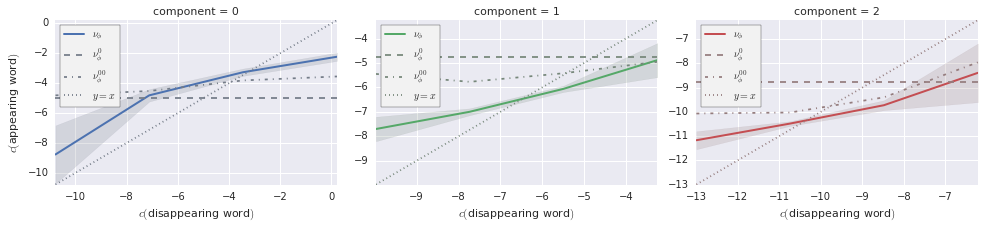

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1825 (cluster-unique) substitutions, but the PCA is in fact computed on 855 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.